In [106]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

class AmesDataPreprocessor:
    
    def __init__(self):
        self.outliers_dict = {}
        self.missing_summary = None
        self.standardization_params = {}
    
        # Updated file paths
        self.housing_path = "Documents/NYDSA #3 Machine Learning Project/Machine Learning Project Proposal-Jorge Final Version from NYCDSA/Ames_HousePrice.csv"
        self.real_estate_path = "Documents/NYDSA #3 Machine Learning Project/Machine Learning Project Proposal-Jorge Final Version from NYCDSA/Ames Real Estate Data.csv"
   
    def load_and_merge_data(self):
        """Load and merge both Ames datasets"""
        try:
            self.housing_data = pd.read_csv(self.housing_path)
            self.real_estate = pd.read_csv(self.real_estate_path, low_memory=False)
            
            print(f"Successfully loaded:\nHousing data shape: {self.housing_data.shape}")
            print(f"Real estate data shape: {self.real_estate.shape}")
            
            # Merge datasets
            self.data = pd.merge(
                self.housing_data,
                self.real_estate[['MapRefNo', 'Prop_Addr']],
                left_on='PID',
                right_on='MapRefNo',
                how='left'
            )
            
            print(f"Merged data shape: {self.data.shape}")
            return self.data
            
        except FileNotFoundError as e:
            print(f"Error loading files: {e}")
            return None
        
    def handle_missing_values(self, df):
        """Impute missing values and track changes"""
        df = df.copy()
        missing_data = {
            'column': [],
            'missing_count': [],
            'imputation_method': []
        }
        
        # Handle categorical variables with mode
        for col in df.select_dtypes(include=['object']):
            if df[col].isnull().any():
                mode_val = df[col].mode()[0]
                df[col] = df[col].fillna(mode_val)
                missing_data['column'].append(col)
                missing_data['missing_count'].append(df[col].isnull().sum())
                missing_data['imputation_method'].append('mode')
                
        # Handle numeric variables
        for col in df.select_dtypes(include=['float64', 'int64']):
            if df[col].isnull().any():
                if 'Qual' in col or 'Cond' in col:
                    df[col] = df[col].fillna(df[col].mode()[0])
                    method = 'mode'
                else:
                    df[col] = df[col].fillna(df[col].median())
                    method = 'median'
                    
                missing_data['column'].append(col)
                missing_data['missing_count'].append(df[col].isnull().sum())
                missing_data['imputation_method'].append(method)
        
        self.missing_summary = pd.DataFrame(missing_data)
        return df

    def detect_outliers(self, df):
        """Identify outliers using IQR method"""
        self.data = df  # Store the data for plotting
        for column in df.select_dtypes(include=['float64', 'int64']):
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers = df[(df[column] < lower_bound) | 
                         (df[column] > upper_bound)][column]
            
            if not outliers.empty:
                self.outliers_dict[column] = {
                    'outliers': outliers,
                    'bounds': (lower_bound, upper_bound),
                    'count': len(outliers)
                }

    def plot_outlier_analysis(self, column):
        """Generate visualization for outlier analysis"""
        plt.figure(figsize=(12, 6))
        
        # Create subplot for boxplot
        plt.subplot(1, 2, 1)
        sns.boxplot(data=self.data[column])
        plt.title(f'Boxplot of {column}')
        
        # Create subplot for distribution
        plt.subplot(1, 2, 2)
        sns.histplot(data=self.data[column], kde=True)
        plt.title(f'Distribution of {column}')
        
        if column in self.outliers_dict:
            bounds = self.outliers_dict[column]['bounds']
            plt.axvline(x=bounds[0], color='r', linestyle='--', alpha=0.5)
            plt.axvline(x=bounds[1], color='r', linestyle='--', alpha=0.5)
        
        plt.tight_layout()
        plt.show()
        
        # Print outlier summary if exists
        if column in self.outliers_dict:
            print(f"\nOutlier Summary for {column}:")
            print(f"Number of outliers: {self.outliers_dict[column]['count']}")
            print(f"Lower bound: {self.outliers_dict[column]['bounds'][0]:.2f}")
            print(f"Upper bound: {self.outliers_dict[column]['bounds'][1]:.2f}")

# Initialize preprocessor
preprocessor = AmesDataPreprocessor()

# Load and merge data
data = preprocessor.load_and_merge_data()

if data is not None:
    # Handle missing values
    data = preprocessor.handle_missing_values(data)
    
    # Detect outliers
    preprocessor.detect_outliers(data)
    
    # Example of outlier analysis for SalePrice
    preprocessor.plot_outlier_analysis('SalePrice')

Error loading files: [Errno 2] No such file or directory: 'Documents/NYDSA #3 Machine Learning Project/Machine Learning Project Proposal-Jorge Final Version from NYCDSA/Ames_HousePrice.csv'


In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# First define the class
class AmesHousingEDA:
    def __init__(self, data):
        self.data = data
        self.outliers_dict = {}
        self.market_segments = None
        
    # [Rest of the class definition remains the same as in your first code block]
    def analyze_all_numeric_features(self):
        """Complete analysis of all numeric features with outlier detection"""
        numeric_cols = self.data.select_dtypes(include=['float64', 'int64']).columns
        outlier_summary = {}
        
        for col in numeric_cols:
            # Calculate IQR and bounds
            Q1 = self.data[col].quantile(0.25)
            Q3 = self.data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Identify outliers
            outliers = self.data[(self.data[col] < lower_bound) | 
                               (self.data[col] > upper_bound)][col]
            
            # Create visualization
            plt.figure(figsize=(15, 5))
            
            # Box plot
            plt.subplot(1, 2, 1)
            sns.boxplot(x=self.data[col])
            plt.title(f'Box Plot of {col}')
            
            # Distribution plot
            plt.subplot(1, 2, 2)
            sns.histplot(data=self.data, x=col, kde=True)
            plt.axvline(lower_bound, color='r', linestyle='--')
            plt.axvline(upper_bound, color='r', linestyle='--')
            plt.title(f'Distribution of {col}')
            
            plt.tight_layout()
            plt.show()
            
            # Print summary statistics
            print(f"\nSummary for {col}:")
            print(f"Number of outliers: {len(outliers)}")
            print(f"Lower bound: {lower_bound:.2f}")
            print(f"Upper bound: {upper_bound:.2f}")
            print("\nBasic statistics:")
            print(self.data[col].describe())
            print("-" * 50)
            
            outlier_summary[col] = {
                'outliers': outliers,
                'bounds': (lower_bound, upper_bound),
                'count': len(outliers)
            }
            
        self.outliers_dict = outlier_summary
        return outlier_summary
    
    def analyze_categorical_features(self):
        """Analyze categorical features and their relationship with price"""
        categorical_cols = self.data.select_dtypes(include=['object']).columns
        
        for col in categorical_cols:
            # Create price distribution by category
            plt.figure(figsize=(15, 5))
            
            # Box plot
            plt.subplot(1, 2, 1)
            sns.boxplot(x=col, y='SalePrice', data=self.data)
            plt.xticks(rotation=45)
            plt.title(f'Price Distribution by {col}')
            
            # Count plot
            plt.subplot(1, 2, 2)
            sns.countplot(x=col, data=self.data)
            plt.xticks(rotation=45)
            plt.title(f'Frequency of {col} Categories')
            
            plt.tight_layout()
            plt.show()
            
            # Print value counts and average price per category
            print(f"\nAnalysis for {col}:")
            print("\nValue counts:")
            print(self.data[col].value_counts())
            print("\nAverage price by category:")
            print(self.data.groupby(col)['SalePrice'].mean().sort_values(ascending=False))
            print("-" * 50)
    
    def market_segmentation_analysis(self):
        """Analyze market segments based on price ranges"""
        # Create price segments
        self.data['PriceSegment'] = pd.qcut(self.data['SalePrice'], 
                                          q=4, 
                                          labels=['Entry Level', 'Mid-Low', 'Mid-High', 'Luxury'])
        
        # Analyze segments
        segment_analysis = self.data.groupby('PriceSegment').agg({
            'SalePrice': ['count', 'mean', 'min', 'max'],
            'GrLivArea': 'mean',
            'OverallQual': 'mean',
            'YearBuilt': 'mean'
        }).round(2)
        
        # Visualize segments
        plt.figure(figsize=(15, 10))
        
        # Price range distribution
        plt.subplot(2, 2, 1)
        sns.boxplot(x='PriceSegment', y='SalePrice', data=self.data)
        plt.xticks(rotation=45)
        plt.title('Price Distribution by Segment')
        
        # Living area by segment
        plt.subplot(2, 2, 2)
        sns.boxplot(x='PriceSegment', y='GrLivArea', data=self.data)
        plt.xticks(rotation=45)
        plt.title('Living Area by Segment')
        
        # Quality by segment
        plt.subplot(2, 2, 3)
        sns.boxplot(x='PriceSegment', y='OverallQual', data=self.data)
        plt.xticks(rotation=45)
        plt.title('Overall Quality by Segment')
        
        # Year built by segment
        plt.subplot(2, 2, 4)
        sns.boxplot(x='PriceSegment', y='YearBuilt', data=self.data)
        plt.xticks(rotation=45)
        plt.title('Year Built by Segment')
        
        plt.tight_layout()
        plt.show()
        
        print("\nMarket Segment Analysis:")
        print(segment_analysis)
        
        self.market_segments = segment_analysis
        return segment_analysis
    
    def neighborhood_analysis(self):
        """Analyze neighborhood characteristics and prices"""
        # Calculate neighborhood metrics
        neighborhood_stats = self.data.groupby('Neighborhood').agg({
            'SalePrice': ['count', 'mean', 'median', 'std'],
            'GrLivArea': 'mean',
            'OverallQual': 'mean',
            'YearBuilt': 'mean'
        }).round(2)
        
        # Sort neighborhoods by average price
        neighborhood_stats = neighborhood_stats.sort_values(('SalePrice', 'mean'), ascending=False)
        
        # Visualize
        plt.figure(figsize=(15, 10))
        
        # Price by neighborhood
        plt.subplot(2, 1, 1)
        sns.boxplot(x='Neighborhood', y='SalePrice', data=self.data)
        plt.xticks(rotation=45)
        plt.title('House Prices by Neighborhood')
        
        # Average quality by neighborhood
        plt.subplot(2, 1, 2)
        sns.barplot(x='Neighborhood', 
                   y='OverallQual', 
                   data=self.data, 
                   estimator=np.mean)
        plt.xticks(rotation=45)
        plt.title('Average Quality by Neighborhood')
        
        plt.tight_layout()
        plt.show()
        
        print("\nNeighborhood Analysis:")
        print(neighborhood_stats)
        
        return neighborhood_stats



# Initialize the EDA analyzer
eda_analyzer = AmesHousingEDA(data)

# Run complete numeric feature analysis with outlier detection
print("Analyzing numeric features and outliers...")
eda_analyzer.analyze_all_numeric_features()

# Analyze categorical features
print("\nAnalyzing categorical features...")
eda_analyzer.analyze_categorical_features()

# Perform market segmentation analysis
print("\nPerforming market segmentation analysis...")
market_segments = eda_analyzer.market_segmentation_analysis()

# Analyze neighborhoods
print("\nAnalyzing neighborhoods...")
neighborhood_stats = eda_analyzer.neighborhood_analysis()

Analyzing numeric features and outliers...


AttributeError: 'NoneType' object has no attribute 'select_dtypes'

Step 1: Loading and merging data...
Successfully loaded:
Housing data shape: (2580, 82)
Real estate data shape: (22213, 91)
Merged data shape: (2624, 84)

Step 2: Handling missing values...
Missing value summary:
          column  missing_count imputation_method
0          Alley              0              mode
1     MasVnrType              0              mode
2       BsmtQual              0              mode
3       BsmtCond              0              mode
4   BsmtExposure              0              mode
5   BsmtFinType1              0              mode
6   BsmtFinType2              0              mode
7     Electrical              0              mode
8    FireplaceQu              0              mode
9     GarageType              0              mode
10  GarageFinish              0              mode
11    GarageQual              0              mode
12    GarageCond              0              mode
13        PoolQC              0              mode
14         Fence              0      

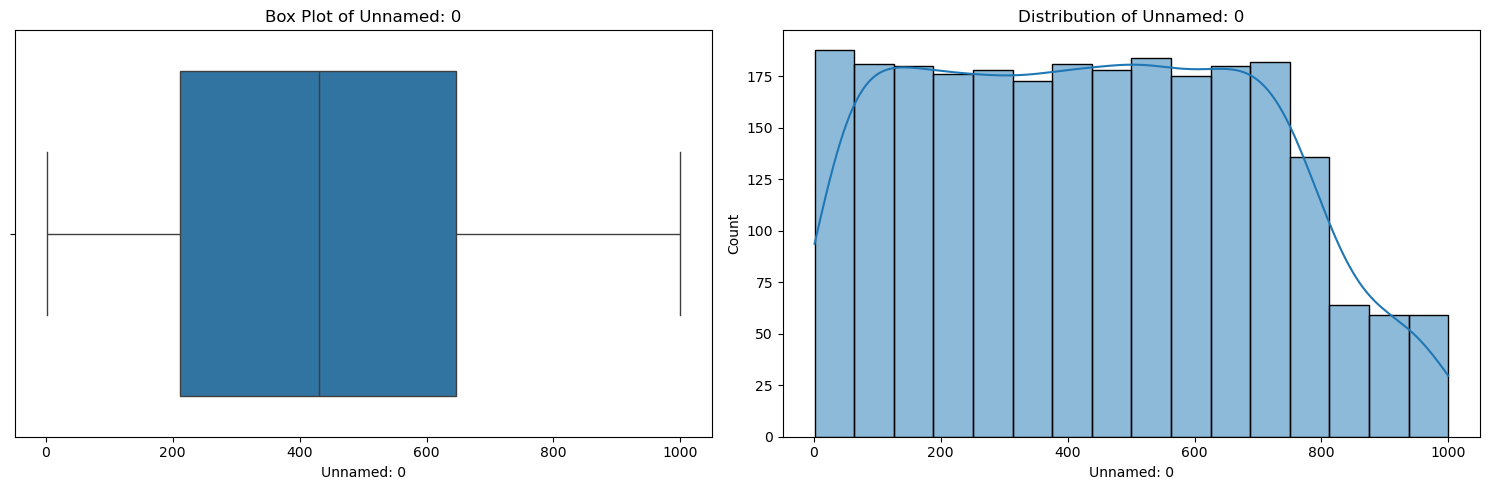


Summary for Unnamed: 0:
count    2474.000000
mean      435.677445
std       259.689840
min         1.000000
25%       212.000000
50%       431.000000
75%       647.000000
max      1000.000000
Name: Unnamed: 0, dtype: float64
--------------------------------------------------


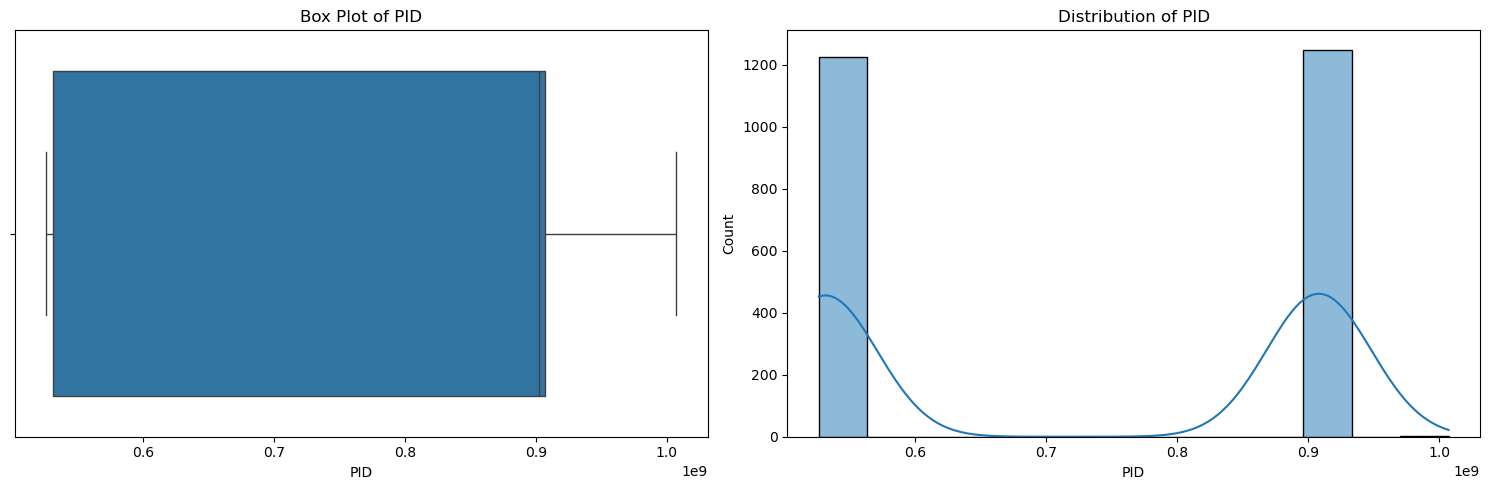


Summary for PID:
count    2.474000e+03
mean     7.215926e+08
std      1.885934e+08
min      5.263011e+08
25%      5.314773e+08
50%      9.021040e+08
75%      9.071942e+08
max      1.007100e+09
Name: PID, dtype: float64
--------------------------------------------------


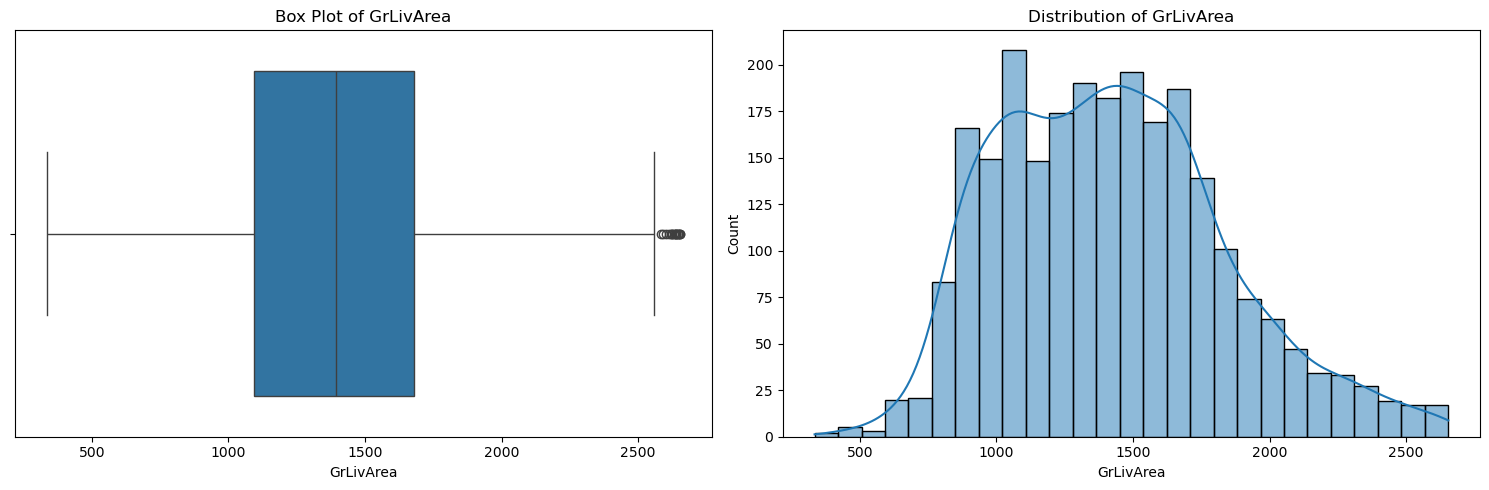


Summary for GrLivArea:
count    2474.000000
mean     1422.061439
std       414.750120
min       334.000000
25%      1092.000000
50%      1395.000000
75%      1680.000000
max      2654.000000
Name: GrLivArea, dtype: float64
--------------------------------------------------


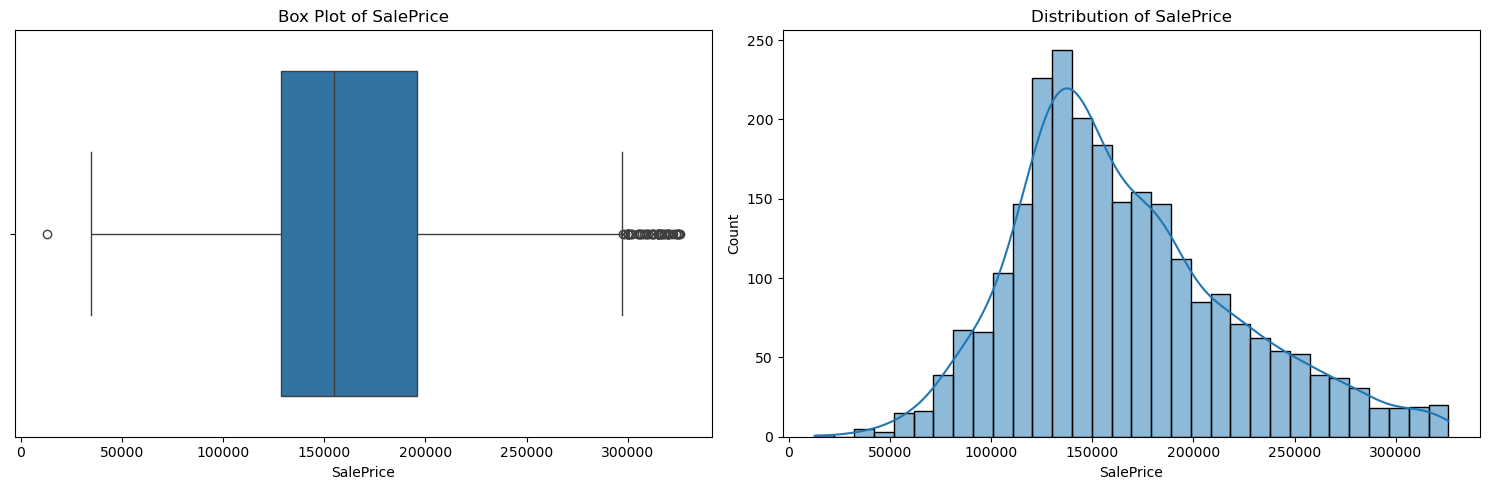


Summary for SalePrice:
count      2474.000000
mean     165597.127728
std       54415.102049
min       12789.000000
25%      128500.000000
50%      155000.000000
75%      195950.000000
max      326000.000000
Name: SalePrice, dtype: float64
--------------------------------------------------


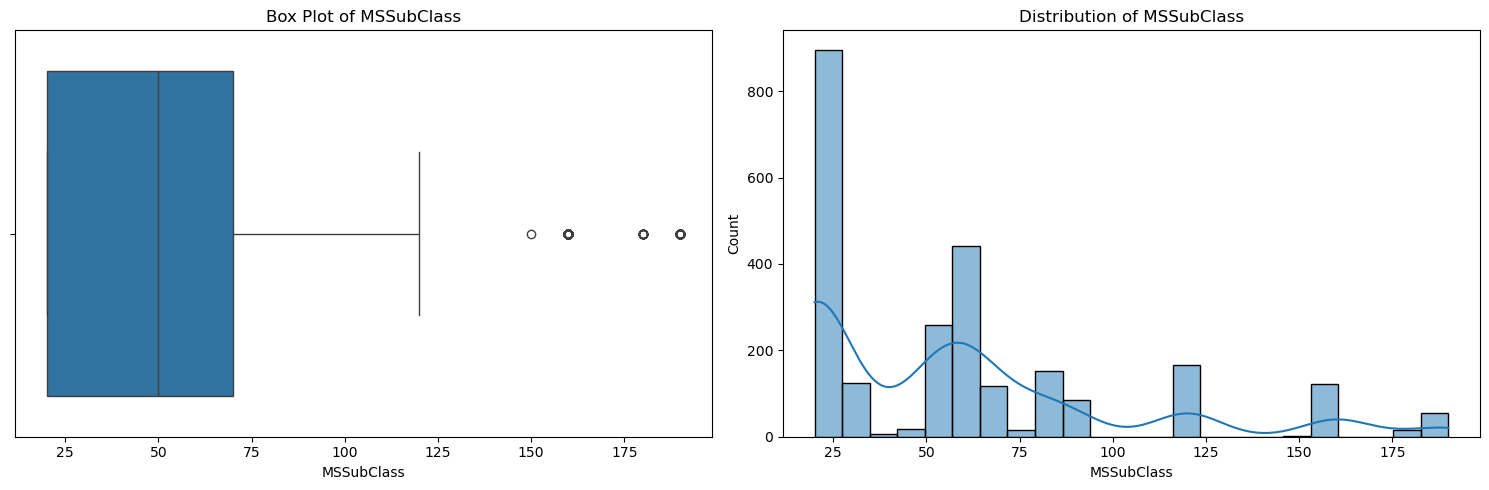


Summary for MSSubClass:
count    2474.000000
mean       58.377122
std        43.696973
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
--------------------------------------------------


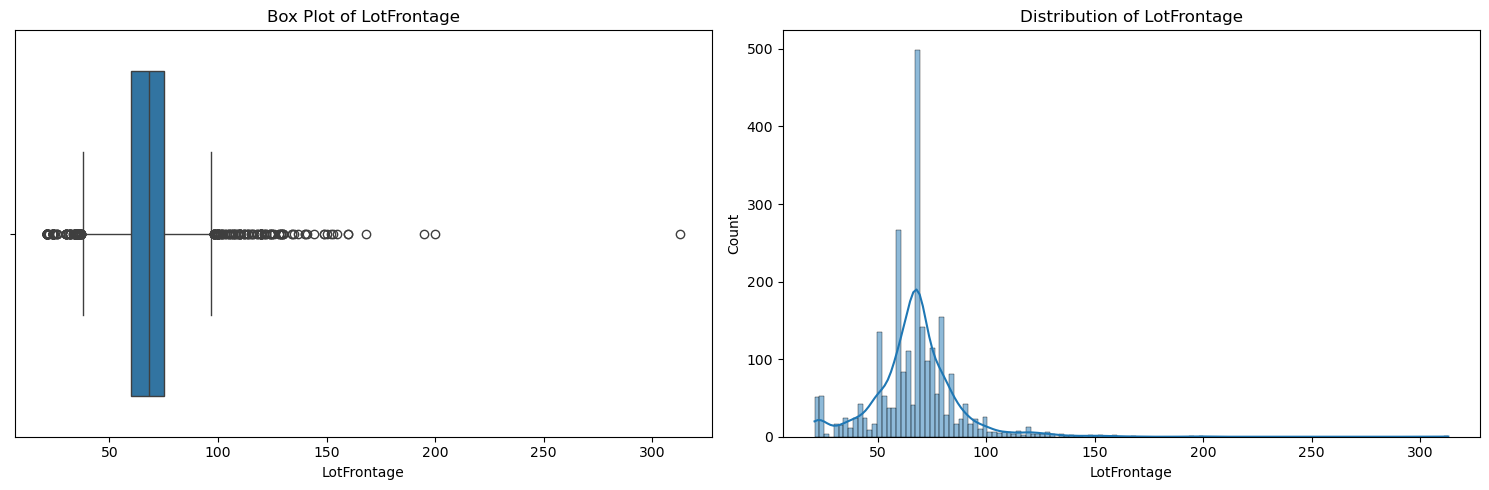


Summary for LotFrontage:
count    2474.000000
mean       67.129749
std        19.948086
min        21.000000
25%        60.000000
50%        68.000000
75%        75.000000
max       313.000000
Name: LotFrontage, dtype: float64
--------------------------------------------------


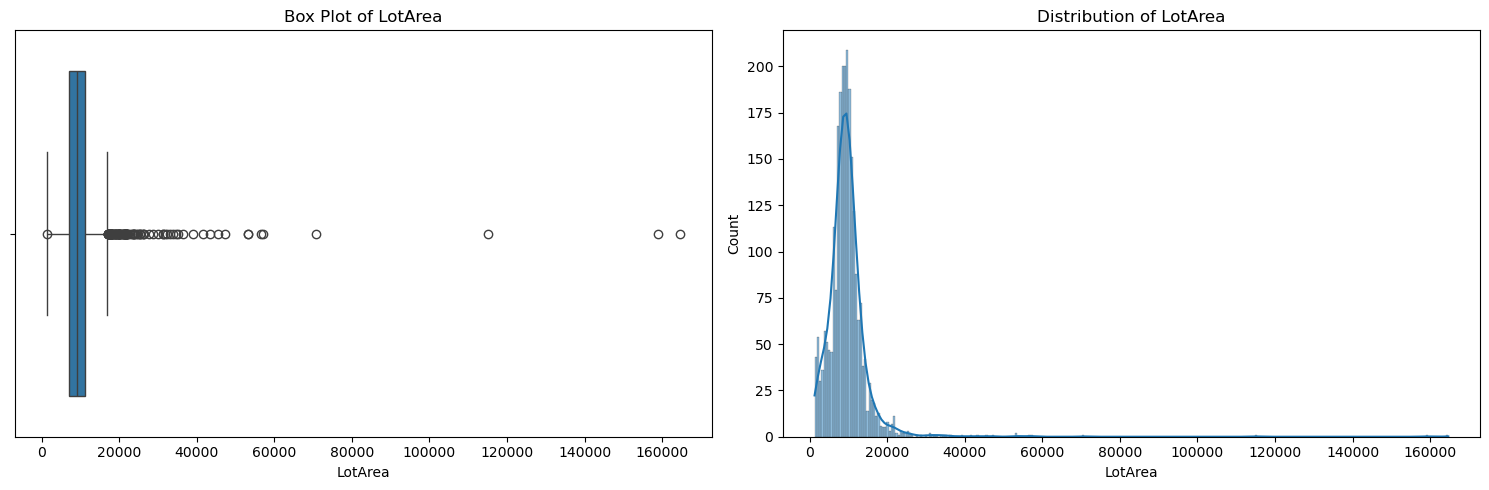


Summary for LotArea:
count      2474.000000
mean       9727.075990
std        6855.834604
min        1300.000000
25%        7200.000000
50%        9170.500000
75%       11130.500000
max      164660.000000
Name: LotArea, dtype: float64
--------------------------------------------------


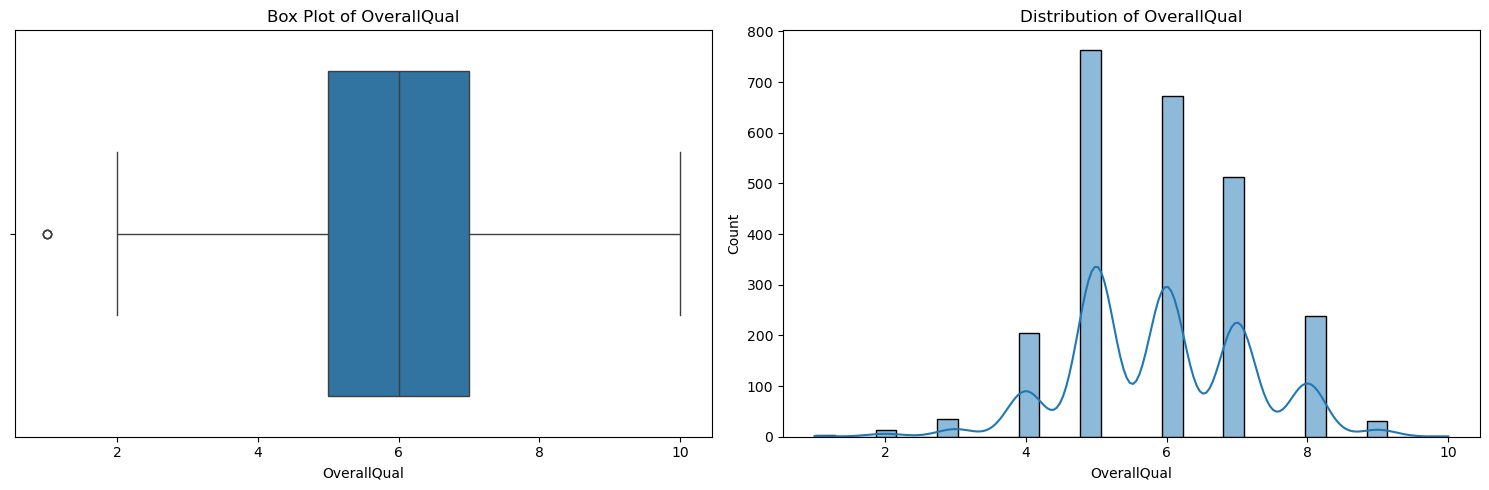


Summary for OverallQual:
count    2474.000000
mean        5.897332
std         1.256752
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64
--------------------------------------------------


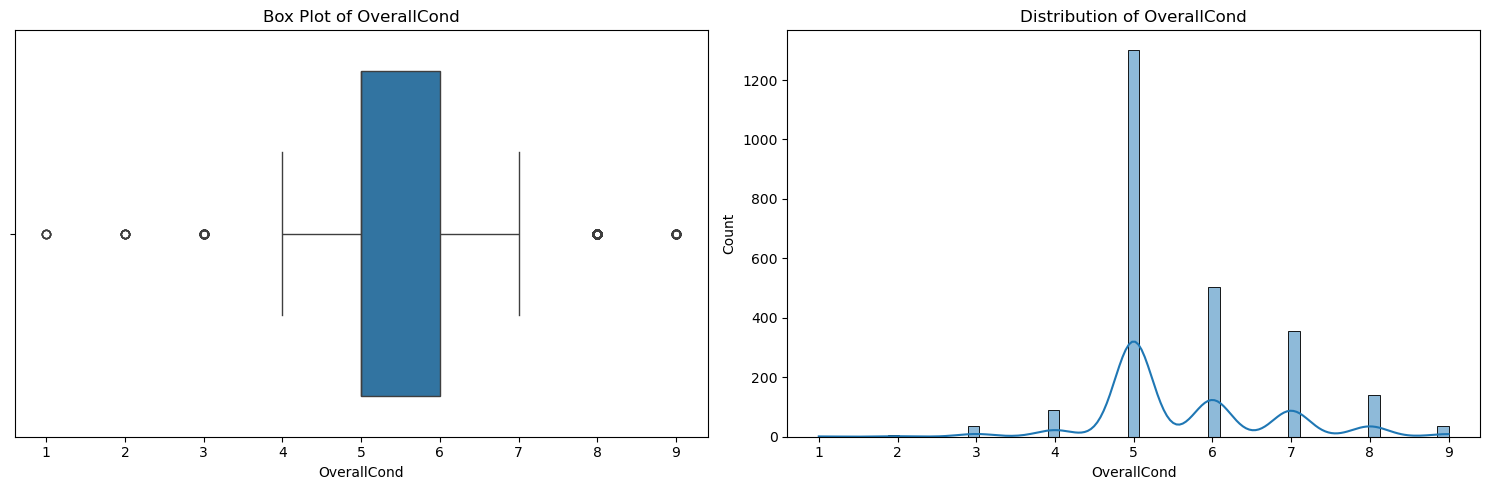


Summary for OverallCond:
count    2474.000000
mean        5.637833
std         1.124210
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64
--------------------------------------------------


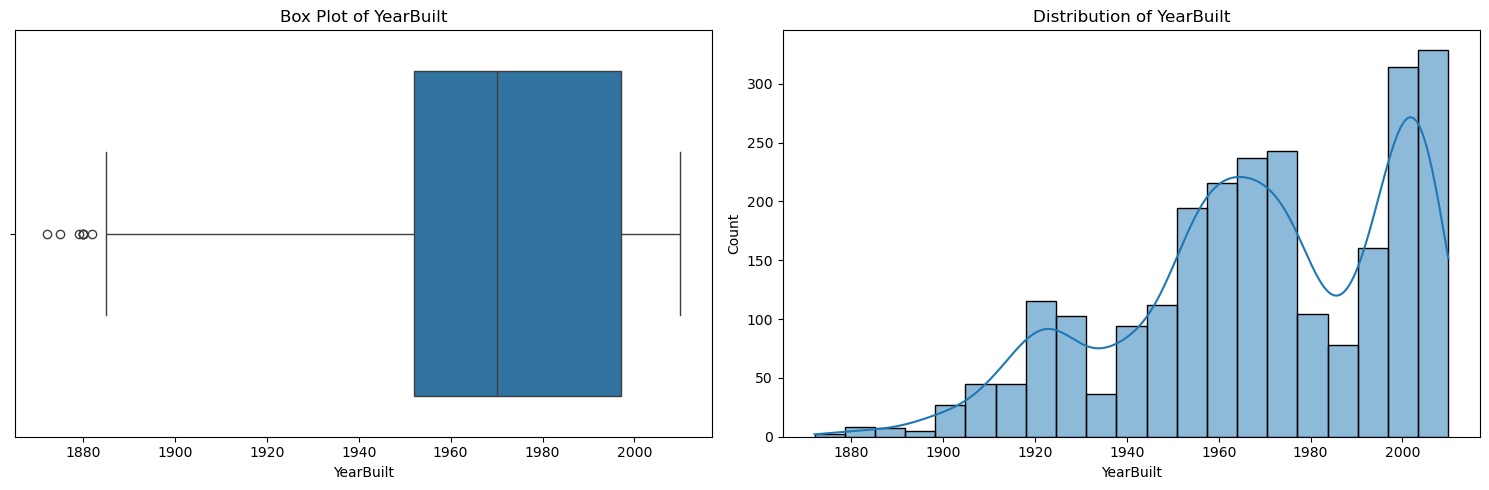


Summary for YearBuilt:
count    2474.000000
mean     1968.845998
std        29.408925
min      1872.000000
25%      1952.000000
50%      1970.000000
75%      1997.000000
max      2010.000000
Name: YearBuilt, dtype: float64
--------------------------------------------------


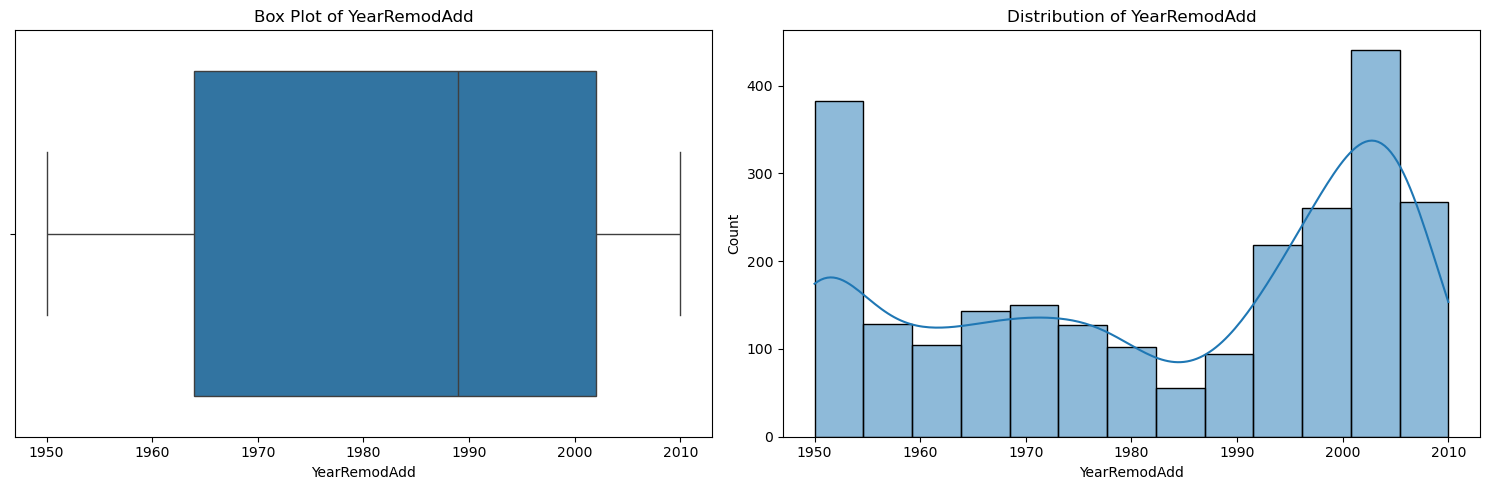


Summary for YearRemodAdd:
count    2474.000000
mean     1982.664107
std        20.541574
min      1950.000000
25%      1964.000000
50%      1989.000000
75%      2002.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64
--------------------------------------------------


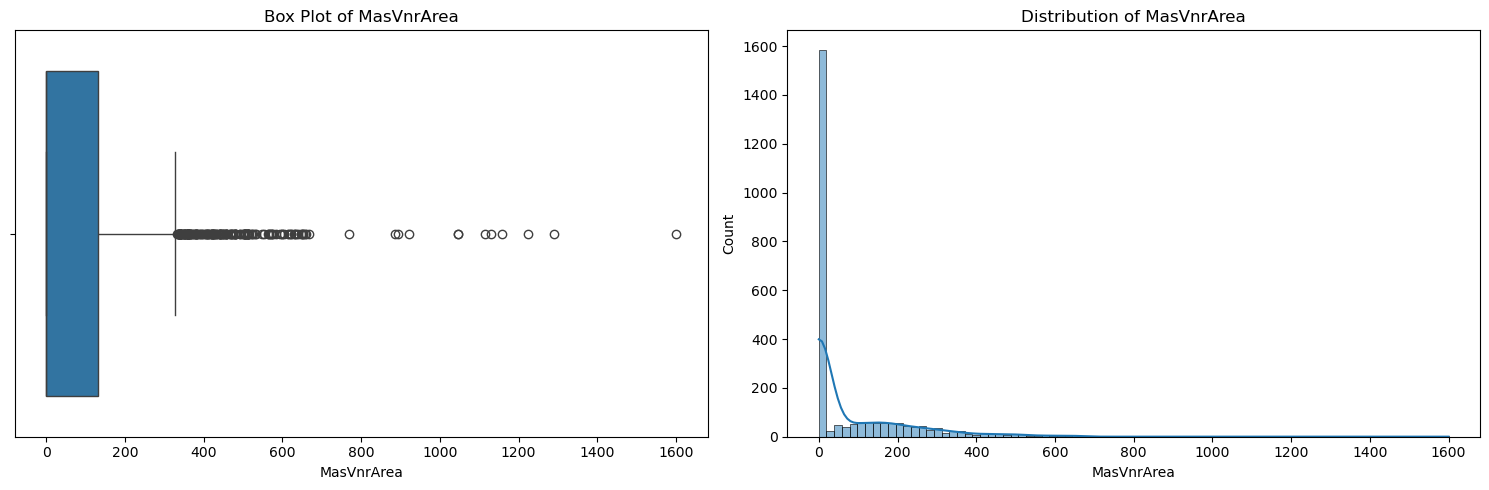


Summary for MasVnrArea:
count    2474.000000
mean       82.611156
std       150.860899
min         0.000000
25%         0.000000
50%         0.000000
75%       132.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
--------------------------------------------------


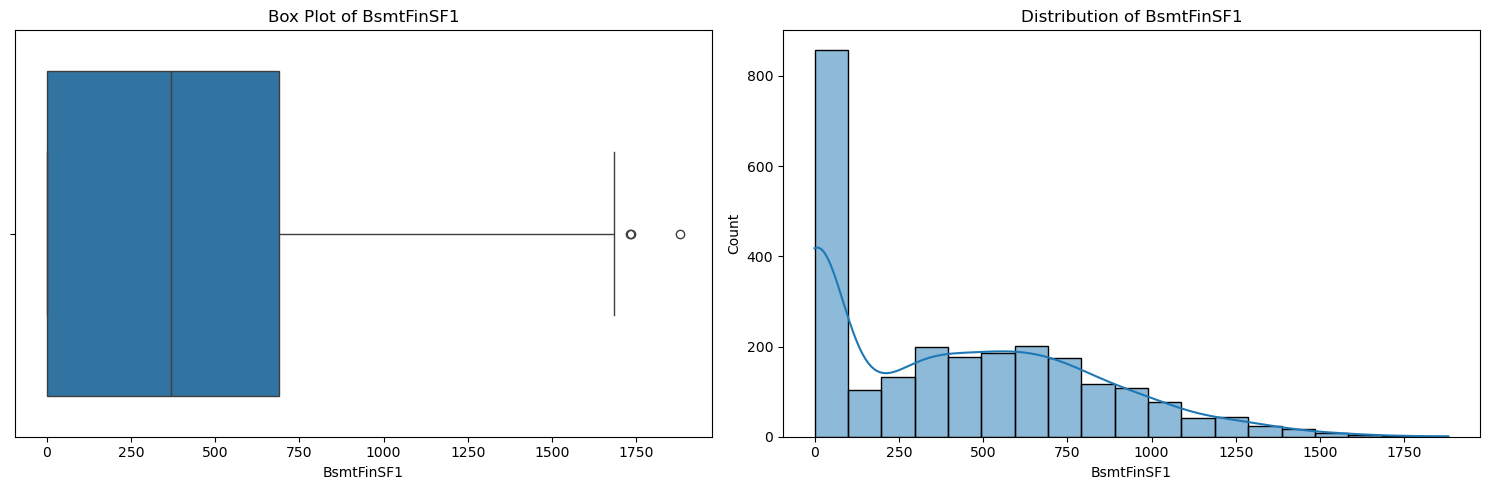


Summary for BsmtFinSF1:
count    2474.000000
mean      411.691997
std       391.639461
min         0.000000
25%         0.000000
50%       368.500000
75%       690.000000
max      1880.000000
Name: BsmtFinSF1, dtype: float64
--------------------------------------------------


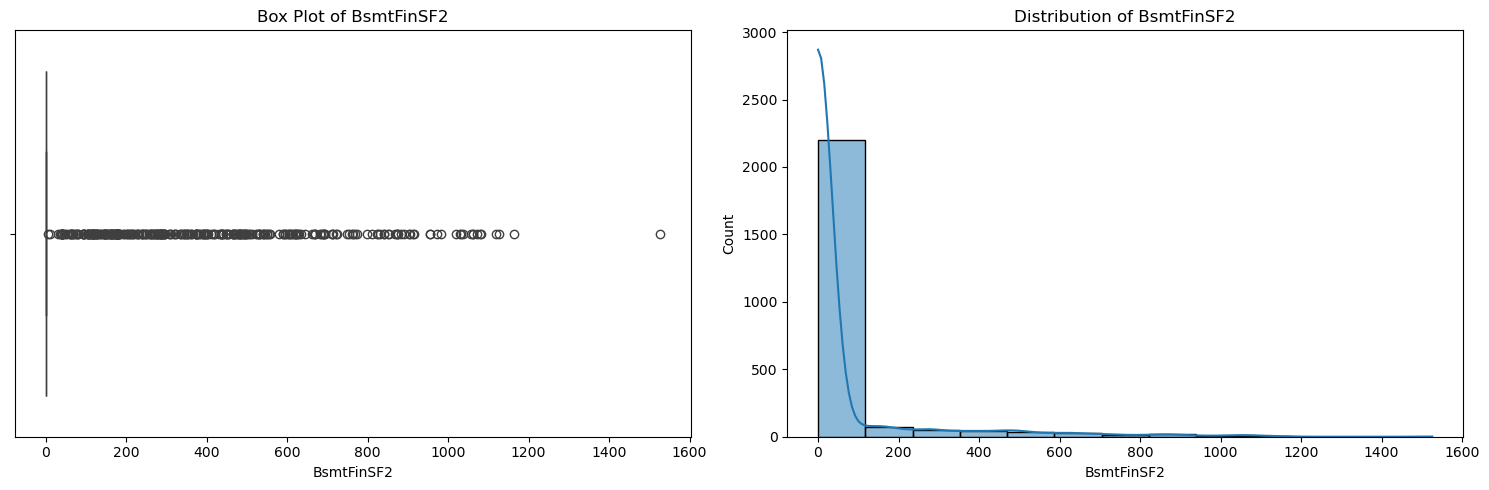


Summary for BsmtFinSF2:
count    2474.000000
mean       52.002021
std       168.311076
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: BsmtFinSF2, dtype: float64
--------------------------------------------------


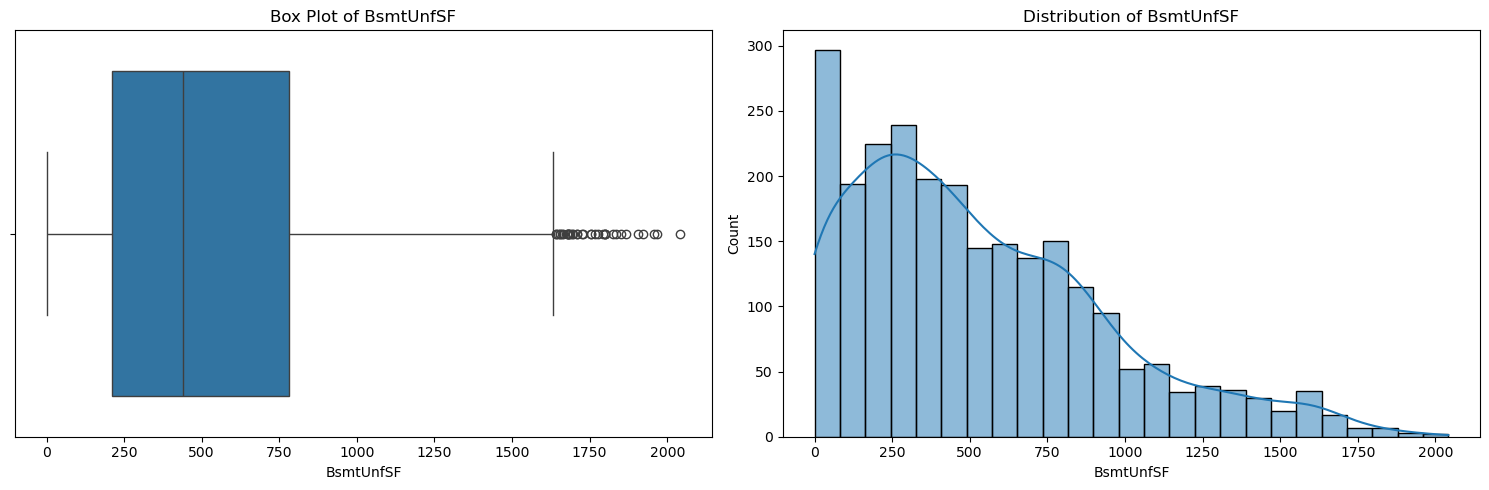


Summary for BsmtUnfSF:
count    2474.000000
mean      531.095796
std       415.561588
min         0.000000
25%       210.000000
50%       441.000000
75%       780.750000
max      2042.000000
Name: BsmtUnfSF, dtype: float64
--------------------------------------------------


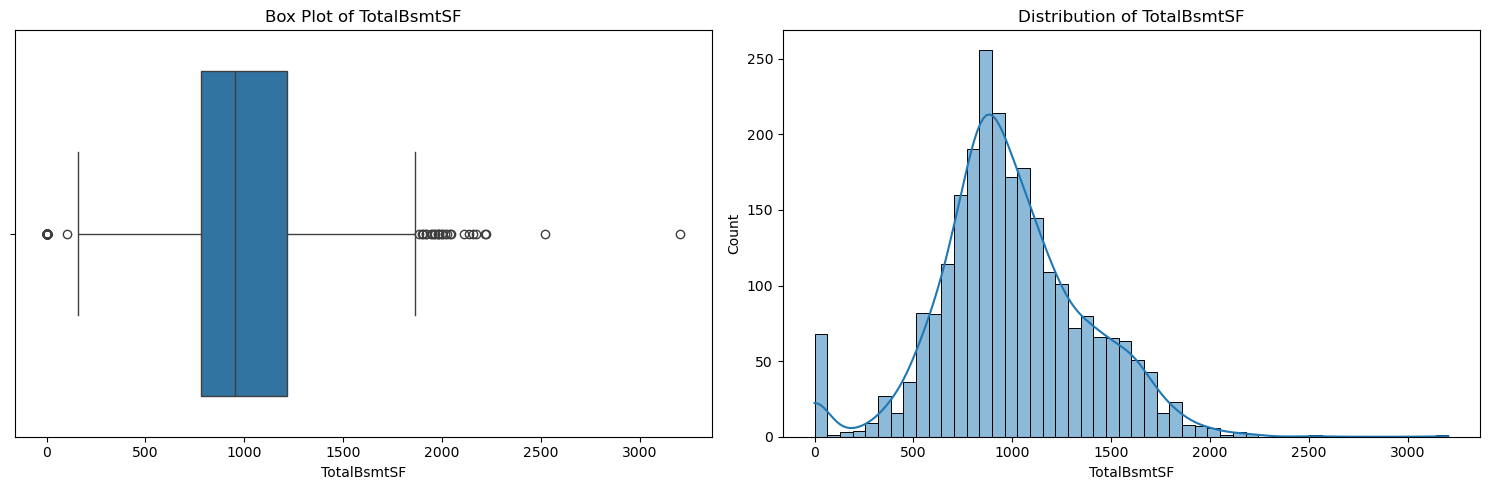


Summary for TotalBsmtSF:
count    2474.000000
mean      994.848019
std       376.847003
min         0.000000
25%       780.000000
50%       955.000000
75%      1216.000000
max      3206.000000
Name: TotalBsmtSF, dtype: float64
--------------------------------------------------


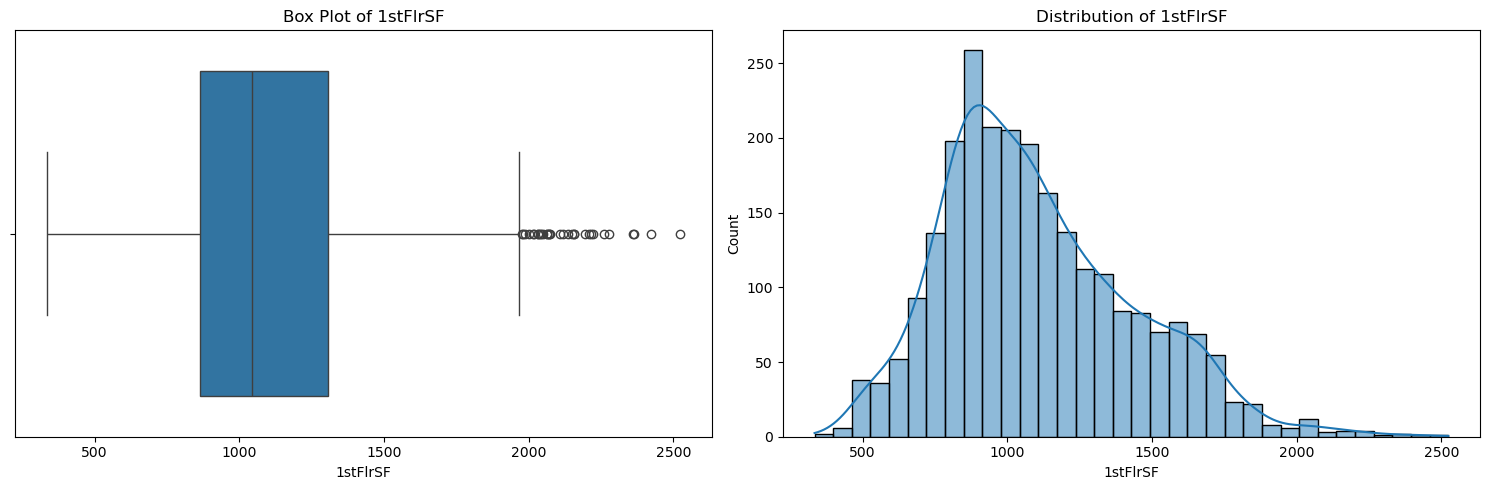


Summary for 1stFlrSF:
count    2474.000000
mean     1103.022635
std       332.203922
min       334.000000
25%       864.000000
50%      1044.500000
75%      1306.750000
max      2524.000000
Name: 1stFlrSF, dtype: float64
--------------------------------------------------


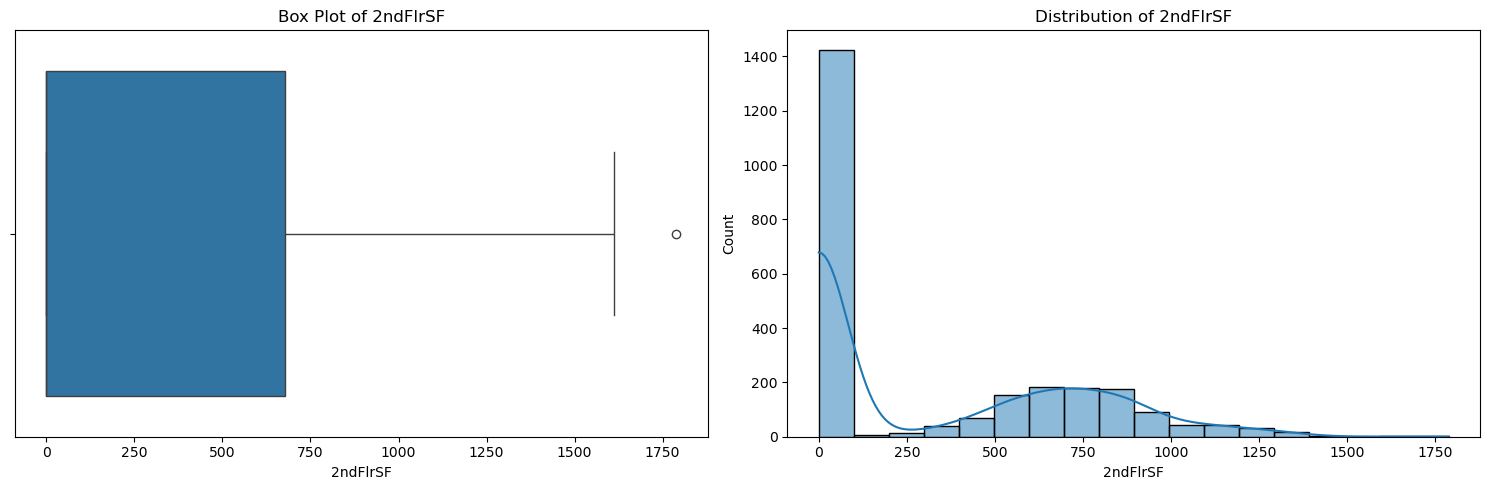


Summary for 2ndFlrSF:
count    2474.000000
mean      315.103072
std       397.525694
min         0.000000
25%         0.000000
50%         0.000000
75%       678.000000
max      1788.000000
Name: 2ndFlrSF, dtype: float64
--------------------------------------------------


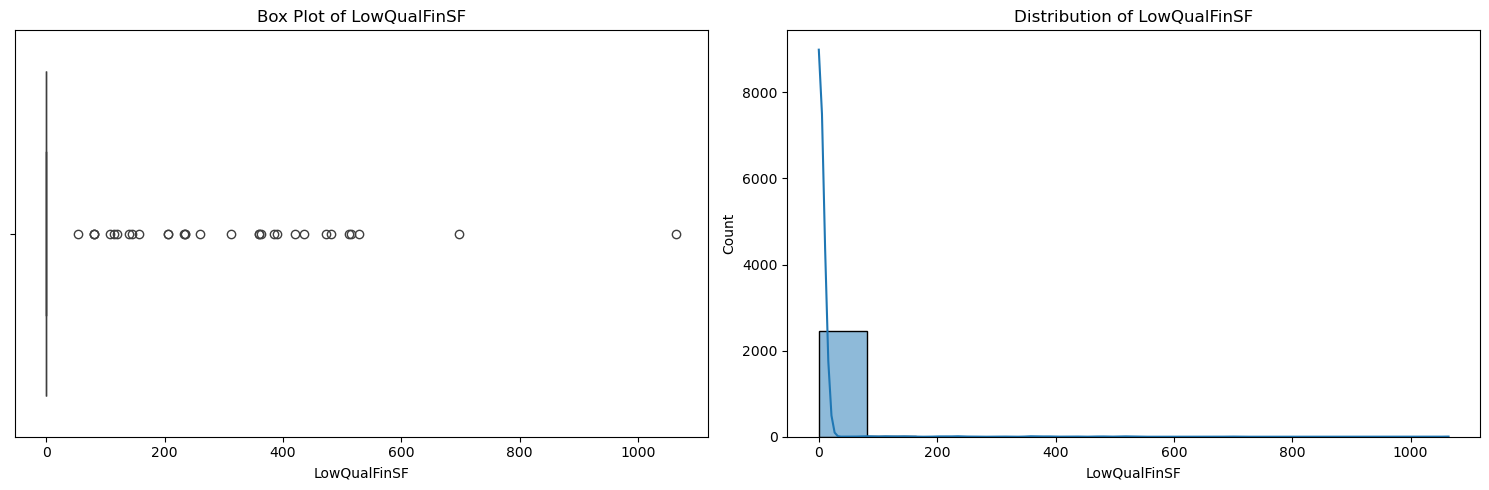


Summary for LowQualFinSF:
count    2474.000000
mean        3.935732
std        42.341710
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1064.000000
Name: LowQualFinSF, dtype: float64
--------------------------------------------------


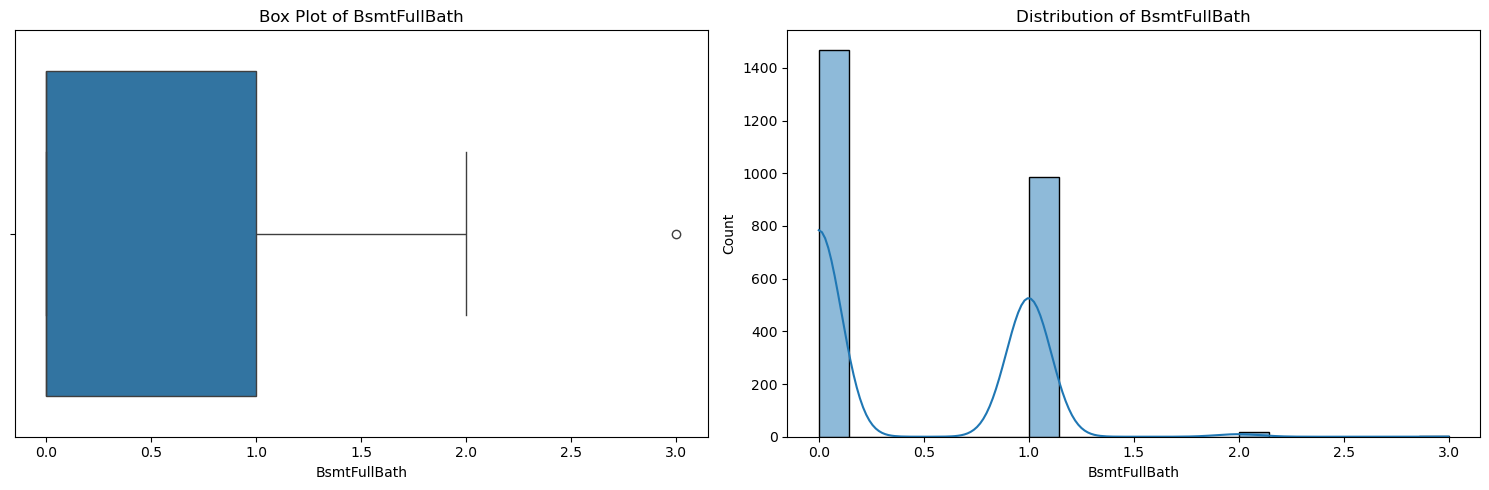


Summary for BsmtFullBath:
count    2474.000000
mean        0.414309
std         0.509646
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64
--------------------------------------------------


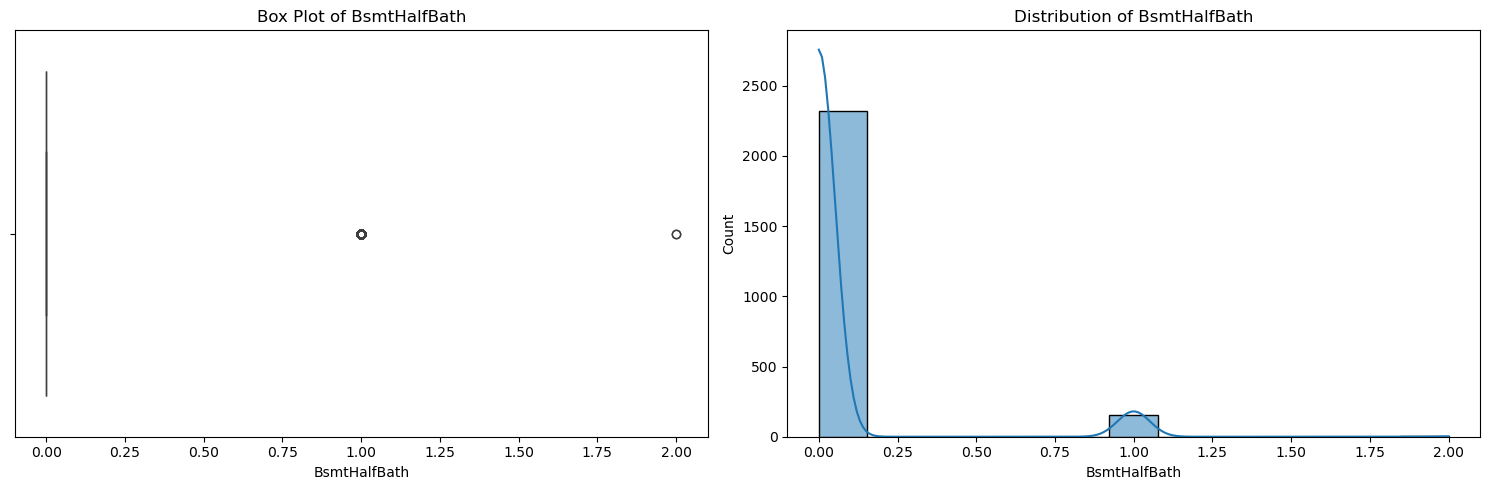


Summary for BsmtHalfBath:
count    2474.000000
mean        0.063056
std         0.246417
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64
--------------------------------------------------


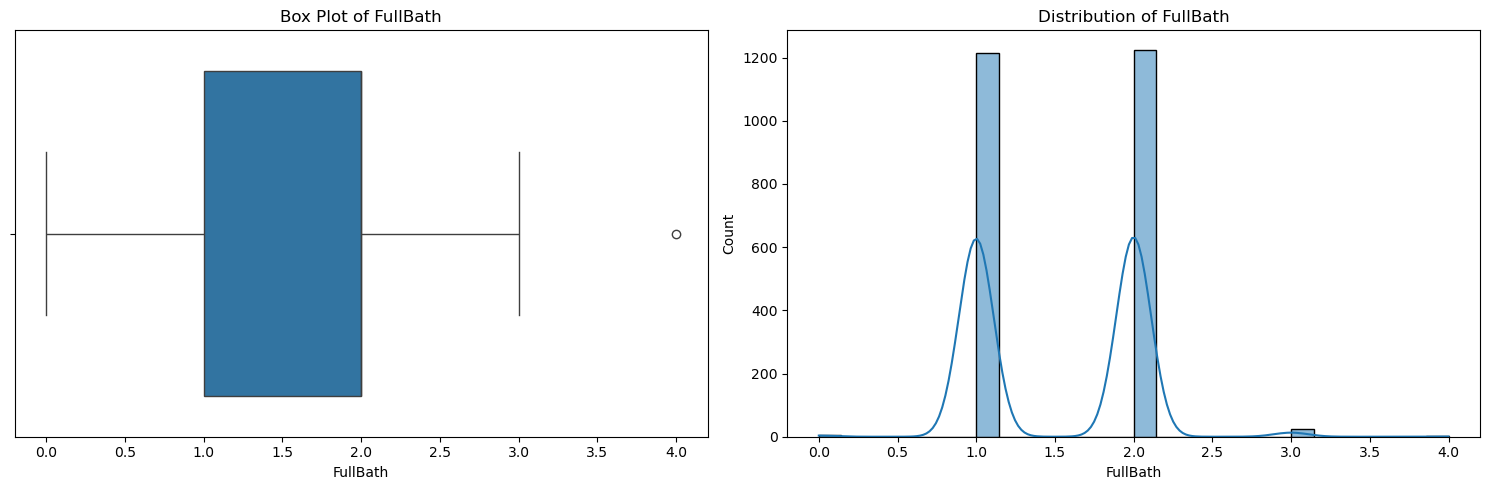


Summary for FullBath:
count    2474.000000
mean        1.513743
std         0.527464
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: FullBath, dtype: float64
--------------------------------------------------


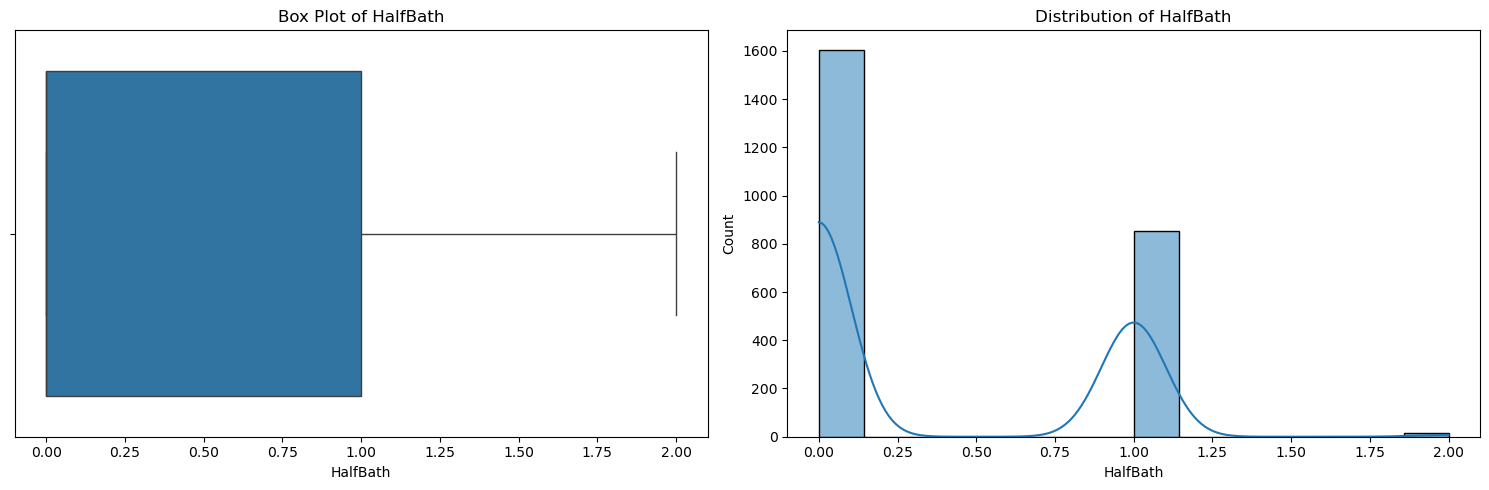


Summary for HalfBath:
count    2474.000000
mean        0.356912
std         0.490857
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64
--------------------------------------------------


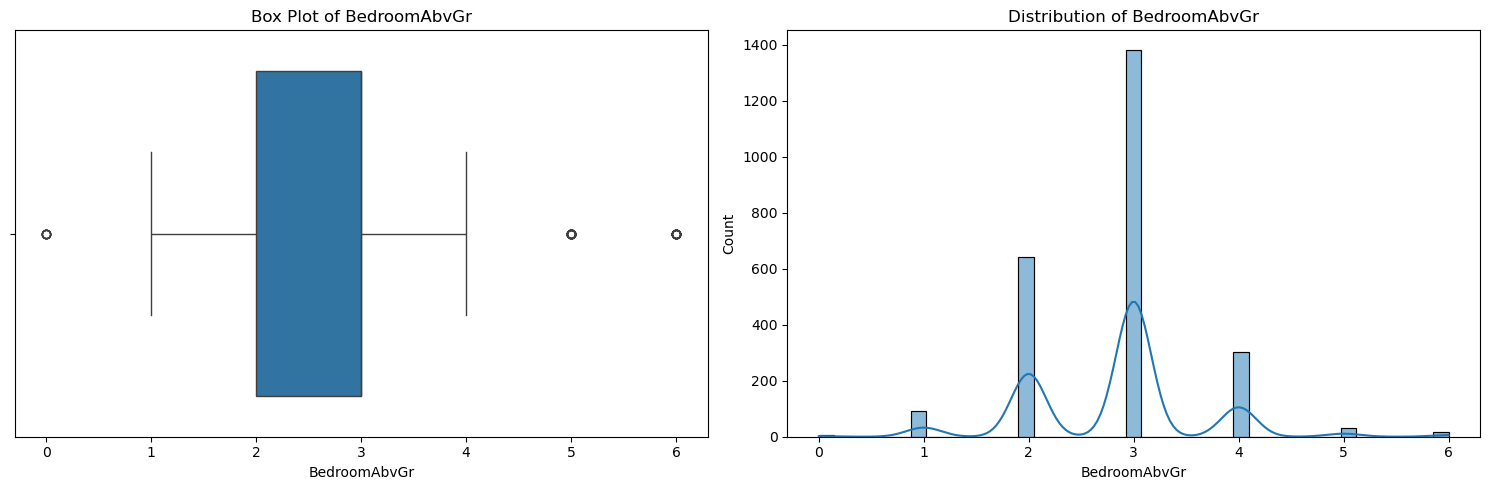


Summary for BedroomAbvGr:
count    2474.000000
mean        2.824980
std         0.797087
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: BedroomAbvGr, dtype: float64
--------------------------------------------------


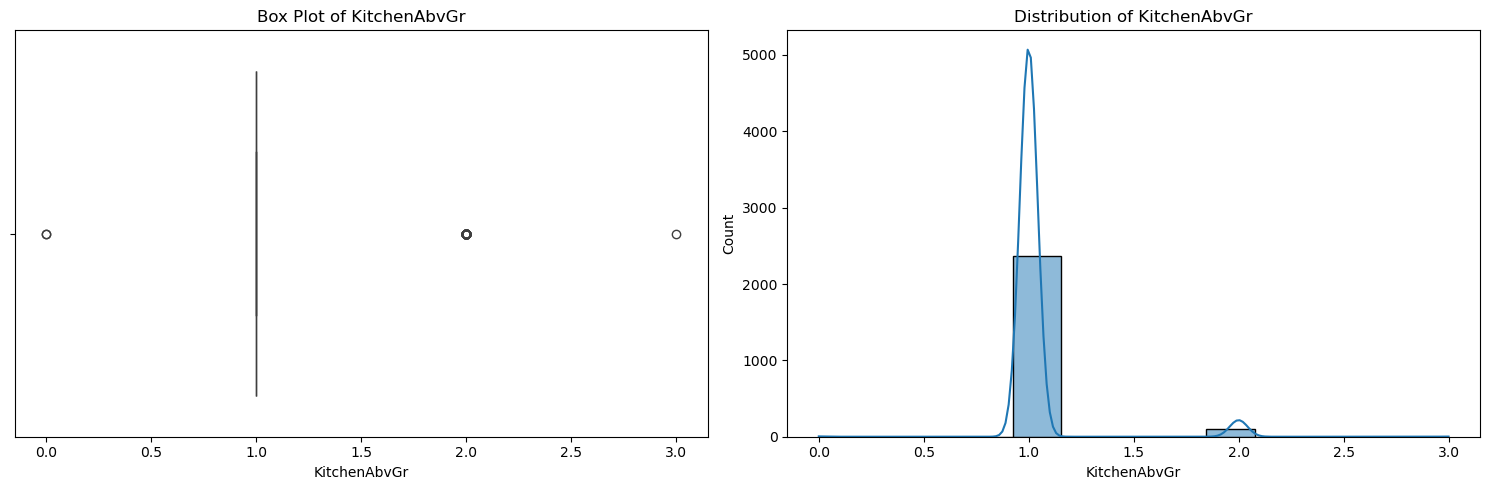


Summary for KitchenAbvGr:
count    2474.000000
mean        1.040825
std         0.203961
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64
--------------------------------------------------


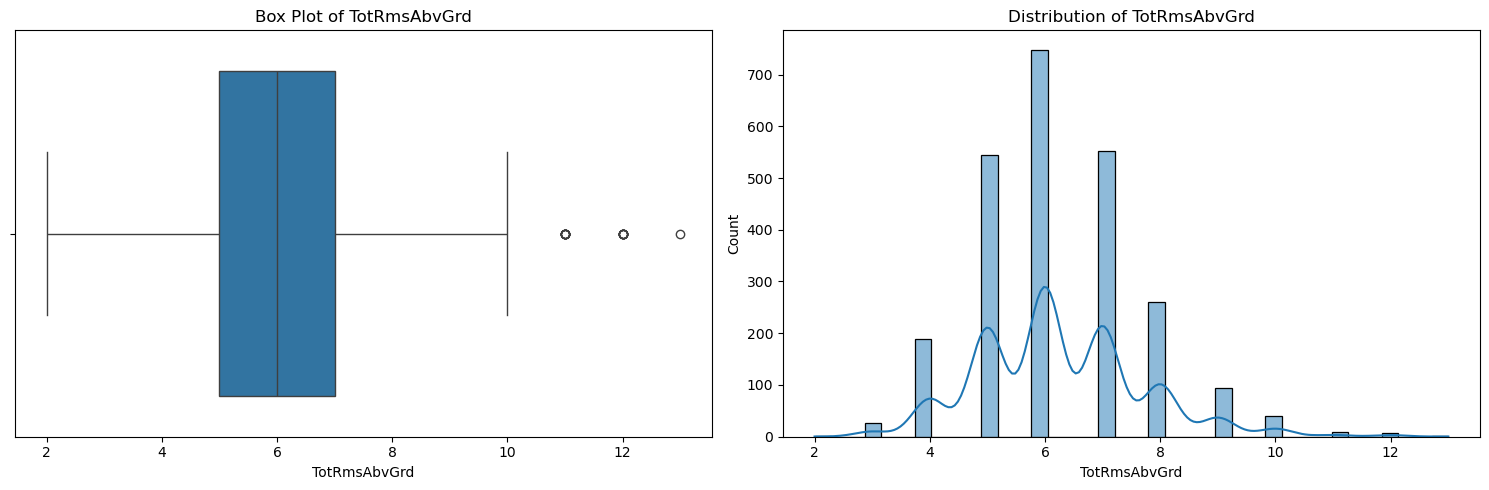


Summary for TotRmsAbvGrd:
count    2474.000000
mean        6.248585
std         1.429022
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        13.000000
Name: TotRmsAbvGrd, dtype: float64
--------------------------------------------------


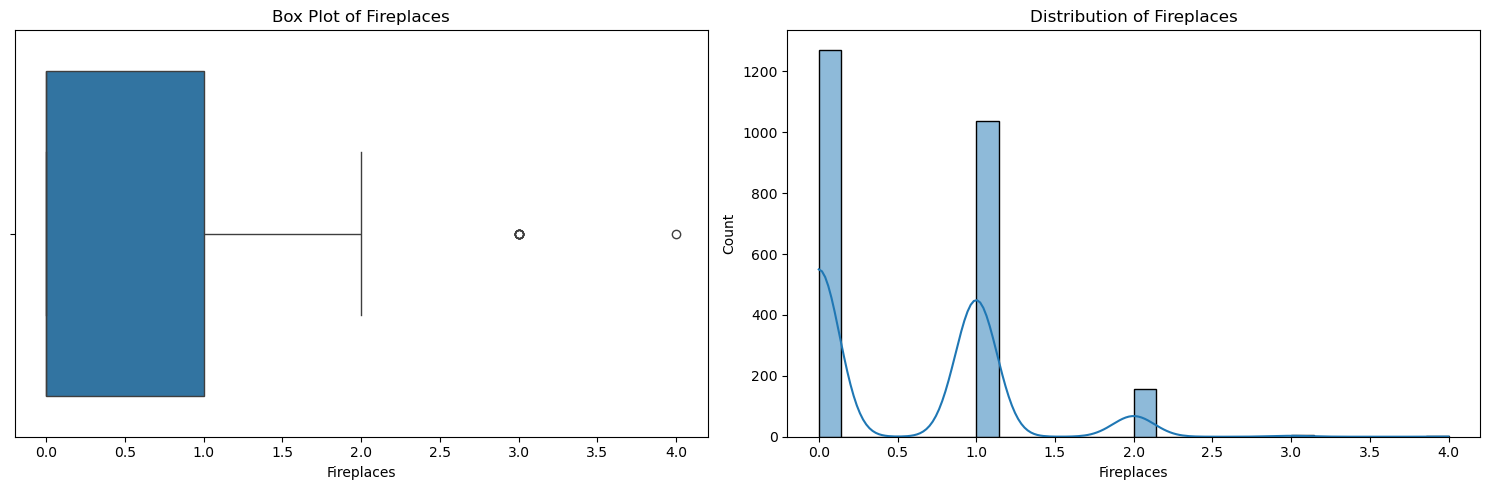


Summary for Fireplaces:
count    2474.000000
mean        0.556589
std         0.629051
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         4.000000
Name: Fireplaces, dtype: float64
--------------------------------------------------


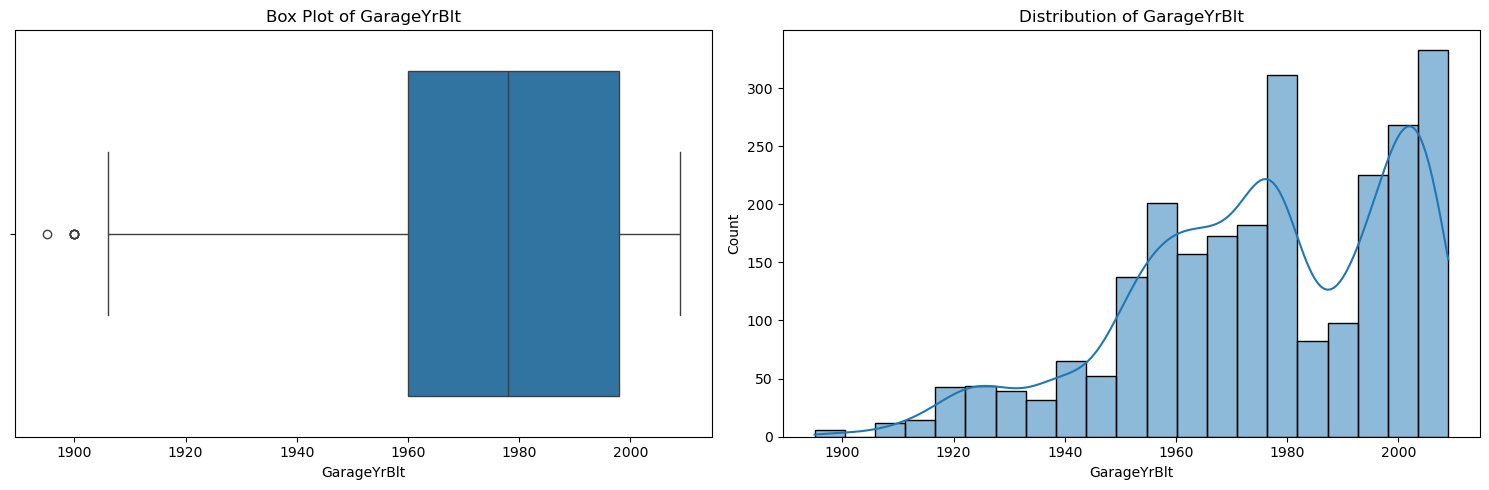


Summary for GarageYrBlt:
count    2474.000000
mean     1975.735247
std        23.922232
min      1895.000000
25%      1960.000000
50%      1978.000000
75%      1998.000000
max      2009.000000
Name: GarageYrBlt, dtype: float64
--------------------------------------------------


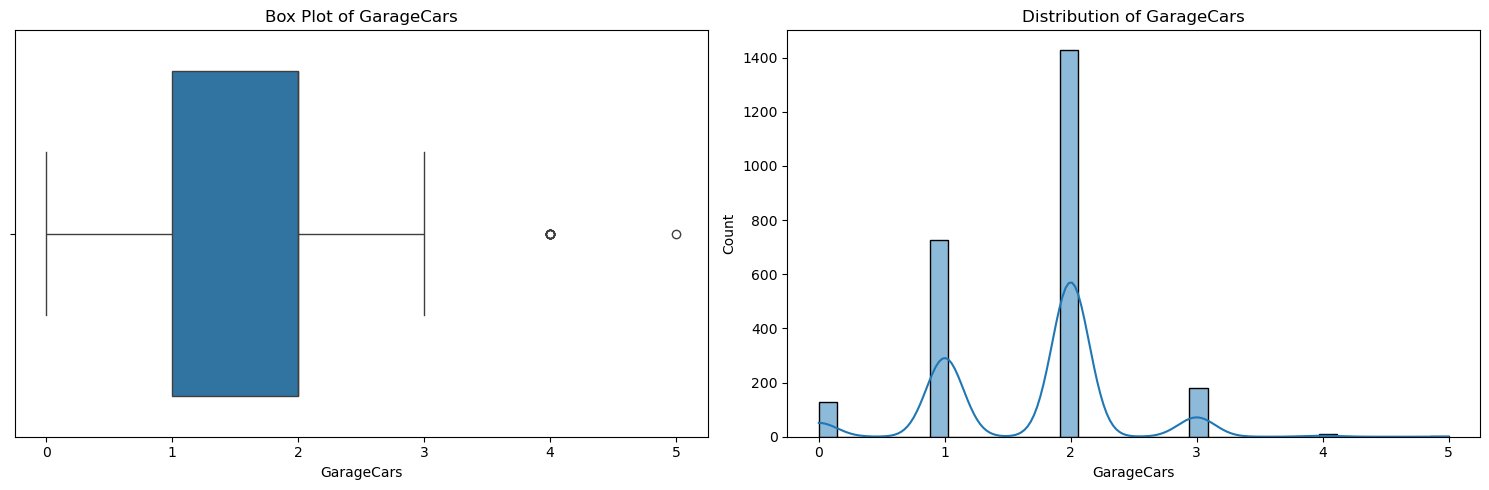


Summary for GarageCars:
count    2474.000000
mean        1.683104
std         0.701092
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64
--------------------------------------------------


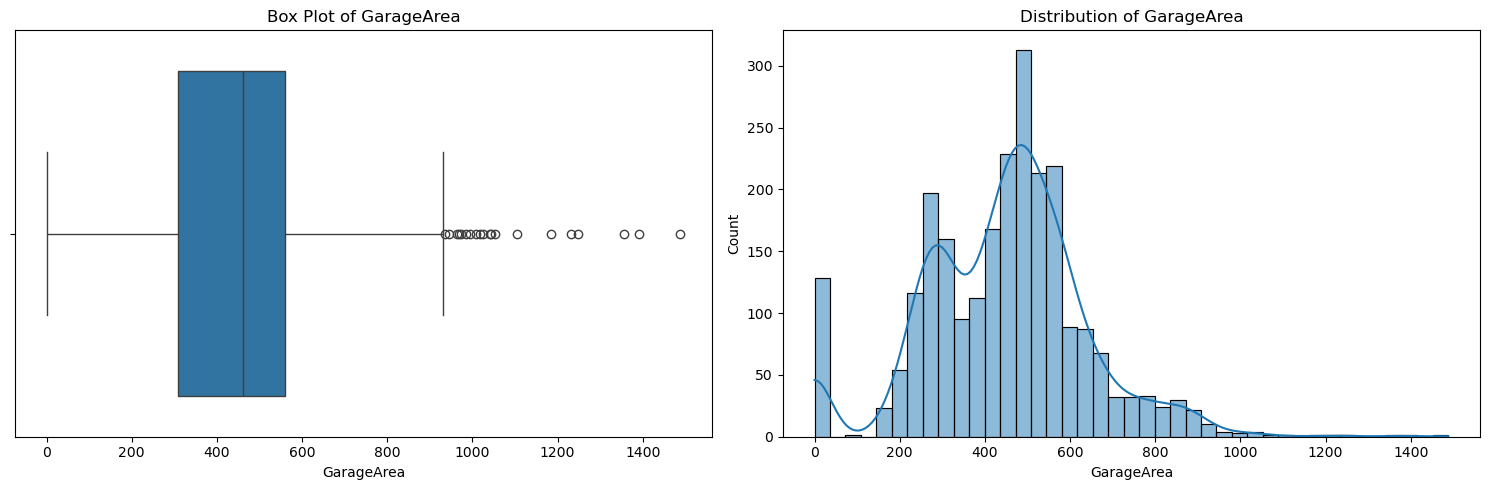


Summary for GarageArea:
count    2474.000000
mean      447.138642
std       193.008220
min         0.000000
25%       308.000000
50%       462.000000
75%       558.750000
max      1488.000000
Name: GarageArea, dtype: float64
--------------------------------------------------


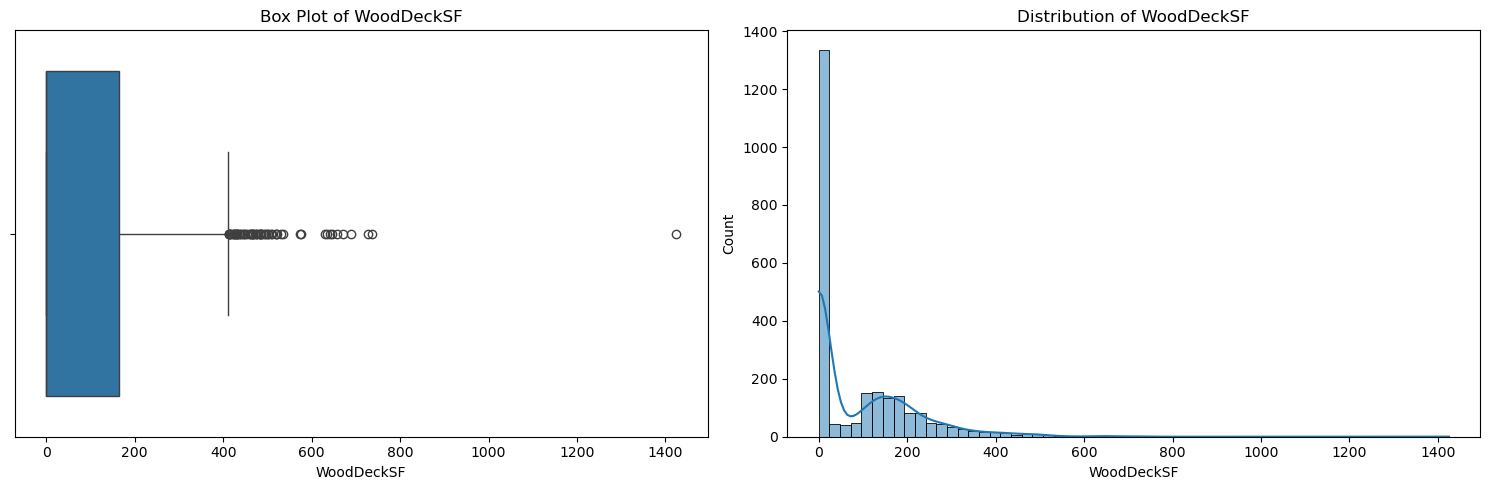


Summary for WoodDeckSF:
count    2474.000000
mean       89.899353
std       123.988651
min         0.000000
25%         0.000000
50%         0.000000
75%       165.000000
max      1424.000000
Name: WoodDeckSF, dtype: float64
--------------------------------------------------


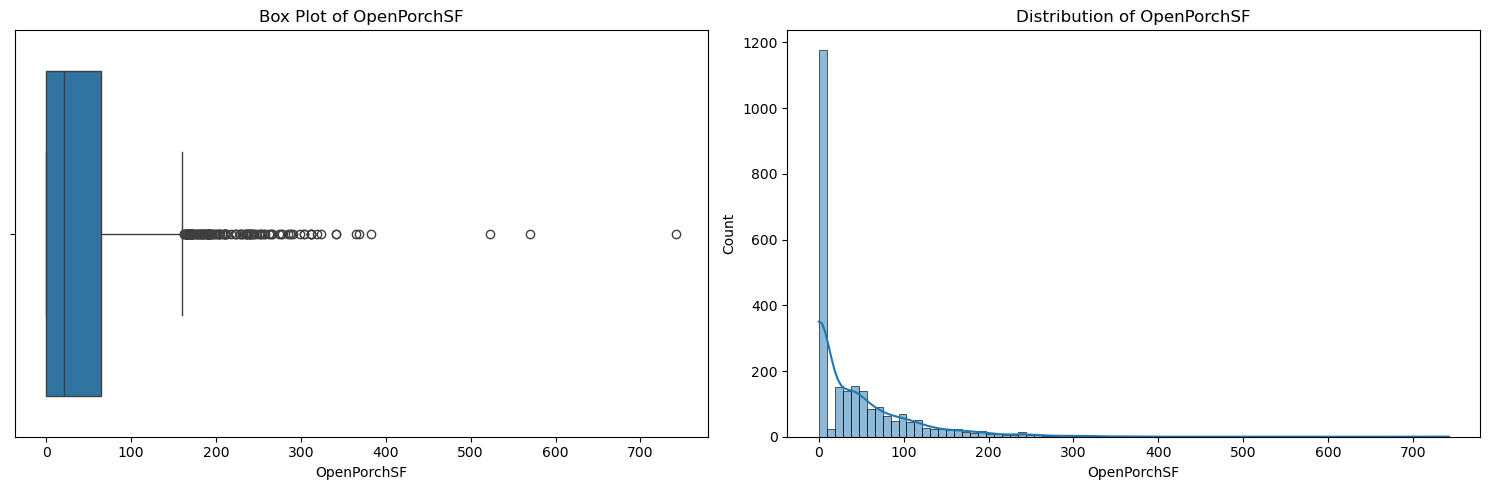


Summary for OpenPorchSF:
count    2474.000000
mean       42.876314
std        62.718197
min         0.000000
25%         0.000000
50%        21.000000
75%        64.000000
max       742.000000
Name: OpenPorchSF, dtype: float64
--------------------------------------------------


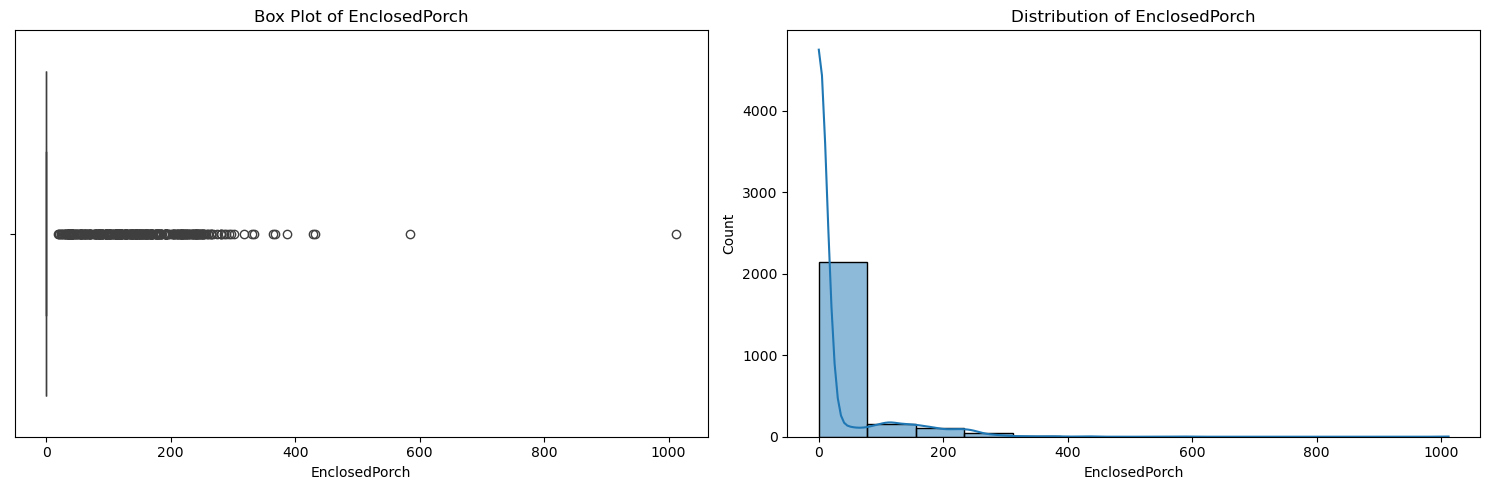


Summary for EnclosedPorch:
count    2474.000000
mean       23.748989
std        64.653780
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1012.000000
Name: EnclosedPorch, dtype: float64
--------------------------------------------------


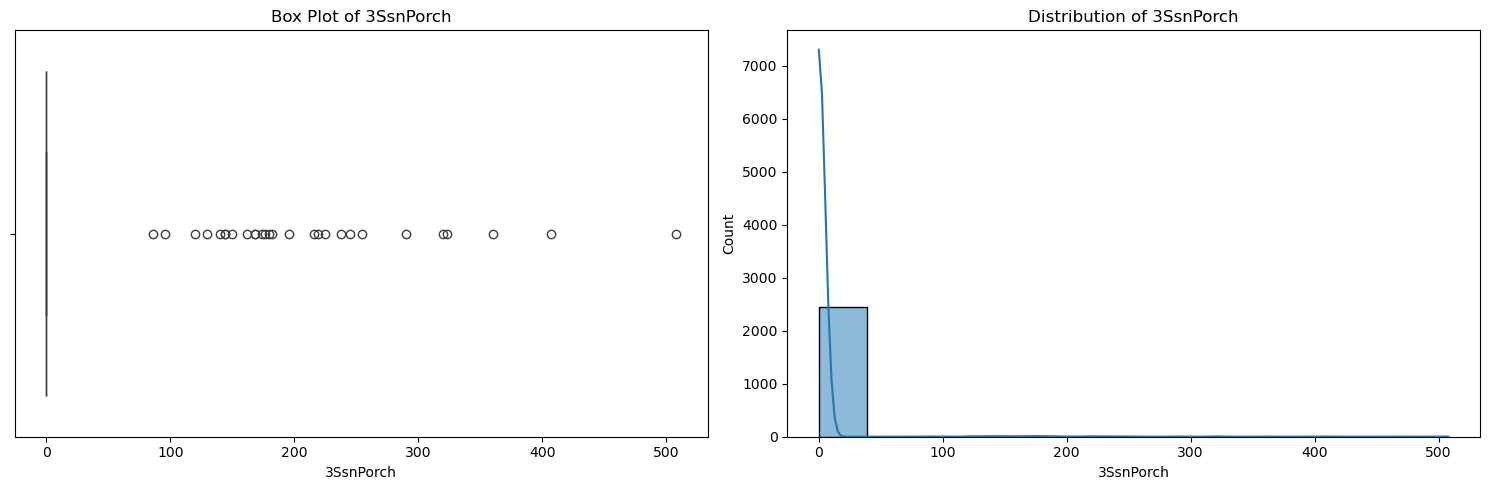


Summary for 3SsnPorch:
count    2474.000000
mean        2.434115
std        24.920316
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64
--------------------------------------------------


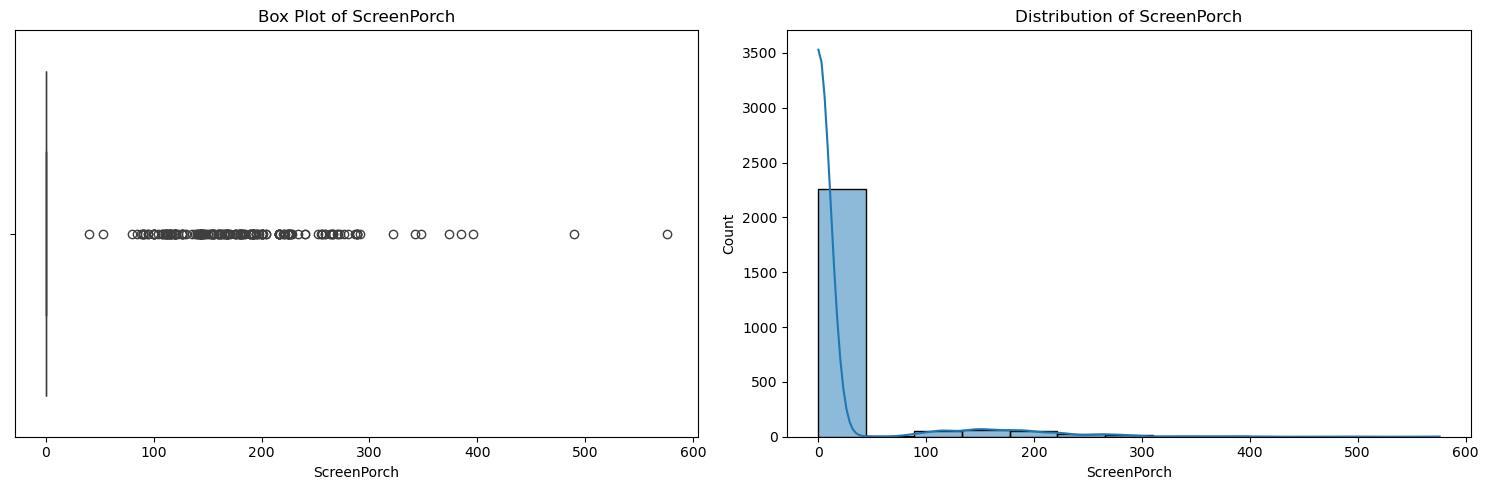


Summary for ScreenPorch:
count    2474.000000
mean       15.304365
std        54.060516
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       576.000000
Name: ScreenPorch, dtype: float64
--------------------------------------------------


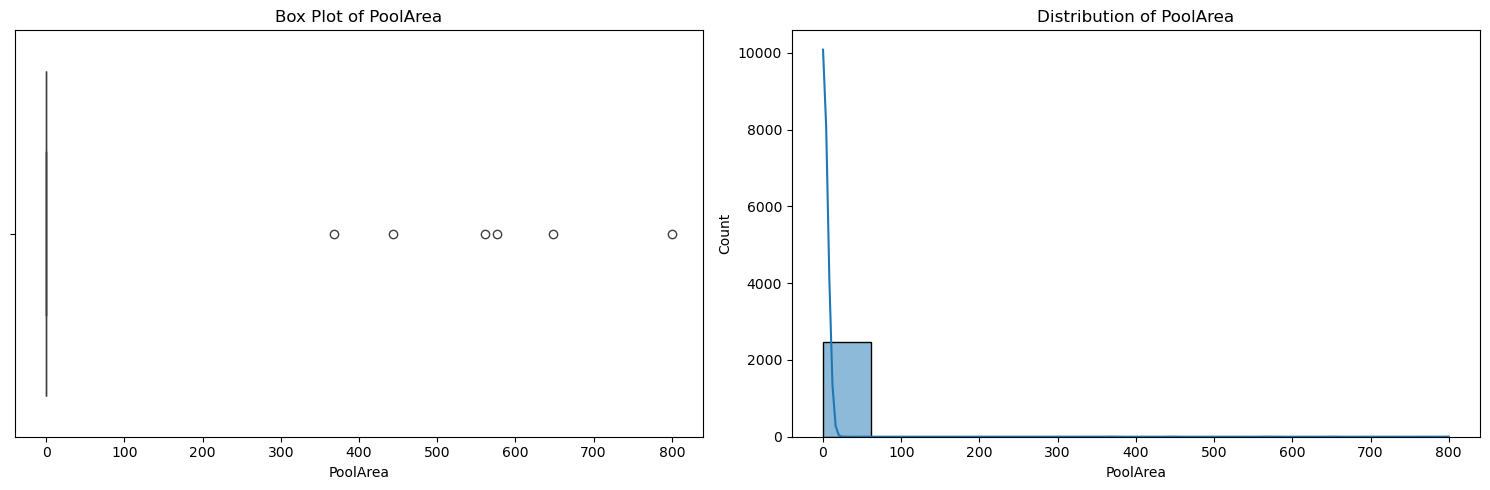


Summary for PoolArea:
count    2474.000000
mean        1.373080
std        28.681052
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       800.000000
Name: PoolArea, dtype: float64
--------------------------------------------------


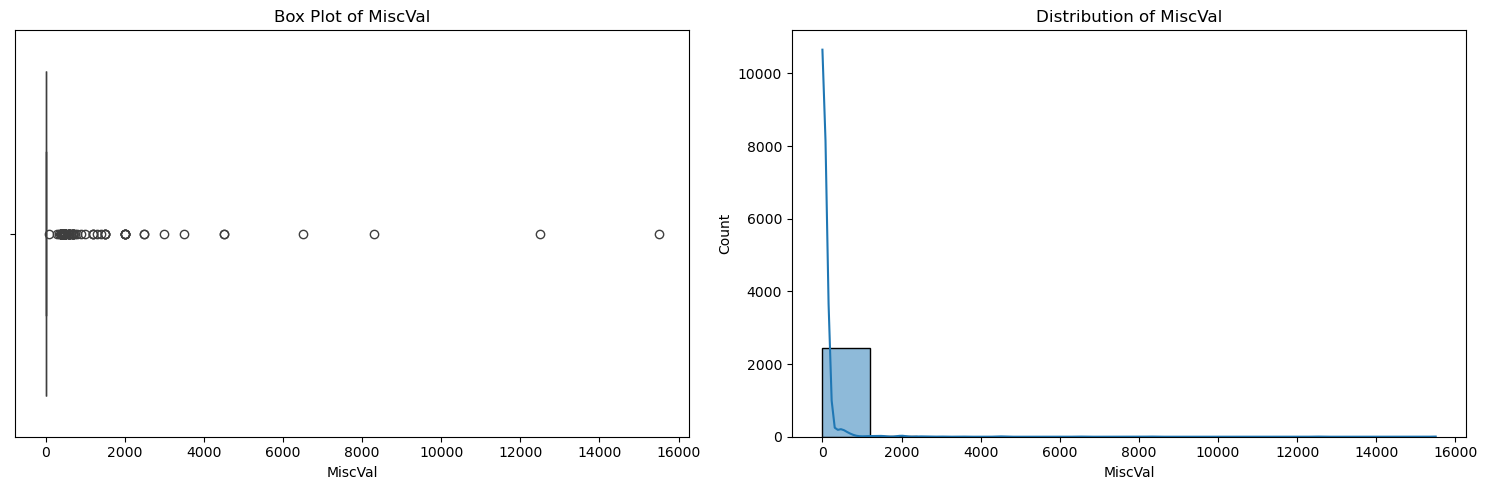


Summary for MiscVal:
count     2474.000000
mean        49.707761
std        507.253316
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64
--------------------------------------------------


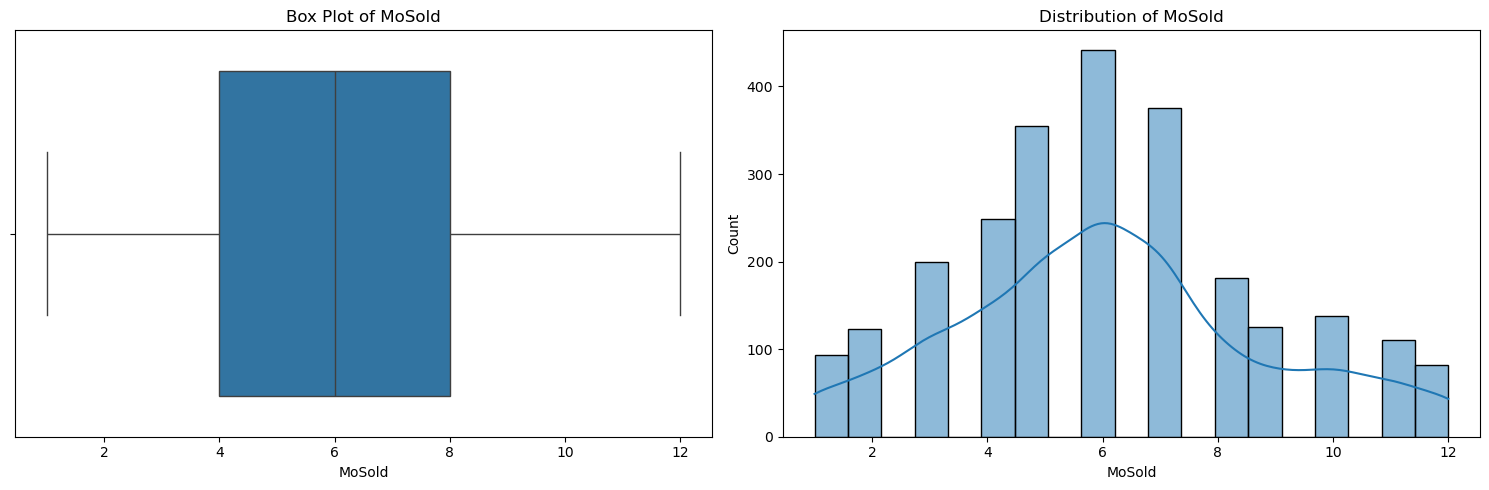


Summary for MoSold:
count    2474.000000
mean        6.121665
std         2.665195
min         1.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64
--------------------------------------------------


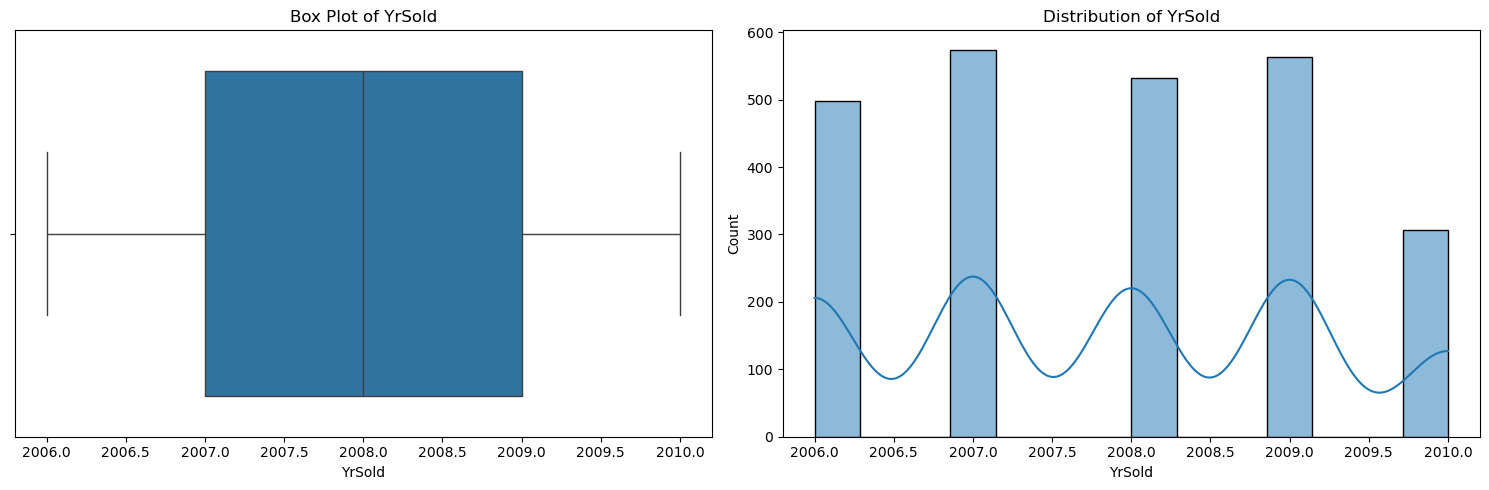


Summary for YrSold:
count    2474.000000
mean     2007.841148
std         1.317795
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64
--------------------------------------------------


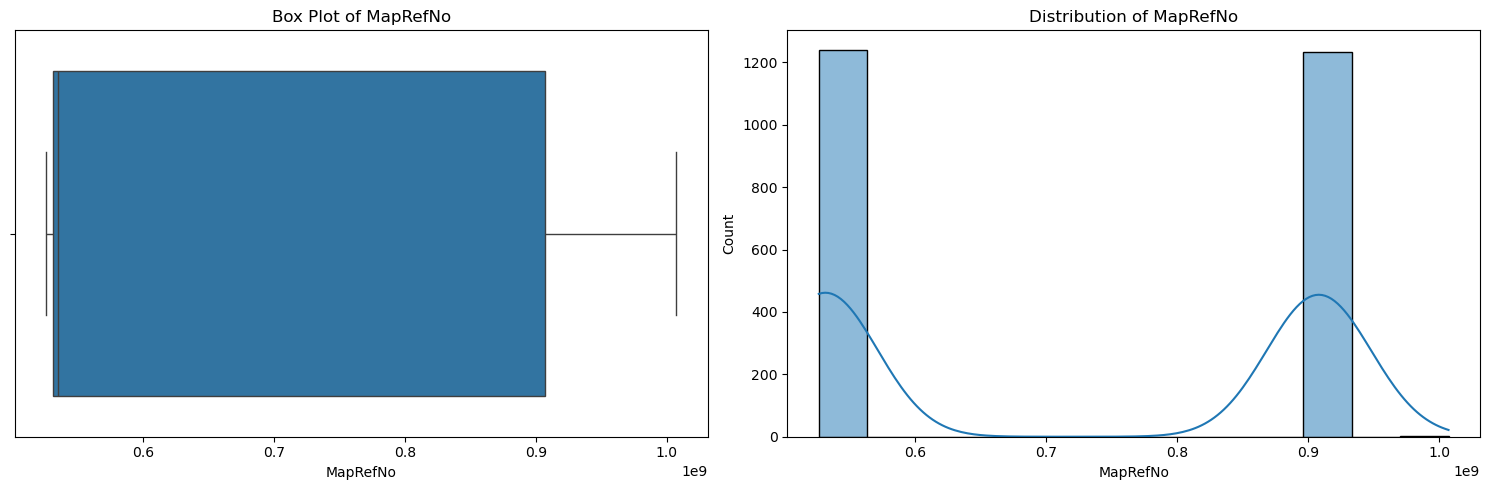


Summary for MapRefNo:
count    2.474000e+03
mean     7.191796e+08
std      1.885686e+08
min      5.263011e+08
25%      5.314783e+08
50%      5.354780e+08
75%      9.071920e+08
max      1.007100e+09
Name: MapRefNo, dtype: float64
--------------------------------------------------

Step 6: Performing market segmentation...

Market Segment Analysis:
             SalePrice                            GrLivArea OverallQual  \
                 count       mean     min     max      mean        mean   
PriceSegment                                                              
Entry Level        626  105619.79   12789  128500   1096.05        4.79   
Mid-Low            623  141365.70  128600  155000   1275.05        5.41   
Mid-High           606  174812.11  155500  195800   1505.62        6.19   
Luxury             619  241619.28  196000  326000   1817.92        7.21   

             YearBuilt  
                  mean  
PriceSegment            
Entry Level    1945.21  
Mid-Low        1960.91  

/var/folders/m8/2_nz4r1s3r1_ghgs6pxgk9880000gn/T/ipykernel_29220/2464143772.py:198: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis = self.data.groupby('PriceSegment').agg({


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

class AmesHousingBase:
    """Base class containing shared functionality"""
    def __init__(self):
        self.outliers_dict = {}
        self.data = None
    
    def detect_outliers(self, df, columns=None):
        """
        Identify outliers using IQR method
        Parameters:
            df: DataFrame to analyze
            columns: List of columns to check for outliers. If None, checks all numeric columns
        """
        if columns is None:
            columns = df.select_dtypes(include=['float64', 'int64']).columns
            
        outliers_dict = {}
        for column in columns:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers = df[(df[column] < lower_bound) | 
                         (df[column] > upper_bound)][column]
            
            if not outliers.empty:
                outliers_dict[column] = {
                    'outliers': outliers,
                    'bounds': (lower_bound, upper_bound),
                    'count': len(outliers)
                }
        
        self.outliers_dict = outliers_dict
        return outliers_dict
    
    def remove_outliers(self, df, columns=None):
        """
        Remove outliers from specified columns
        Parameters:
            df: DataFrame to clean
            columns: List of columns to remove outliers from. If None, checks all numeric columns
        Returns:
            Clean DataFrame with outliers removed
        """
        df_clean = df.copy()
        
        # Detect outliers if not already done
        if not self.outliers_dict:
            self.detect_outliers(df_clean, columns)
        
        # Keep track of removed rows
        total_rows_removed = 0
        rows_removed_by_column = {}
        
        # Remove outliers from each column
        for column, outlier_info in self.outliers_dict.items():
            lower_bound, upper_bound = outlier_info['bounds']
            original_count = len(df_clean)
            
            df_clean = df_clean[
                (df_clean[column] >= lower_bound) & 
                (df_clean[column] <= upper_bound)
            ]
            
            rows_removed = original_count - len(df_clean)
            rows_removed_by_column[column] = rows_removed
            total_rows_removed += rows_removed
        
        print("\nOutlier Removal Summary:")
        print(f"Total rows removed: {total_rows_removed}")
        print("\nRows removed by column:")
        for column, count in rows_removed_by_column.items():
            print(f"{column}: {count} rows")
        
        return df_clean

class AmesDataPreprocessor(AmesHousingBase):
    """Class for data loading and preprocessing"""
    def __init__(self):
        super().__init__()
        self.missing_summary = None
        self.standardization_params = {}
        
        # File paths
        self.housing_path = "Documents/NYDSA #3 Machine Learning Project/Machine Learning Project Proposal-Jorge Final Version from NYCDSA/Ames_HousePrice.csv"
        self.real_estate_path = "Documents/NYDSA #3 Machine Learning Project/Machine Learning Project Proposal-Jorge Final Version from NYCDSA/Ames Real Estate Data.csv"
    
    def load_and_merge_data(self):
        """Load and merge both Ames datasets"""
        try:
            self.housing_data = pd.read_csv(self.housing_path)
            self.real_estate = pd.read_csv(self.real_estate_path, low_memory=False)
            
            print(f"Successfully loaded:\nHousing data shape: {self.housing_data.shape}")
            print(f"Real estate data shape: {self.real_estate.shape}")
            
            # Merge datasets
            self.data = pd.merge(
                self.housing_data,
                self.real_estate[['MapRefNo', 'Prop_Addr']],
                left_on='PID',
                right_on='MapRefNo',
                how='left'
            )
            
            print(f"Merged data shape: {self.data.shape}")
            return self.data
            
        except FileNotFoundError as e:
            print(f"Error loading files: {e}")
            return None
    
    def handle_missing_values(self, df):
        """Impute missing values and track changes"""
        df = df.copy()
        missing_data = {
            'column': [],
            'missing_count': [],
            'imputation_method': []
        }
        
        # Handle categorical variables with mode
        for col in df.select_dtypes(include=['object']):
            if df[col].isnull().any():
                mode_val = df[col].mode()[0]
                df[col] = df[col].fillna(mode_val)
                missing_data['column'].append(col)
                missing_data['missing_count'].append(df[col].isnull().sum())
                missing_data['imputation_method'].append('mode')
                
        # Handle numeric variables
        for col in df.select_dtypes(include=['float64', 'int64']):
            if df[col].isnull().any():
                if 'Qual' in col or 'Cond' in col:
                    df[col] = df[col].fillna(df[col].mode()[0])
                    method = 'mode'
                else:
                    df[col] = df[col].fillna(df[col].median())
                    method = 'median'
                    
                missing_data['column'].append(col)
                missing_data['missing_count'].append(df[col].isnull().sum())
                missing_data['imputation_method'].append(method)
        
        self.missing_summary = pd.DataFrame(missing_data)
        return df

class AmesHousingEDA(AmesHousingBase):
    """Class for exploratory data analysis"""
    def __init__(self, data):
        super().__init__()
        self.data = data
        self.market_segments = None
    
    def analyze_all_numeric_features(self):
        """Complete analysis of all numeric features with outlier detection"""
        numeric_cols = self.data.select_dtypes(include=['float64', 'int64']).columns
        
        for col in numeric_cols:
            # Create visualization
            plt.figure(figsize=(15, 5))
            
            # Box plot
            plt.subplot(1, 2, 1)
            sns.boxplot(x=self.data[col])
            plt.title(f'Box Plot of {col}')
            
            # Distribution plot
            plt.subplot(1, 2, 2)
            sns.histplot(data=self.data, x=col, kde=True)
            plt.title(f'Distribution of {col}')
            
            plt.tight_layout()
            plt.show()
            
            # Print summary statistics
            print(f"\nSummary for {col}:")
            print(self.data[col].describe())
            print("-" * 50)
    
    def market_segmentation_analysis(self):
        """Analyze market segments based on price ranges"""
        # Create price segments
        self.data['PriceSegment'] = pd.qcut(self.data['SalePrice'], 
                                          q=4, 
                                          labels=['Entry Level', 'Mid-Low', 'Mid-High', 'Luxury'])
        
        # Analyze segments
        segment_analysis = self.data.groupby('PriceSegment').agg({
            'SalePrice': ['count', 'mean', 'min', 'max'],
            'GrLivArea': 'mean',
            'OverallQual': 'mean',
            'YearBuilt': 'mean'
        }).round(2)
        
        self.market_segments = segment_analysis
        return segment_analysis

class AmesPipeline:
    """Class to coordinate the entire analysis process"""
    def __init__(self):
        self.preprocessor = AmesDataPreprocessor()
        self.data = None
        self.clean_data = None
    
    def run_pipeline(self, remove_outliers=True, outlier_columns=None):
        """
        Run the complete analysis pipeline
        Parameters:
            remove_outliers: Boolean, whether to remove outliers
            outlier_columns: List of columns to check for outliers. If None, checks all numeric columns
        """
        print("Step 1: Loading and merging data...")
        self.data = self.preprocessor.load_and_merge_data()
        
        if self.data is None:
            print("Error: Failed to load data. Pipeline stopped.")
            return
        
        print("\nStep 2: Handling missing values...")
        self.data = self.preprocessor.handle_missing_values(self.data)
        print("Missing value summary:")
        print(self.preprocessor.missing_summary)
        
        if remove_outliers:
            print("\nStep 3: Removing outliers...")
            self.clean_data = self.preprocessor.remove_outliers(self.data, outlier_columns)
        else:
            self.clean_data = self.data.copy()
        
        print("\nStep 4: Initializing EDA...")
        eda = AmesHousingEDA(self.clean_data)
        
        print("\nStep 5: Analyzing numeric features...")
        eda.analyze_all_numeric_features()
        
        print("\nStep 6: Performing market segmentation...")
        market_segments = eda.market_segmentation_analysis()
        print("\nMarket Segment Analysis:")
        print(market_segments)
        
        return self.clean_data

# Example usage:
pipeline = AmesPipeline()

# Run the complete pipeline with outlier removal
# You can specify specific columns for outlier removal if desired
clean_data = pipeline.run_pipeline(
    remove_outliers=True,
    outlier_columns=['SalePrice', 'GrLivArea']  # Add or remove columns as needed
)

In [ ]:
print(clean_data.head())
print(clean_data.columns)

   Unnamed: 0        PID  GrLivArea  SalePrice  MSSubClass MSZoning  \
0           1  909176150        856     126000          30       RL   
1           2  905476230       1049     139500         120       RL   
2           2  905476230       1049     139500         120       RL   
3           3  911128020       1001     124900          30  C (all)   
4           4  535377150       1039     114000          70       RL   

   LotFrontage  LotArea Street Alley  ...  Fence MiscFeature MiscVal MoSold  \
0         68.0     7890   Pave  Grvl  ...  MnPrv        Shed       0      3   
1         42.0     4235   Pave  Grvl  ...  MnPrv        Shed       0      2   
2         42.0     4235   Pave  Grvl  ...  MnPrv        Shed       0      2   
3         60.0     6060   Pave  Grvl  ...  MnPrv        Shed       0     11   
4         80.0     8146   Pave  Grvl  ...  MnPrv        Shed       0      5   

  YrSold SaleType SaleCondition     MapRefNo         Prop_Addr PriceSegment  
0   2010      WD    

In [108]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from datetime import datetime

class AmesFeatureEngineering:
    def __init__(self):
        self.label_encoders = {}
        self.scaler = StandardScaler()
    
    def create_time_features(self, df):
        """Create time-related features"""
        # Create season based on month (without using pd.cut)
        season_map = {
            1: 'Winter', 2: 'Winter',
            3: 'Spring', 4: 'Spring', 5: 'Spring',
            6: 'Summer', 7: 'Summer', 8: 'Summer',
            9: 'Fall', 10: 'Fall', 11: 'Fall',
            12: 'Winter'
        }
        df['Season'] = df['MoSold'].map(season_map)
        
        # Years from peak market (assuming 2006-2007 was peak)
        df['YearsFromPeak'] = df['YrSold'] - 2006
        df['YearsFromPeak'] = df['YearsFromPeak'].apply(lambda x: abs(x))
        
        # Add sale quarter
        df['SaleQuarter'] = ((df['MoSold'] - 1) // 3) + 1
        
        # Add busy season flag (spring/summer)
        df['BusySeason'] = df['Season'].isin(['Spring', 'Summer']).astype(int)
        
        return df
    
    def create_quality_features(self, df):
        """Create composite quality scores"""
        # Overall quality score (combining various quality indicators)
        quality_cols = ['OverallQual', 'ExterQual', 'BsmtQual', 'HeatingQC', 
                       'KitchenQual', 'GarageQual']
        
        # Convert quality features to numeric
        qual_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
        for col in quality_cols:
            if df[col].dtype == 'object':
                df[col] = df[col].map(qual_map).fillna(0)
        
        # Create composite quality score
        df['QualityScore'] = df[quality_cols].mean(axis=1)
        
        # Create condition score
        condition_cols = ['OverallCond', 'ExterCond', 'BsmtCond', 'GarageCond']
        for col in condition_cols:
            if df[col].dtype == 'object':
                df[col] = df[col].map(qual_map).fillna(0)
        df['ConditionScore'] = df[condition_cols].mean(axis=1)
        
        return df
    
    def create_size_features(self, df):
        """Create composite size-related features"""
        # Total SF (all areas)
        df['TotalSF'] = df['GrLivArea'] + df['TotalBsmtSF'] + df['GarageArea']
        
        # Price per SF
        df['PricePerSF'] = df['SalePrice'] / df['TotalSF']
        
        # Living area ratios
        df['BasementRatio'] = df['TotalBsmtSF'] / df['GrLivArea']
        df['GarageRatio'] = df['GarageArea'] / df['GrLivArea']
        
        # Total bathrooms
        df['TotalBaths'] = df['FullBath'] + (0.5 * df['HalfBath']) + \
                          df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath'])
        
        # Bedroom to bathroom ratio
        df['BedroomBathRatio'] = df['BedroomAbvGr'] / df['TotalBaths']
        
        return df
    
    def create_age_features(self, df):
        """Create age and renovation related features"""
        current_year = 2010  # Based on your dataset's last sale year
        
        # Age when sold
        df['AgeAtSale'] = df['YrSold'] - df['YearBuilt']
        
        # Years since renovation
        df['YearsSinceRenovation'] = df['YrSold'] - df['YearRemodAdd']
        
        # Renovation age ratio (0 if never renovated)
        df['RenovationAgeRatio'] = (df['YearRemodAdd'] - df['YearBuilt']) / df['AgeAtSale']
        
        # Age of garage
        df['GarageAge'] = df['YrSold'] - df['GarageYrBlt']
        
        return df
    
    def create_location_features(self, df):
        """Create location-based features"""
        # Neighborhood price level
        neighborhood_price_mean = df.groupby('Neighborhood')['SalePrice'].transform('mean')
        df['NeighborhoodPriceLevel'] = neighborhood_price_mean / df['SalePrice'].mean()
        
        # Location quality score (combining location-related conditions)
        location_map = {
            'Artery': 0, 'Feedr': 1, 'Norm': 2, 'RRNn': 1, 'RRAn': 0, 
            'PosN': 3, 'PosA': 3, 'RRNe': 1, 'RRAe': 0
        }
        df['Location1Score'] = df['Condition1'].map(location_map).fillna(1)
        df['Location2Score'] = df['Condition2'].map(location_map).fillna(1)
        df['LocationScore'] = df[['Location1Score', 'Location2Score']].max(axis=1)
        
        return df
    
    def encode_categorical_features(self, df):
        """Encode categorical variables"""
        # Features to label encode (ordinal features)
        ordinal_features = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
                          'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 
                          'GarageCond', 'PoolQC']
        
        # Features to one-hot encode (nominal features)
        nominal_features = ['MSZoning', 'Street', 'LotShape', 'LandContour', 
                          'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 
                          'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
                          'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating', 
                          'CentralAir', 'Electrical', 'GarageType', 'PavedDrive', 
                          'Fence', 'SaleType', 'SaleCondition', 'Season']
        
        # Label encoding for ordinal features
        for feature in ordinal_features:
            if feature in df.columns:
                le = LabelEncoder()
                df[feature] = le.fit_transform(df[feature].fillna('None'))
                self.label_encoders[feature] = le
        
        # One-hot encoding for nominal features
        df = pd.get_dummies(df, columns=nominal_features, dummy_na=True)
        
        return df
    
    def transform_features(self, df):
        """Transform numerical features to handle skewness"""
        # List of features to log transform (positive skewed)
        log_features = ['LotArea', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 
                       '2ndFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']
        
        for feature in log_features:
            if feature in df.columns:
                # Add small constant to handle zeros
                df[f'{feature}_Log'] = np.log1p(df[feature])
        
        return df
    
    def process_features(self, df):
        """Main method to run all feature engineering steps"""
        print("Starting feature engineering process...")
        
        # Create new features
        print("Creating quality features...")
        df = self.create_quality_features(df)
        
        print("Creating size features...")
        df = self.create_size_features(df)
        
        print("Creating age features...")
        df = self.create_age_features(df)
        
        print("Creating location features...")
        df = self.create_location_features(df)
        
        print("Creating time features...")
        df = self.create_time_features(df)
        
        # Handle categorical features
        print("Encoding categorical features...")
        df = self.encode_categorical_features(df)
        
        # Transform numerical features
        print("Transforming numerical features...")
        df = self.transform_features(df)
        
        # Drop unnecessary columns
        columns_to_drop = ['Unnamed: 0', 'PID', 'MapRefNo', 'Prop_Addr']
        df = df.drop(columns_to_drop, axis=1)
        
        print("Feature engineering complete!")
        return df

# Example usage:
feature_engineer = AmesFeatureEngineering()
engineered_data = feature_engineer.process_features(clean_data.copy())

# Display new feature summary
print("\nNew dataset shape:", engineered_data.shape)
print("\nNew features created:", 
      [col for col in engineered_data.columns if col not in clean_data.columns])

# Save engineered data
engineered_data.to_csv('engineered_ames_data.csv', index=False)

NameError: name 'clean_data' is not defined

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

class AmesValueAnalyzer:
    def __init__(self, data):
        self.data = data
        self.correlation_matrix = None
        self.feature_importance_df = None
        self.selected_features = None
        
    def get_numeric_columns(self):
        """Get only numeric columns from the dataset"""
        return self.data.select_dtypes(include=[np.number]).columns
    
    def standardize_features(self, features):
        """
        Standardize features using z-score normalization:
        1. Subtract the mean (center to 0)
        2. Divide by standard deviation (scale to unit variance)
        """
        data_std = self.data[features].copy()
        for col in features:
            mean = data_std[col].mean()
            std = data_std[col].std()
            if std != 0:  # Avoid division by zero
                data_std[col] = (data_std[col] - mean) / std
            else:
                print(f"Warning: {col} has zero standard deviation")
        return data_std
    
    def analyze_quality_price_premium(self):
        """Analyzes how different quality levels affect house prices"""
        numeric_quality_cols = [col for col in self.get_numeric_columns() 
                              if any(x in col.lower() for x in ['qual', 'cond', 'rating', 'score'])]
        
        if not numeric_quality_cols:
            print("No numeric quality-related columns found in the dataset")
            return None
            
        fig, axes = plt.subplots(len(numeric_quality_cols), 1, figsize=(12, 5*len(numeric_quality_cols)))
        if len(numeric_quality_cols) == 1:
            axes = [axes]
            
        quality_premiums = {}
        for i, col in enumerate(numeric_quality_cols):
            # Calculate average price for each quality level
            avg_prices = self.data.groupby(col)['SalePrice'].agg(['mean', 'count', 'std']).round(2)
            quality_premiums[col] = avg_prices
            
            # Plot
            ax = axes[i]
            avg_prices['mean'].plot(kind='bar', ax=ax, yerr=avg_prices['std'], capsize=5)
            ax.set_title(f'Average Price by {col}')
            ax.set_ylabel('Price ($)')
            ax.tick_params(axis='x', rotation=45)
            
        plt.tight_layout()
        plt.show()
        
        return quality_premiums
    
    def analyze_property_configuration(self):
        """Analyzes how property configuration affects value"""
        numeric_cols = self.get_numeric_columns()
        
        config_features = {
            'Size': [col for col in numeric_cols if any(x in col.lower() for x in ['sf', 'sqft', 'area'])],
            'Rooms': [col for col in numeric_cols if any(x in col.lower() for x in ['bed', 'bath', 'room'])],
            'Garage': [col for col in numeric_cols if 'garage' in col.lower()]
        }
        
        results = {}
        for category, features in config_features.items():
            if not features:
                print(f"No numeric {category} features found")
                continue
                
            # Calculate correlations with price
            correlations = self.data[features + ['SalePrice']].corr()['SalePrice'].sort_values()
            
            # Plot correlations
            plt.figure(figsize=(10, 5))
            correlations.plot(kind='bar')
            plt.title(f'{category} Features - Correlation with Price')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
            
            results[category] = correlations
            
        return results
    
    def analyze_market_constraints(self):
        """Analyzes price ceilings and market timing effects"""
        numeric_cols = self.get_numeric_columns()
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # Price Distribution and Potential Ceiling
        sns.histplot(data=self.data['SalePrice'], bins=50, ax=axes[0,0])
        axes[0,0].set_title('Price Distribution')
        axes[0,0].axvline(self.data['SalePrice'].quantile(0.9), color='r', linestyle='--', 
                         label='90th percentile')
        axes[0,0].legend()
        
        # Price Evolution Over Time
        year_cols = [col for col in numeric_cols if 'year' in col.lower() or 'yr' in col.lower()]
        if year_cols:
            year_col = year_cols[0]
            yearly_trend = self.data.groupby(year_col)['SalePrice'].agg(['mean', 'std']).reset_index()
            axes[0,1].errorbar(yearly_trend[year_col], yearly_trend['mean'], 
                             yerr=yearly_trend['std'], capsize=5)
            axes[0,1].set_title('Price Trend Over Time')
            
        # Price Range Analysis
        price_ranges = pd.qcut(self.data['SalePrice'], q=5)
        range_stats = self.data.groupby(price_ranges)['SalePrice'].agg(['count', 'mean', 'std'])
        axes[1,0].bar(range(len(range_stats)), range_stats['count'])
        axes[1,0].set_title('Distribution Across Price Ranges')
        
        # Price Volatility
        price_std = self.data['SalePrice'].std()
        price_cv = price_std / self.data['SalePrice'].mean()
        axes[1,1].text(0.5, 0.5, f'Price Volatility (CV): {price_cv:.2%}', 
                      ha='center', va='center')
        axes[1,1].set_title('Price Volatility Metrics')
        axes[1,1].axis('off')
        
        plt.tight_layout()
        plt.show()
        
        return range_stats
    
    def identify_value_drivers(self, min_correlation=0.3):
        """Identifies significant value drivers"""
        numeric_cols = self.get_numeric_columns()
        features = [col for col in numeric_cols if col != 'SalePrice']
        
        # Standardize features for Random Forest
        X_std = self.standardize_features(features)
        y = self.data['SalePrice']
        
        # Correlation analysis
        correlations = self.data[features + ['SalePrice']].corr()['SalePrice'].abs()
        significant_correlations = correlations[correlations > min_correlation]
        
        # Random Forest importance
        rf = RandomForestRegressor(n_estimators=100, random_state=42)
        rf.fit(X_std, y)
        
        # Combine results
        importance_df = pd.DataFrame({
            'Feature': features,
            'Correlation': correlations[features],
            'RF_Importance': rf.feature_importances_
        })
        importance_df['Combined_Score'] = (importance_df['Correlation'] + 
                                         importance_df['RF_Importance']) / 2
        importance_df = importance_df.sort_values('Combined_Score', ascending=False)
        
        # Plot top features
        plt.figure(figsize=(12, 6))
        top_features = importance_df.head(15)
        plt.barh(top_features['Feature'], top_features['Combined_Score'])
        plt.title('Top 15 Value Drivers')
        plt.xlabel('Importance Score')
        plt.tight_layout()
        plt.show()
        
        return importance_df
    
    def get_final_features(self, n_features=30, correlation_threshold=0.7):
        """Selects final feature set for modeling"""
        importance_df = self.identify_value_drivers()
        
        # Get correlation matrix for top features
        top_features = importance_df['Feature'].head(n_features*2).tolist()
        correlation_matrix = self.data[top_features].corr()
        
        # Remove highly correlated features
        features_to_remove = set()
        for i in range(len(correlation_matrix.columns)):
            for j in range(i):
                if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
                    feat1, feat2 = correlation_matrix.columns[i], correlation_matrix.columns[j]
                    imp1 = importance_df[importance_df['Feature'] == feat1]['Combined_Score'].iloc[0]
                    imp2 = importance_df[importance_df['Feature'] == feat2]['Combined_Score'].iloc[0]
                    features_to_remove.add(feat1 if imp1 < imp2 else feat2)
        
        final_features = [f for f in importance_df['Feature'].values 
                         if f not in features_to_remove][:n_features]
        
        print(f"Selected {len(final_features)} features for modeling")
        return final_features

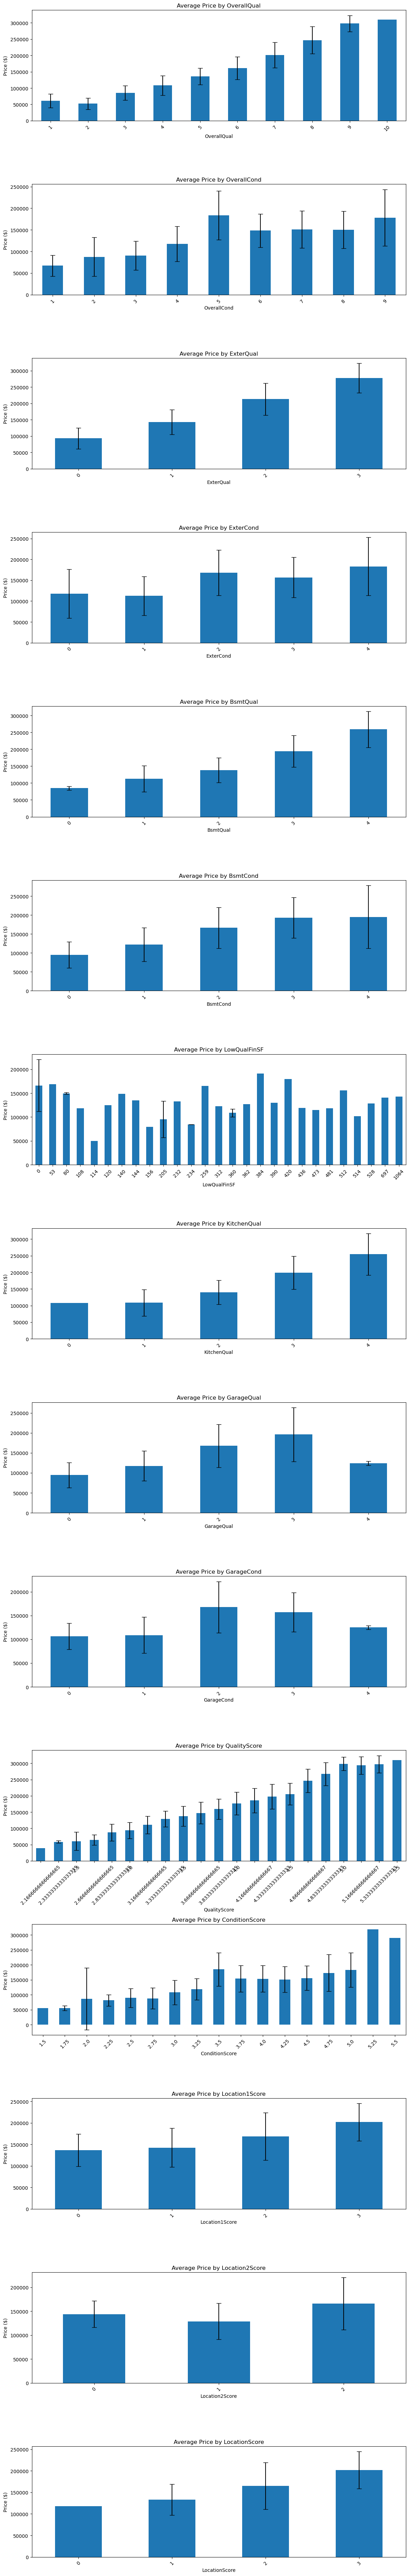

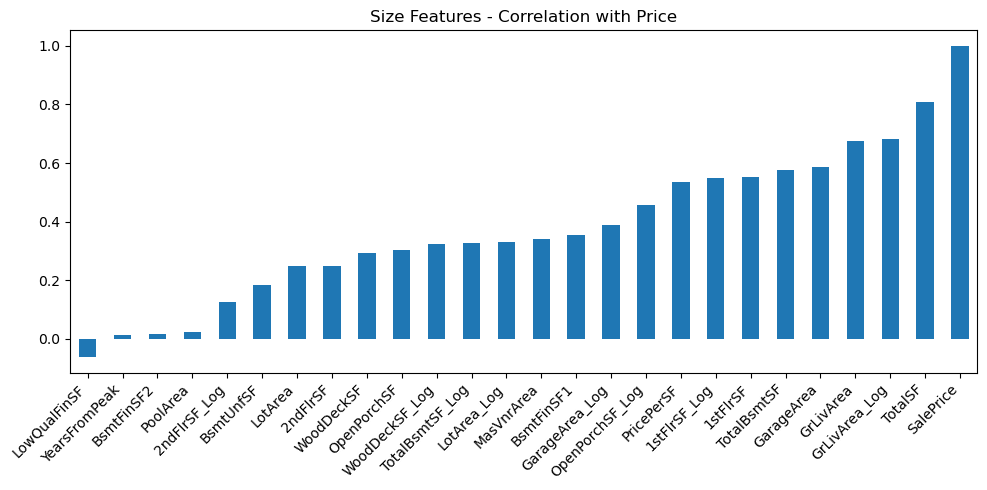

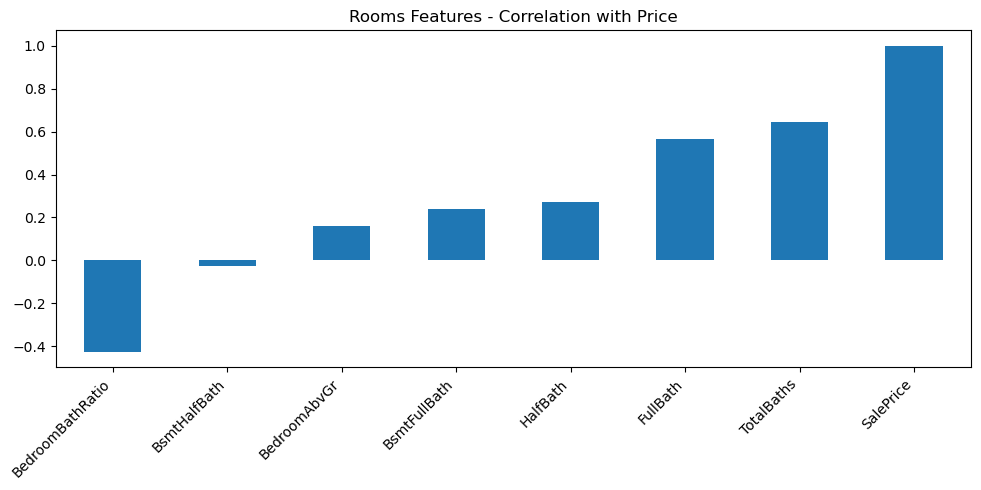

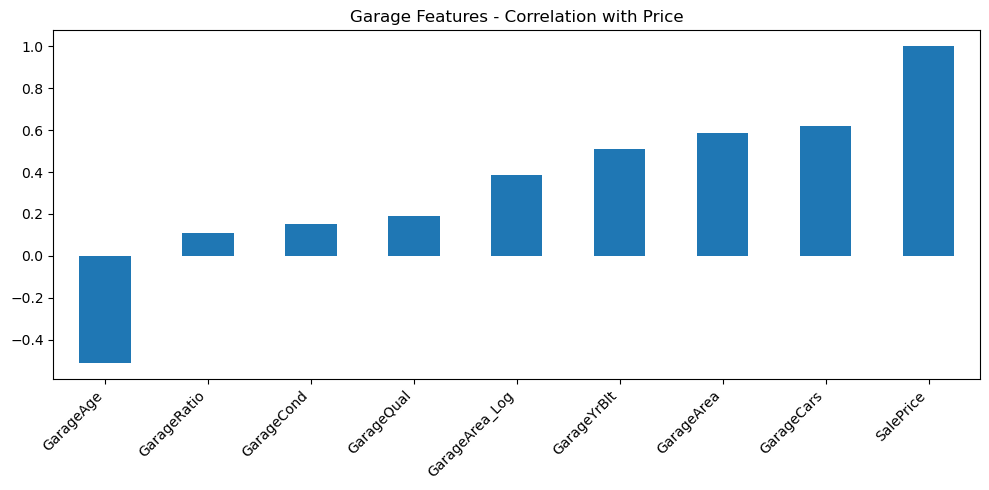

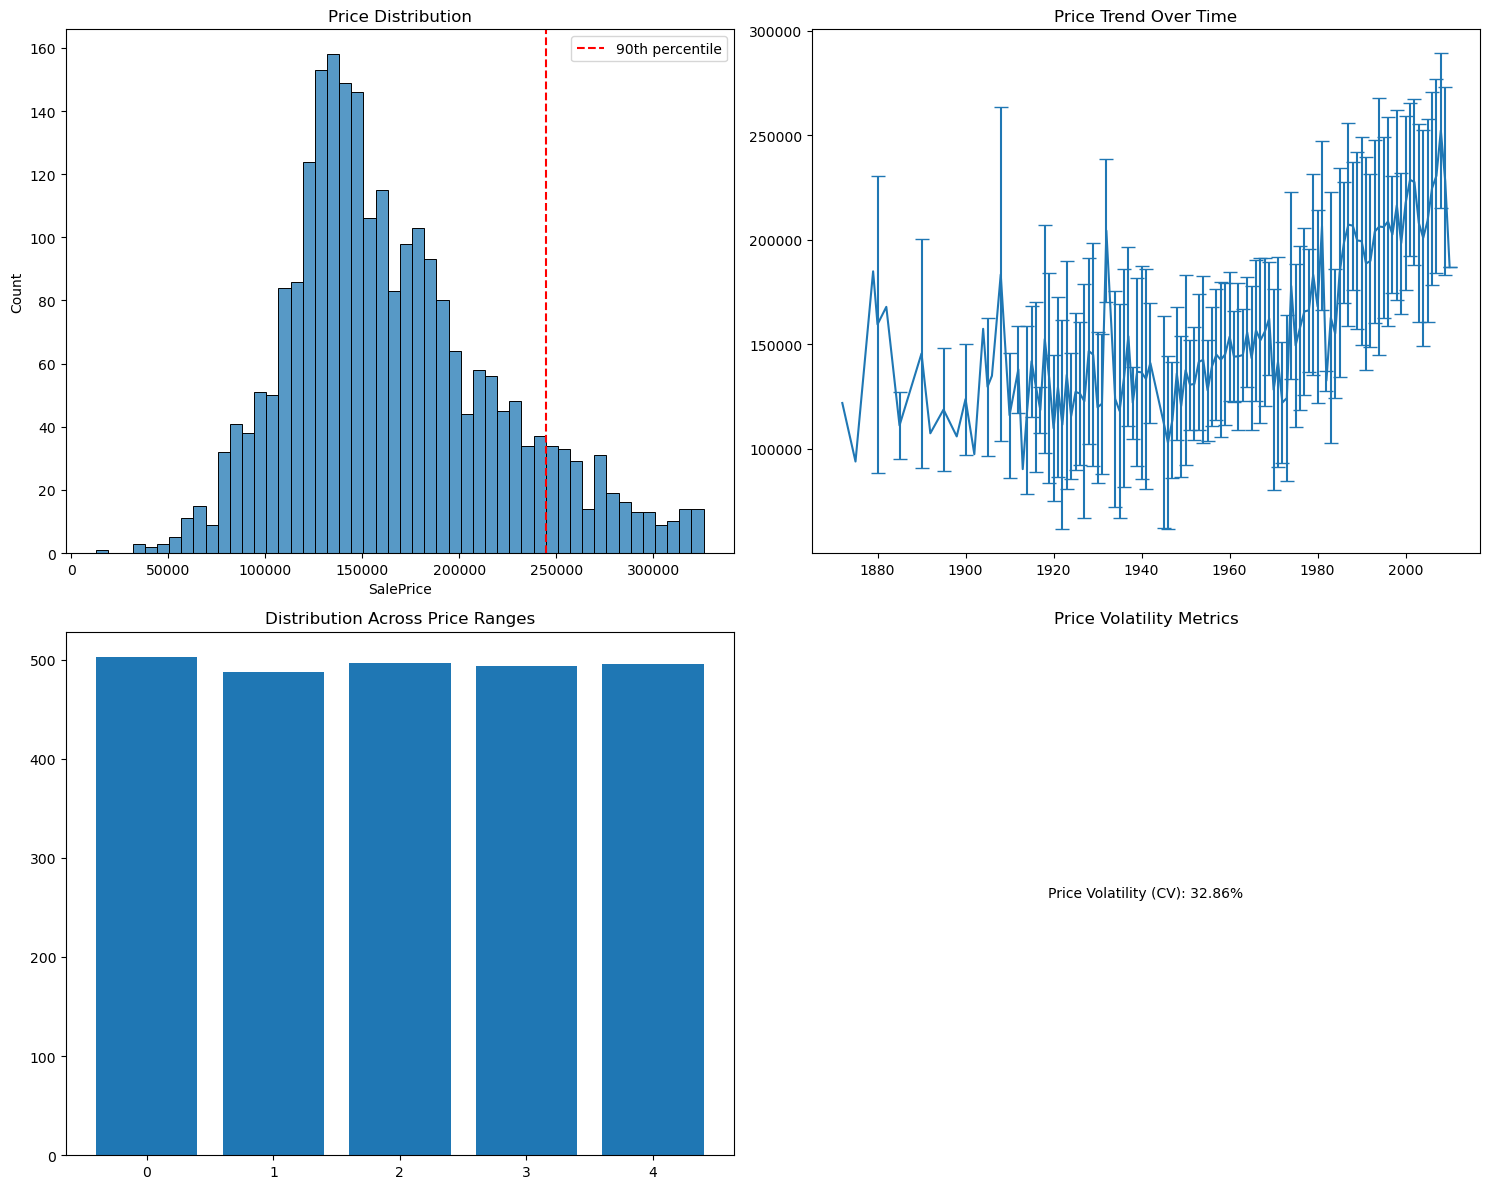

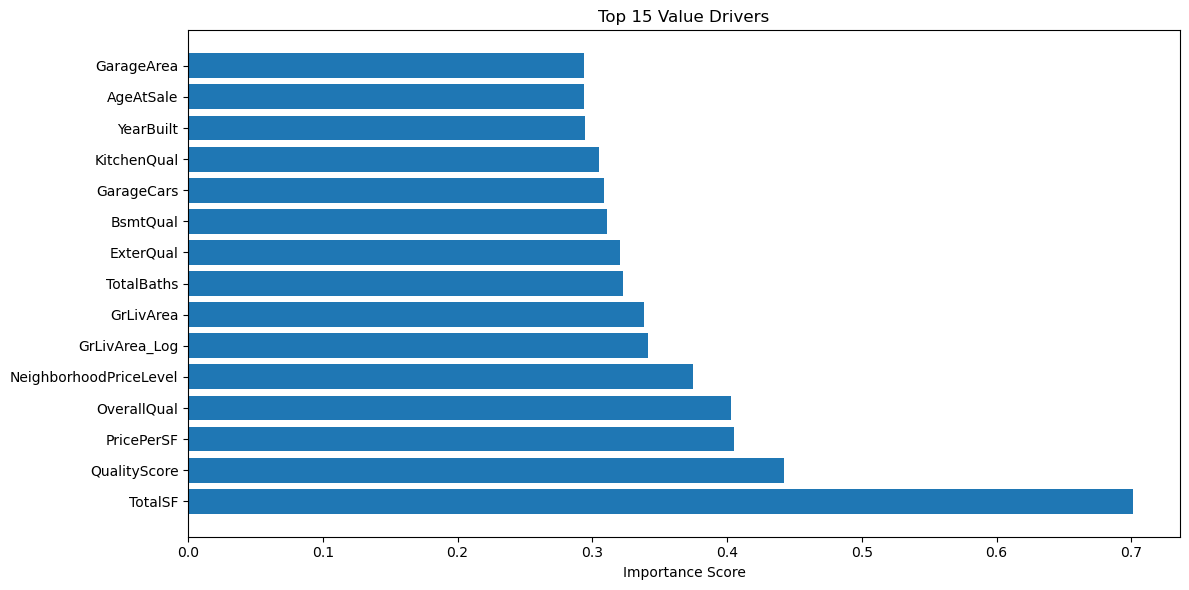

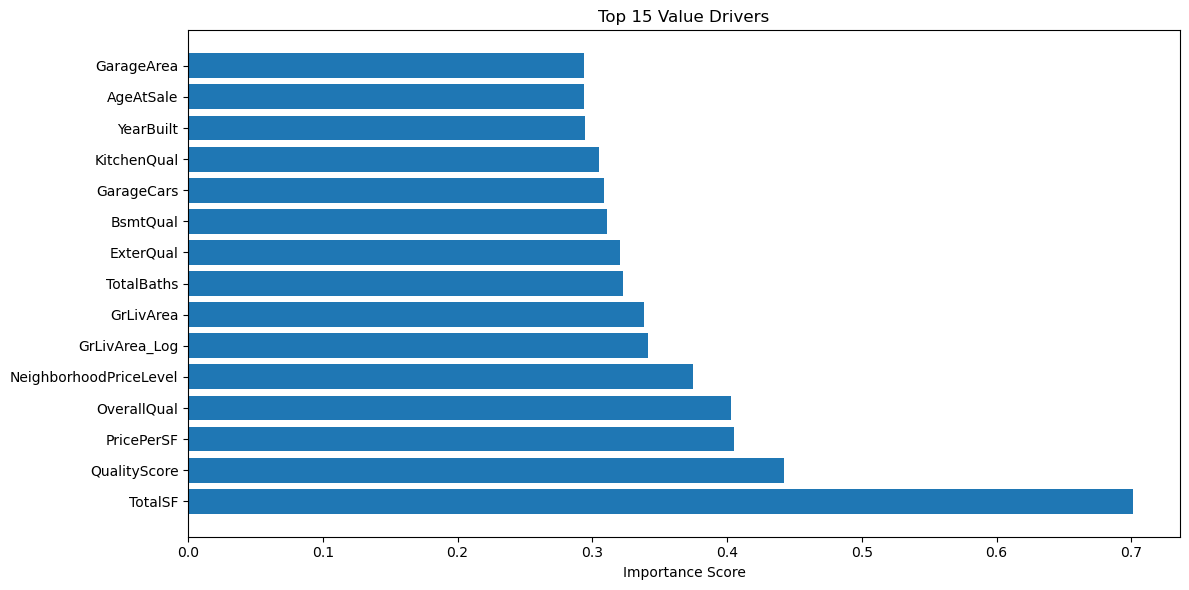

Selected 30 features for modeling


In [ ]:
# Initialize analyzer with your actual data
analyzer = AmesValueAnalyzer(engineered_data)

# Descriptive Analysis (40%)
quality_analysis = analyzer.analyze_quality_price_premium()  # Quality-Price Premium Analysis
config_analysis = analyzer.analyze_property_configuration()  # Property Configuration Analysis
market_constraints = analyzer.analyze_market_constraints()   # Market Constraint Analysis

# Feature Selection for Predictive Modeling (60%)
value_drivers = analyzer.identify_value_drivers()           # Identify key value drivers
final_features = analyzer.get_final_features()              # Get final feature set for modeling

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

class AmesPricePredictor:
    def __init__(self, data, features, target='SalePrice'):
        """Initialize the predictor with analyzed features"""
        self.data = data.copy()
        self.features = features
        self.target = target
        self.models = {}
        self.predictions = {}
        self.performance_metrics = {}
        
        print("\nBefore preprocessing:")
        print("Features with NaN:")
        print(self.data[features].isna().sum()[self.data[features].isna().sum() > 0])
        
        self.preprocess_data()
        
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42
        )
    
    def preprocess_data(self):
        """Preprocess the data by handling missing values and outliers"""
        X_data = self.data[self.features].copy()
        y_data = self.data[self.target].copy()
        
        print("\nBefore preprocessing:")
        print("X shape:", X_data.shape)
        print("y shape:", y_data.shape)
        print("NaN in X:", X_data.isna().sum().sum())
        print("NaN in y:", y_data.isna().sum())
        
        # Handle infinite values
        X_data = X_data.replace([np.inf, -np.inf], np.nan)
        
        # Handle extreme outliers
        for column in X_data.columns:
            if X_data[column].dtype in ['int64', 'float64']:
                upper_limit = X_data[column].quantile(0.99)
                X_data[column] = X_data[column].clip(upper=upper_limit)
        
        # Handle missing values
        imputer = SimpleImputer(strategy='median')
        X_imputed = imputer.fit_transform(X_data)
        self.X = pd.DataFrame(X_imputed, columns=self.features, index=self.data.index)
        
        # Handle target variable
        y_data = y_data.replace([np.inf, -np.inf], np.nan)
        upper_limit_y = y_data.quantile(0.99)
        y_data = y_data.clip(upper=upper_limit_y)
        self.y = y_data.fillna(y_data.median())
        
        print("\nAfter preprocessing:")
        print("NaN in X:", self.X.isna().sum().sum())
        print("NaN in y:", self.y.isna().sum())
        
        self.X = self.X.astype(float)
        self.y = self.y.astype(float)
        
        print("\nFinal verification:")
        print("X dtype:", self.X.dtypes.unique())
        print("y dtype:", self.y.dtype)
        print("NaN in X (final):", np.isnan(self.X.values).sum())
        print("NaN in y (final):", np.isnan(self.y.values).sum())
        print("Inf in X (final):", np.isinf(self.X.values).sum())
        print("Inf in y (final):", np.isinf(self.y.values).sum())

    def build_base_models(self):
        """Build and evaluate base models"""
        base_models = {
            'Linear': LinearRegression(),
            'Ridge': Ridge(alpha=1.0),
            'Lasso': Lasso(alpha=1.0),
            'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
            'GradientBoosting': GradientBoostingRegressor(random_state=42)
        }
        
        for name, model in base_models.items():
            print(f"\nTraining {name} model...")
            
            model.fit(self.X_train, self.y_train)
            
            train_pred = model.predict(self.X_train)
            test_pred = model.predict(self.X_test)
            
            self.models[name] = model
            self.predictions[name] = {
                'train': train_pred,
                'test': test_pred
            }
            
            self.performance_metrics[name] = {
                'train_r2': r2_score(self.y_train, train_pred),
                'test_r2': r2_score(self.y_test, test_pred),
                'train_rmse': np.sqrt(mean_squared_error(self.y_train, train_pred)),
                'test_rmse': np.sqrt(mean_squared_error(self.y_test, test_pred))
            }
            
            print(f"{name} model metrics:")
            print(f"Train R²: {self.performance_metrics[name]['train_r2']:.4f}")
            print(f"Test R²: {self.performance_metrics[name]['test_r2']:.4f}")
            print(f"Train RMSE: {self.performance_metrics[name]['train_rmse']:.4f}")
            print(f"Test RMSE: {self.performance_metrics[name]['test_rmse']:.4f}")
        
        self.plot_model_performance()
        return self.performance_metrics
    
    def plot_model_performance(self):
        """Visualize model performance comparisons"""
        performance_df = pd.DataFrame(self.performance_metrics).T
        
        plt.figure(figsize=(15, 6))
        
        plt.subplot(1, 2, 1)
        performance_df['test_rmse'].plot(kind='bar')
        plt.title('Test RMSE by Model')
        plt.xticks(rotation=45)
        plt.ylabel('RMSE')
        
        plt.subplot(1, 2, 2)
        performance_df['test_r2'].plot(kind='bar')
        plt.title('Test R² by Model')
        plt.xticks(rotation=45)
        plt.ylabel('R²')
        
        plt.tight_layout()
        plt.show()
        
        # Plot residuals for the best model
        best_model = max(self.performance_metrics.items(), 
                        key=lambda x: x[1]['test_r2'])[0]
        
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        plt.scatter(self.predictions[best_model]['test'], 
                   self.y_test - self.predictions[best_model]['test'])
        plt.axhline(y=0, color='r', linestyle='--')
        plt.xlabel('Predicted Values')
        plt.ylabel('Residuals')
        plt.title(f'Residual Plot for {best_model} Model')
        
        plt.subplot(1, 2, 2)
        plt.scatter(self.y_test, self.predictions[best_model]['test'])
        plt.plot([self.y_test.min(), self.y_test.max()], 
                 [self.y_test.min(), self.y_test.max()], 
                 'r--', lw=2)
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title(f'Actual vs Predicted for {best_model} Model')
        
        plt.tight_layout()
        plt.show()

    def get_feature_importance(self):
        """Get feature importance for tree-based models"""
        importance_dict = {}
        
        if 'RandomForest' in self.models:
            rf_importance = pd.DataFrame({
                'feature': self.features,
                'importance': self.models['RandomForest'].feature_importances_
            }).sort_values('importance', ascending=False)
            importance_dict['RandomForest'] = rf_importance
            
            plt.figure(figsize=(12, 6))
            plt.bar(rf_importance['feature'][:10], rf_importance['importance'][:10])
            plt.title('Top 10 Important Features (Random Forest)')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
        
        if 'GradientBoosting' in self.models:
            gb_importance = pd.DataFrame({
                'feature': self.features,
                'importance': self.models['GradientBoosting'].feature_importances_
            }).sort_values('importance', ascending=False)
            importance_dict['GradientBoosting'] = gb_importance
            
            plt.figure(figsize=(12, 6))
            plt.bar(gb_importance['feature'][:10], gb_importance['importance'][:10])
            plt.title('Top 10 Important Features (Gradient Boosting)')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
        
        return importance_dict


Before preprocessing:
Features with NaN:
RenovationAgeRatio    24
dtype: int64

Before preprocessing:
X shape: (2474, 30)
y shape: (2474,)
NaN in X: 24
NaN in y: 0

After preprocessing:
NaN in X: 0
NaN in y: 0

Final verification:
X dtype: [dtype('float64')]
y dtype: float64
NaN in X (final): 0
NaN in y (final): 0
Inf in X (final): 0
Inf in y (final): 0

Training Linear model...
Linear model metrics:
Train R²: 0.9781
Test R²: 0.9790
Train RMSE: 7998.7625
Test RMSE: 7971.2026

Training Ridge model...
Ridge model metrics:
Train R²: 0.9781
Test R²: 0.9791
Train RMSE: 7998.9058
Test RMSE: 7968.5033

Training Lasso model...
Lasso model metrics:
Train R²: 0.9781
Test R²: 0.9790
Train RMSE: 7998.8160
Test RMSE: 7969.6659

Training RandomForest model...
RandomForest model metrics:
Train R²: 0.9989
Test R²: 0.9950
Train RMSE: 1796.2755
Test RMSE: 3901.6132

Training GradientBoosting model...
GradientBoosting model metrics:
Train R²: 0.9972
Test R²: 0.9933
Train RMSE: 2872.8005
Test RMSE: 4506.

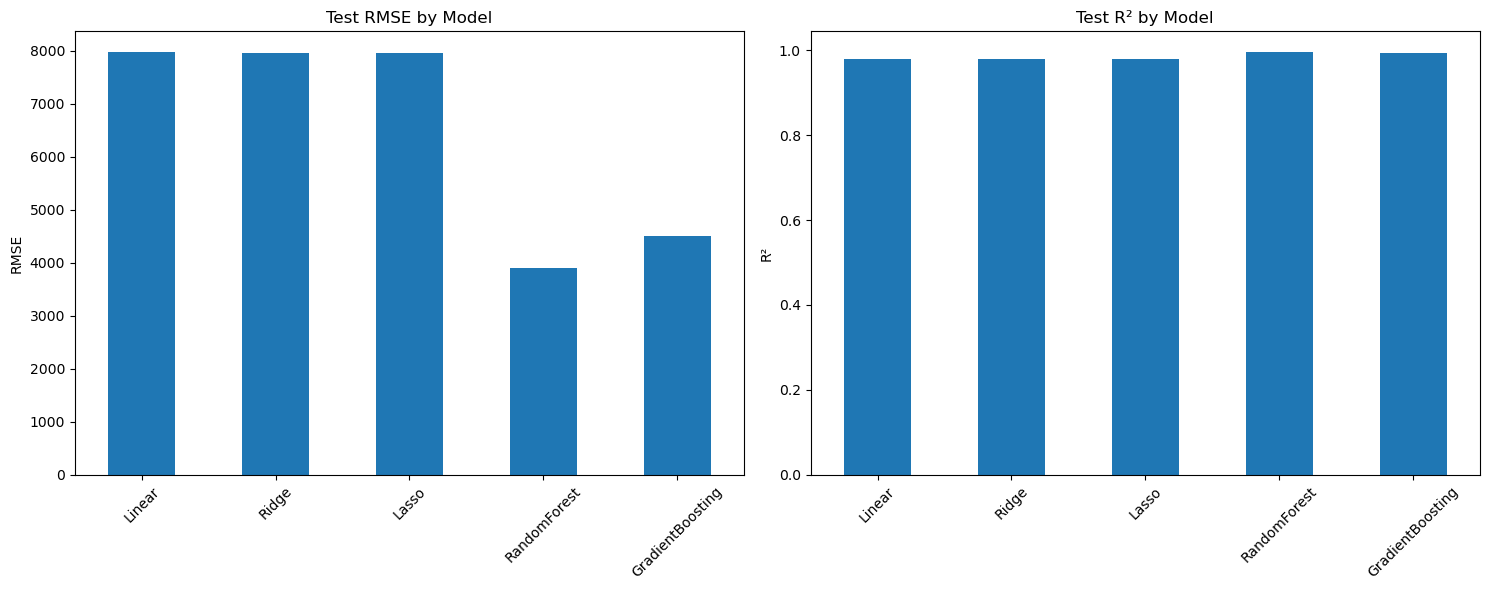

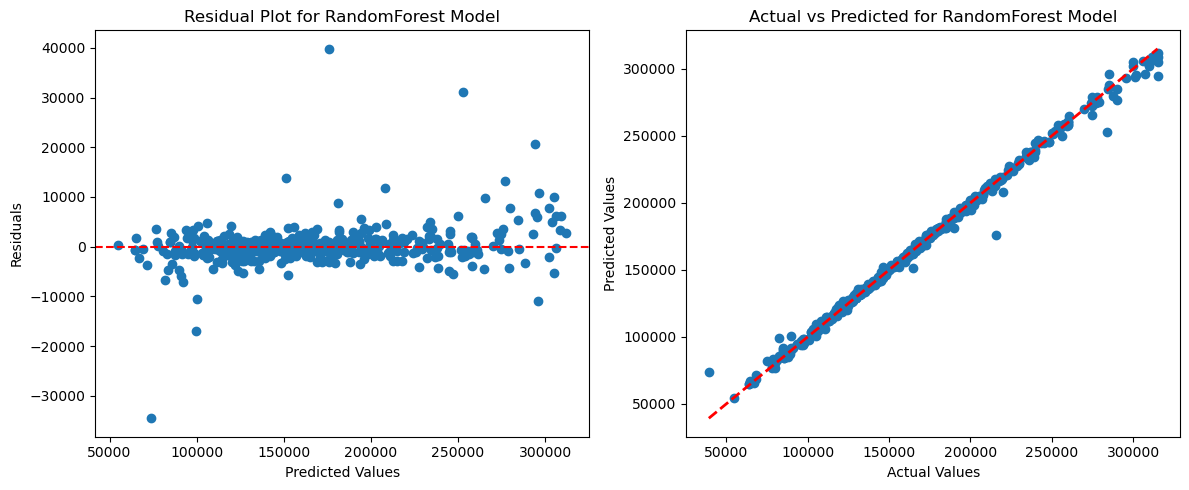

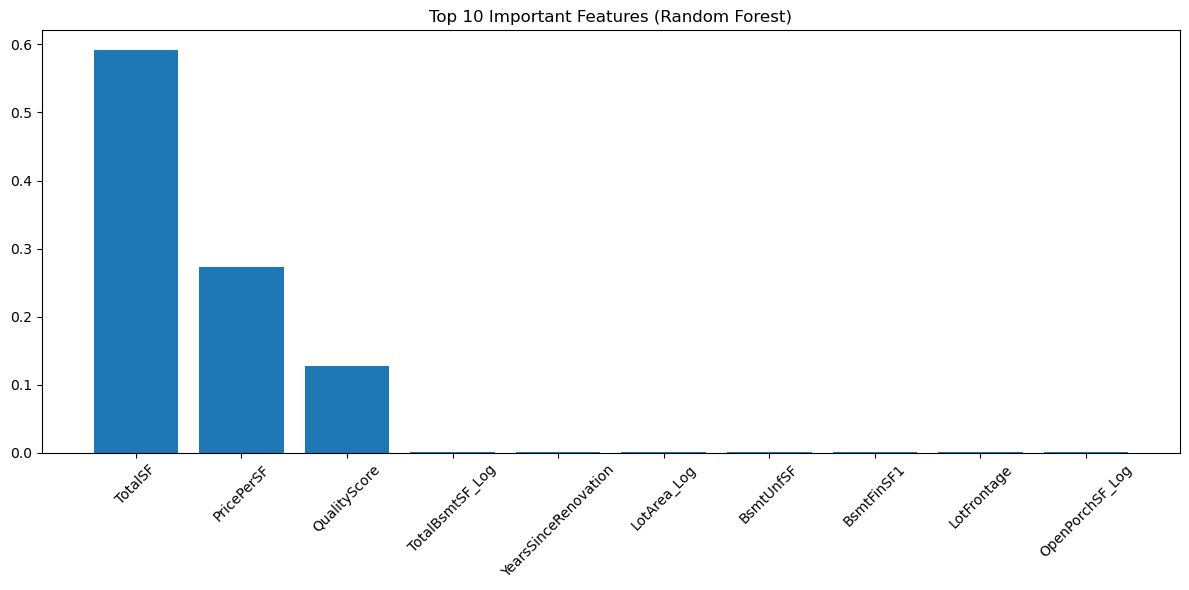

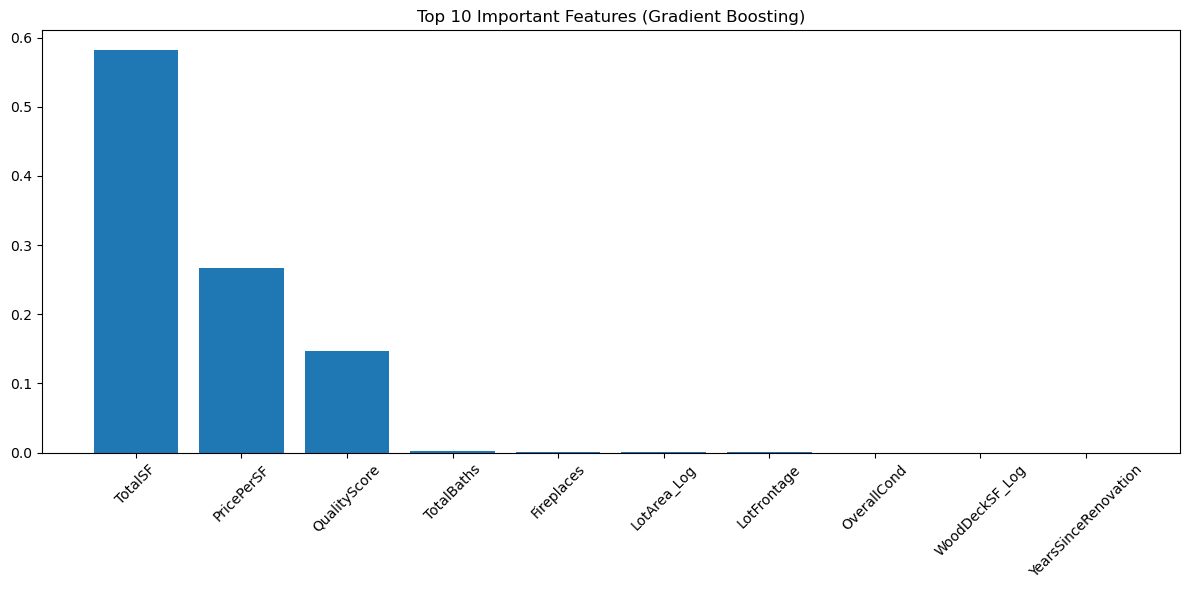

In [ ]:
# Initialize the predictor
predictor = AmesPricePredictor(data=engineered_data, features=final_features)

# Build and evaluate base models
base_performance = predictor.build_base_models()

# Get feature importance for tree-based models
feature_importance = predictor.get_feature_importance()

Initializing tuner...
Starting the tuning process (this will take several minutes)...
Starting hyperparameter tuning...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END m

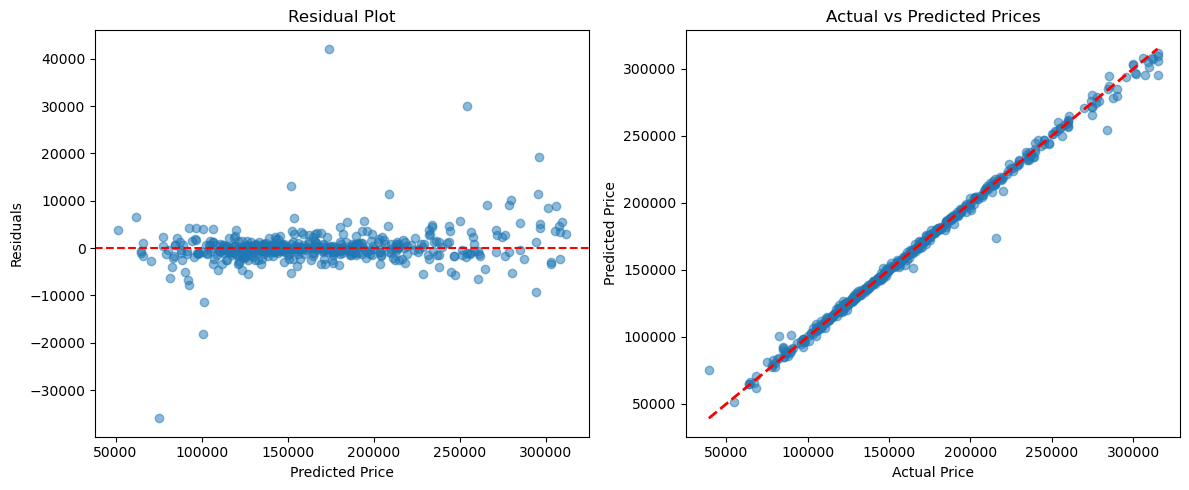

Creating feature importance plot...


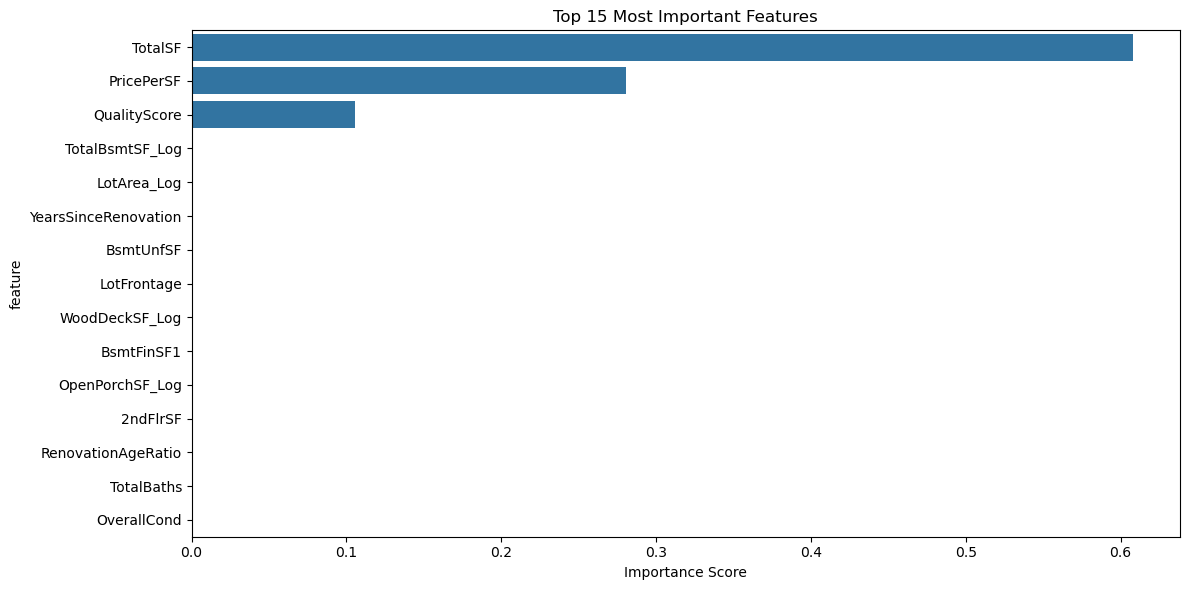

In [ ]:
# First make sure we have the imports
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the class
class RandomForestTuner:
    def __init__(self, X_train, X_test, y_train, y_test):
        """Initialize the tuner with training and test data"""
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.best_model = None
        self.cv_results = None
        
    def tune_hyperparameters(self):
        """Perform grid search to find best hyperparameters"""
        print("Starting hyperparameter tuning...")
        
        # Define parameter grid (smaller for faster execution)
        param_grid = {
            'n_estimators': [100, 200],      # Number of trees
            'max_depth': [10, 20, None],      # Maximum depth of trees
            'min_samples_split': [2, 5],      # Minimum samples required to split
            'min_samples_leaf': [1, 2]        # Minimum samples required at leaf node
        }
        
        # Initialize base model
        rf = RandomForestRegressor(random_state=42)
        
        # Perform grid search with cross-validation
        grid_search = GridSearchCV(
            estimator=rf,
            param_grid=param_grid,
            cv=5,
            n_jobs=-1,
            scoring='neg_root_mean_squared_error',
            verbose=2  # Increased verbosity to see progress
        )
        
        # Fit grid search
        grid_search.fit(self.X_train, self.y_train)
        
        # Store results
        self.best_model = grid_search.best_estimator_
        self.cv_results = pd.DataFrame(grid_search.cv_results_)
        
        # Print best parameters and score
        print("\nBest parameters found:")
        print(grid_search.best_params_)
        print(f"Best cross-validation RMSE: {-grid_search.best_score_:,.2f}")
        
        return self.best_model
    
    def evaluate_best_model(self):
        """Evaluate the best model's performance"""
        if self.best_model is None:
            print("Please run tune_hyperparameters() first!")
            return
        
        # Make predictions
        train_pred = self.best_model.predict(self.X_train)
        test_pred = self.best_model.predict(self.X_test)
        
        # Calculate metrics
        metrics = {
            'train_r2': r2_score(self.y_train, train_pred),
            'test_r2': r2_score(self.y_test, test_pred),
            'train_rmse': np.sqrt(mean_squared_error(self.y_train, train_pred)),
            'test_rmse': np.sqrt(mean_squared_error(self.y_test, test_pred))
        }
        
        print("\nBest Model Performance:")
        print(f"Train R²: {metrics['train_r2']:.4f}")
        print(f"Test R²: {metrics['test_r2']:.4f}")
        print(f"Train RMSE: ${metrics['train_rmse']:,.2f}")
        print(f"Test RMSE: ${metrics['test_rmse']:,.2f}")
        
        # Plot actual vs predicted
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        plt.scatter(test_pred, self.y_test - test_pred, alpha=0.5)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.xlabel('Predicted Price')
        plt.ylabel('Residuals')
        plt.title('Residual Plot')
        
        plt.subplot(1, 2, 2)
        plt.scatter(self.y_test, test_pred, alpha=0.5)
        plt.plot([self.y_test.min(), self.y_test.max()], 
                 [self.y_test.min(), self.y_test.max()], 
                 'r--', lw=2)
        plt.xlabel('Actual Price')
        plt.ylabel('Predicted Price')
        plt.title('Actual vs Predicted Prices')
        
        plt.tight_layout()
        plt.show()
        
        return metrics
    
    def plot_feature_importance(self, feature_names):
        """Plot feature importance of the best model"""
        if self.best_model is None:
            print("Please run tune_hyperparameters() first!")
            return
        
        # Get feature importance
        importance = pd.DataFrame({
            'feature': feature_names,
            'importance': self.best_model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        # Plot top 15 features
        plt.figure(figsize=(12, 6))
        sns.barplot(data=importance.head(15), x='importance', y='feature')
        plt.title('Top 15 Most Important Features')
        plt.xlabel('Importance Score')
        plt.tight_layout()
        plt.show()
        
        return importance

# Now actually run the tuning process
print("Initializing tuner...")
tuner = RandomForestTuner(predictor.X_train, predictor.X_test, predictor.y_train, predictor.y_test)

print("Starting the tuning process (this will take several minutes)...")
best_rf_model = tuner.tune_hyperparameters()

print("Evaluating the tuned model...")
performance_metrics = tuner.evaluate_best_model()

print("Creating feature importance plot...")
feature_importance = tuner.plot_feature_importance(predictor.features)

In [49]:
# First verify we can read the real estate data file
import pandas as pd

print("Checking real estate data file:")
try:
    real_estate_data = pd.read_csv('Ames Real Estate Data', encoding='latin1')
    print("\nSuccessfully loaded!")
    print(f"Shape: {real_estate_data.shape}")
    print("\nColumns:")
    print(real_estate_data.columns.tolist())
    print("\nFirst few rows:")
    print(real_estate_data.head())
except Exception as e:
    print(f"Error: {e}")

# If that works, let's use our updated preprocessor
class AmesDataPreprocessor:
    def __init__(self):
        self.outliers_dict = {}
        self.missing_summary = None
        self.standardization_params = {}
    
        # File paths
        self.housing_path = "Ames_Housing_Price_Data.csv"
        self.real_estate_path = "Ames Real Estate Data"
    
    def load_and_merge_data(self):
        try:
            self.housing_data = pd.read_csv(self.housing_path)
            self.real_estate = pd.read_csv(self.real_estate_path, encoding='latin1')
            
            print(f"Housing data shape: {self.housing_data.shape}")
            print(f"Real estate data shape: {self.real_estate.shape}")
            
            # Merge datasets
            self.data = pd.merge(
                self.housing_data,
                self.real_estate[['MapRefNo', 'Prop_Addr']],
                left_on='PID',
                right_on='MapRefNo',
                how='left'
            )
            
            print(f"Merged data shape: {self.data.shape}")
            return self.data
            
        except Exception as e:
            print(f"Error: {e}")
            return None

# Try loading with the preprocessor
print("\nTrying with preprocessor:")
preprocessor = AmesDataPreprocessor()
data = preprocessor.load_and_merge_data()

Checking real estate data file:

Successfully loaded!
Shape: (1, 1)

Columns:
['book']

First few rows:
   book
0   NaN

Trying with preprocessor:
Housing data shape: (2580, 82)
Real estate data shape: (1, 1)
Error: "None of [Index(['MapRefNo', 'Prop_Addr'], dtype='object')] are in the [columns]"


Checking file paths...
Checking /Users/jorgemartinez/Documents/NYDSA #3 Machine Learning Project/Machine Learning Project Proposal-Jorge Final Version from NYCDSA/Ames_HousePrice.csv
File exists: True
Checking /Users/jorgemartinez/Documents/NYDSA #3 Machine Learning Project/Machine Learning Project Proposal-Jorge Final Version from NYCDSA/Ames Real Estate Data.csv
File exists: True
Successfully loaded:
Housing data shape: (2580, 82)
Real estate data shape: (22213, 91)
Merged data shape: (2624, 84)

Analyzing Price Ceilings...


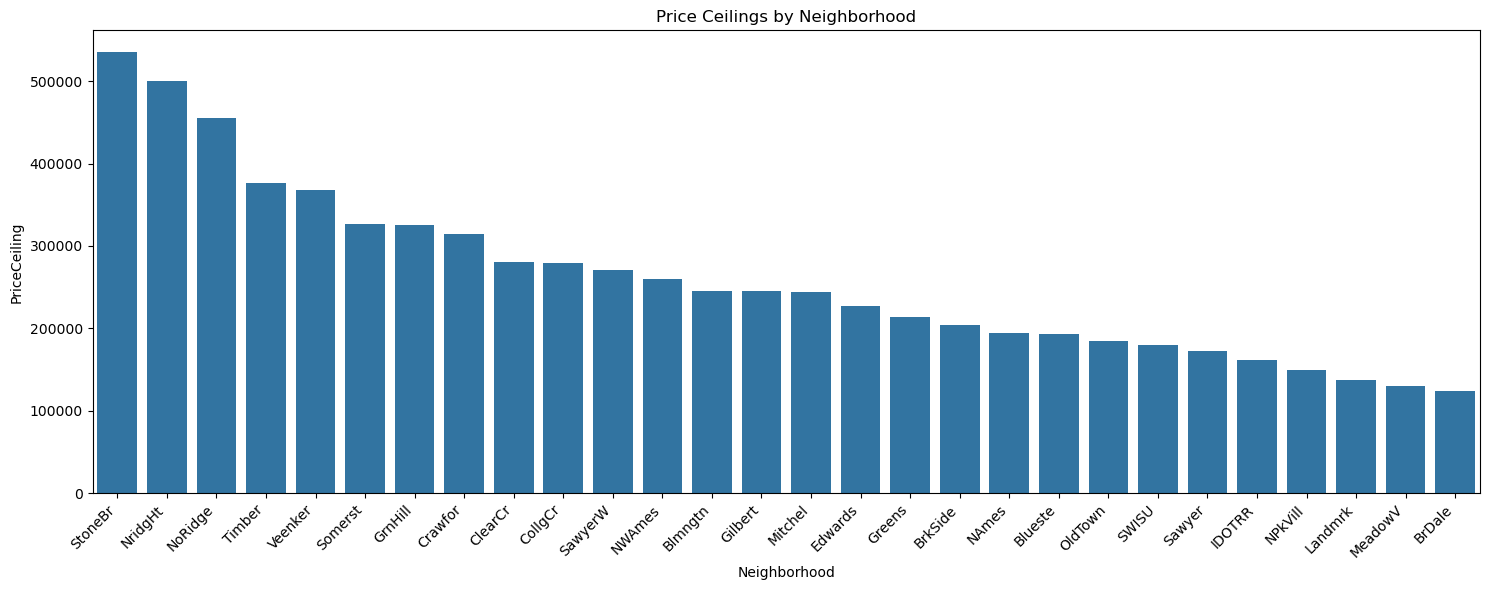


Analyzing Seasonal Patterns...


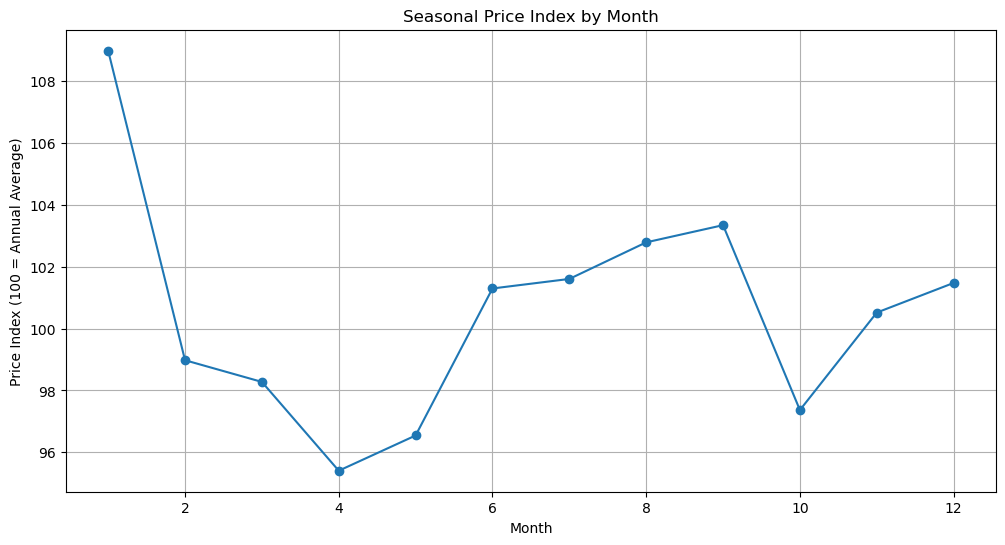


Seasonal Analysis Results:
Peak Month: 1
Trough Month: 4
Seasonal Variation: 3.65

Analyzing Recession Impact...

Recession Impact Summary:
Price Drop: 3.5%
Volume Change: 179.9%
Volatility Change: -1.3%

Generating Full Report...

Key Market Constraints Summary:
Overall Market Price Ceiling: $755,000.00

Most Constrained Neighborhoods:
StoneBr: Ceiling/Mean Ratio = 1.74
Edwards: Ceiling/Mean Ratio = 1.71
BrkSide: Ceiling/Mean Ratio = 1.62
NridgHt: Ceiling/Mean Ratio = 1.57
Crawfor: Ceiling/Mean Ratio = 1.56


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import QuantileRegressor
import os

# First check if files exist
paths = [
    "/Users/jorgemartinez/Documents/NYDSA #3 Machine Learning Project/Machine Learning Project Proposal-Jorge Final Version from NYCDSA/Ames_HousePrice.csv",
    "/Users/jorgemartinez/Documents/NYDSA #3 Machine Learning Project/Machine Learning Project Proposal-Jorge Final Version from NYCDSA/Ames Real Estate Data.csv"
]

print("Checking file paths...")
for path in paths:
    print(f"Checking {path}")
    print(f"File exists: {os.path.exists(path)}")

class AmesDataPreprocessor:
    def __init__(self):
        self.outliers_dict = {}
        self.missing_summary = None
        self.standardization_params = {}
    
        # Updated file paths
        self.housing_path = "/Users/jorgemartinez/Documents/NYDSA #3 Machine Learning Project/Machine Learning Project Proposal-Jorge Final Version from NYCDSA/Ames_HousePrice.csv"
        self.real_estate_path = "/Users/jorgemartinez/Documents/NYDSA #3 Machine Learning Project/Machine Learning Project Proposal-Jorge Final Version from NYCDSA/Ames Real Estate Data.csv"
   
    def load_and_merge_data(self):
        """Load and merge both Ames datasets"""
        try:
            self.housing_data = pd.read_csv(self.housing_path)
            self.real_estate = pd.read_csv(self.real_estate_path, low_memory=False)
            
            print(f"Successfully loaded:\nHousing data shape: {self.housing_data.shape}")
            print(f"Real estate data shape: {self.real_estate.shape}")
            
            # Merge datasets
            self.data = pd.merge(
                self.housing_data,
                self.real_estate[['MapRefNo', 'Prop_Addr']],
                left_on='PID',
                right_on='MapRefNo',
                how='left'
            )
            
            print(f"Merged data shape: {self.data.shape}")
            return self.data
            
        except FileNotFoundError as e:
            print(f"Error loading files: {e}")
            return None
        
    def handle_missing_values(self, df):
        """Impute missing values and track changes"""
        df = df.copy()
        missing_data = {
            'column': [],
            'missing_count': [],
            'imputation_method': []
        }
        
        # Handle categorical variables with mode
        for col in df.select_dtypes(include=['object']):
            if df[col].isnull().any():
                mode_val = df[col].mode()[0]
                df[col] = df[col].fillna(mode_val)
                missing_data['column'].append(col)
                missing_data['missing_count'].append(df[col].isnull().sum())
                missing_data['imputation_method'].append('mode')
                
        # Handle numeric variables
        for col in df.select_dtypes(include=['float64', 'int64']):
            if df[col].isnull().any():
                if 'Qual' in col or 'Cond' in col:
                    df[col] = df[col].fillna(df[col].mode()[0])
                    method = 'mode'
                else:
                    df[col] = df[col].fillna(df[col].median())
                    method = 'median'
                    
                missing_data['column'].append(col)
                missing_data['missing_count'].append(df[col].isnull().sum())
                missing_data['imputation_method'].append(method)
        
        self.missing_summary = pd.DataFrame(missing_data)
        return df

    def detect_outliers(self, df):
        """Identify outliers using IQR method"""
        self.data = df  # Store the data for plotting
        for column in df.select_dtypes(include=['float64', 'int64']):
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers = df[(df[column] < lower_bound) | 
                         (df[column] > upper_bound)][column]
            
            if not outliers.empty:
                self.outliers_dict[column] = {
                    'outliers': outliers,
                    'bounds': (lower_bound, upper_bound),
                    'count': len(outliers)
                }

class AmesMarketConstraintAnalyzer:
    def __init__(self, df):
        """
        Initialize with preprocessed Ames housing dataset
        
        Parameters:
        df (pandas.DataFrame): Preprocessed Ames housing data
        """
        self.df = df.copy()
        self.df['SaleDate'] = pd.to_datetime(
            self.df['YrSold'].astype(str) + '-' + 
            self.df['MoSold'].astype(str) + '-01'
        )
        
    def detect_price_ceilings(self, quantile=0.95):
        """Detect price ceilings by neighborhood using high quantile regression"""
        results = []
        
        for neighborhood in self.df['Neighborhood'].unique():
            nbhd_data = self.df[self.df['Neighborhood'] == neighborhood]
            
            # Calculate metrics
            ceiling_price = nbhd_data['SalePrice'].quantile(0.95)
            mean_price = nbhd_data['SalePrice'].mean()
            price_range = ceiling_price - nbhd_data['SalePrice'].min()
            n_sales = len(nbhd_data)
            
            results.append({
                'Neighborhood': neighborhood,
                'PriceCeiling': ceiling_price,
                'MeanPrice': mean_price,
                'PriceRange': price_range,
                'NumSales': n_sales,
                'CeilingToMeanRatio': ceiling_price / mean_price
            })
            
        return pd.DataFrame(results)
    
    def analyze_seasonal_patterns(self):
        """Analyze seasonal price variations and sales volume patterns"""
        # Calculate monthly price indices
        monthly_stats = self.df.groupby('MoSold').agg({
            'SalePrice': ['mean', 'median', 'count', 'std']
        }).round(2)
        
        # Normalize to create seasonal indices
        yearly_mean = self.df['SalePrice'].mean()
        monthly_stats[('SalePrice', 'index')] = (
            monthly_stats[('SalePrice', 'mean')] / yearly_mean * 100
        )
        
        # Calculate seasonal volume patterns
        total_sales = self.df.shape[0]
        monthly_stats[('SalePrice', 'volume_share')] = (
            monthly_stats[('SalePrice', 'count')] / total_sales * 100
        )
        
        return {
            'monthly_stats': monthly_stats,
            'peak_month': monthly_stats[('SalePrice', 'index')].idxmax(),
            'trough_month': monthly_stats[('SalePrice', 'index')].idxmin(),
            'seasonal_variation': monthly_stats[('SalePrice', 'index')].std()
        }
    
    def analyze_recession_impact(self, recession_start='2007-01-01', 
                               recession_end='2009-06-30'):
        """Analyze housing market changes during the recession period"""
        # Define periods
        pre_recession = self.df['SaleDate'] < recession_start
        during_recession = (self.df['SaleDate'] >= recession_start) & \
                         (self.df['SaleDate'] <= recession_end)
        post_recession = self.df['SaleDate'] > recession_end
        
        # Calculate period metrics
        metrics = {}
        
        for period, mask in [('pre', pre_recession), 
                           ('during', during_recession),
                           ('post', post_recession)]:
            period_data = self.df[mask]
            
            metrics[period] = {
                'median_price': period_data['SalePrice'].median(),
                'mean_price': period_data['SalePrice'].mean(),
                'sales_volume': len(period_data),
                'price_volatility': period_data['SalePrice'].std()
            }
        
        # Calculate impact metrics
        impact_metrics = {
            'price_drop_pct': ((metrics['during']['median_price'] - 
                               metrics['pre']['median_price']) / 
                              metrics['pre']['median_price'] * 100),
            'volume_change_pct': ((metrics['during']['sales_volume'] - 
                                  metrics['pre']['sales_volume']) / 
                                 metrics['pre']['sales_volume'] * 100),
            'volatility_change_pct': ((metrics['during']['price_volatility'] - 
                                      metrics['pre']['price_volatility']) / 
                                     metrics['pre']['price_volatility'] * 100)
        }
        
        return {
            'period_metrics': metrics,
            'impact_metrics': impact_metrics
        }
    
    def generate_constraint_report(self):
        """Generate a comprehensive market constraint analysis report"""
        price_ceilings = self.detect_price_ceilings()
        seasonal_patterns = self.analyze_seasonal_patterns()
        recession_impact = self.analyze_recession_impact()
        
        # Identify most constrained neighborhoods
        constrained_neighborhoods = price_ceilings.nlargest(
            5, 'CeilingToMeanRatio'
        )
        
        return {
            'price_ceilings': price_ceilings,
            'seasonal_patterns': seasonal_patterns,
            'recession_impact': recession_impact,
            'most_constrained_areas': constrained_neighborhoods,
            'market_summary': {
                'overall_price_ceiling': self.df['SalePrice'].max(),
                'seasonal_variation': seasonal_patterns['seasonal_variation'],
                'recession_price_impact': recession_impact['impact_metrics']['price_drop_pct']
            }
        }

# Main execution
if __name__ == "__main__":
    # Initialize and load data using preprocessor
    preprocessor = AmesDataPreprocessor()
    data = preprocessor.load_and_merge_data()

    if data is not None:
        # Handle missing values
        data = preprocessor.handle_missing_values(data)
        preprocessor.detect_outliers(data)

        # Initialize the analyzer with preprocessed data
        analyzer = AmesMarketConstraintAnalyzer(data)

        # 1. Price Ceiling Analysis
        print("\nAnalyzing Price Ceilings...")
        price_ceilings = analyzer.detect_price_ceilings()

        # Visualize price ceilings by neighborhood
        plt.figure(figsize=(15, 6))
        sns.barplot(data=price_ceilings.sort_values('PriceCeiling', ascending=False),
                    x='Neighborhood', y='PriceCeiling')
        plt.xticks(rotation=45, ha='right')
        plt.title('Price Ceilings by Neighborhood')
        plt.tight_layout()
        plt.show()

        # 2. Seasonal Patterns
        print("\nAnalyzing Seasonal Patterns...")
        seasonal_results = analyzer.analyze_seasonal_patterns()
        monthly_stats = seasonal_results['monthly_stats']

        # Plot seasonal price indices
        plt.figure(figsize=(12, 6))
        plt.plot(range(1, 13), monthly_stats[('SalePrice', 'index')], marker='o')
        plt.title('Seasonal Price Index by Month')
        plt.xlabel('Month')
        plt.ylabel('Price Index (100 = Annual Average)')
        plt.grid(True)
        plt.show()

        # Print key seasonal findings
        print("\nSeasonal Analysis Results:")
        print(f"Peak Month: {seasonal_results['peak_month']}")
        print(f"Trough Month: {seasonal_results['trough_month']}")
        print(f"Seasonal Variation: {seasonal_results['seasonal_variation']:.2f}")

        # 3. Recession Impact
        print("\nAnalyzing Recession Impact...")
        recession_results = analyzer.analyze_recession_impact()
        print("\nRecession Impact Summary:")
        print(f"Price Drop: {recession_results['impact_metrics']['price_drop_pct']:.1f}%")
        print(f"Volume Change: {recession_results['impact_metrics']['volume_change_pct']:.1f}%")
        print(f"Volatility Change: {recession_results['impact_metrics']['volatility_change_pct']:.1f}%")

        # Generate full report
        print("\nGenerating Full Report...")
        full_report = analyzer.generate_constraint_report()
        print("\nKey Market Constraints Summary:")
        print(f"Overall Market Price Ceiling: ${full_report['market_summary']['overall_price_ceiling']:,.2f}")
        print("\nMost Constrained Neighborhoods:")
        for idx, row in full_report['most_constrained_areas'].iterrows():
            print(f"{row['Neighborhood']}: Ceiling/Mean Ratio = {row['CeilingToMeanRatio']:.2f}")
    else:
        print("Failed to load data. Please check file paths.")

Successfully loaded:
Housing data shape: (2580, 82)
Real estate data shape: (22213, 91)
Merged data shape: (2624, 84)

Initializing Location Analysis...
Location metrics calculated. Sample of results:

Distance from ISU statistics:
count    2624.000000
mean        2.480983
std         0.594780
min         1.200000
25%         2.500000
50%         2.500000
75%         2.500000
max         4.500000
Name: ISU_Distance, dtype: float64

Density statistics:
count    2624.000000
mean        0.184246
std         0.119539
min         0.009459
25%         0.117939
50%         0.155469
75%         0.201336
max         1.043403
Name: Density, dtype: float64

Potential student rentals identified: 0

Generating Location Analysis Report...


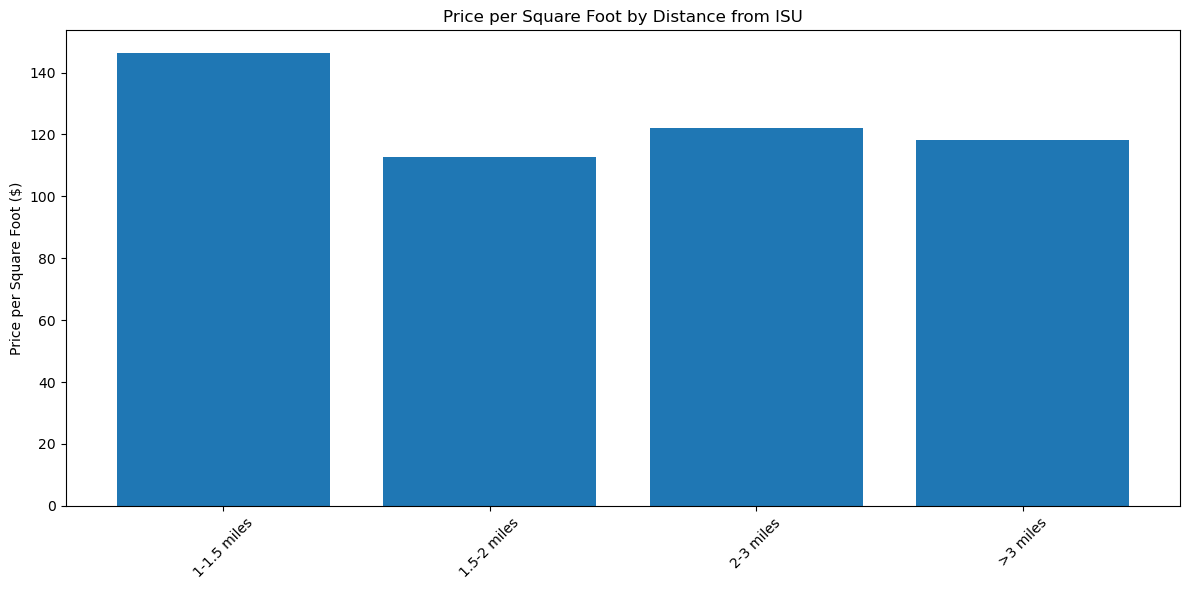

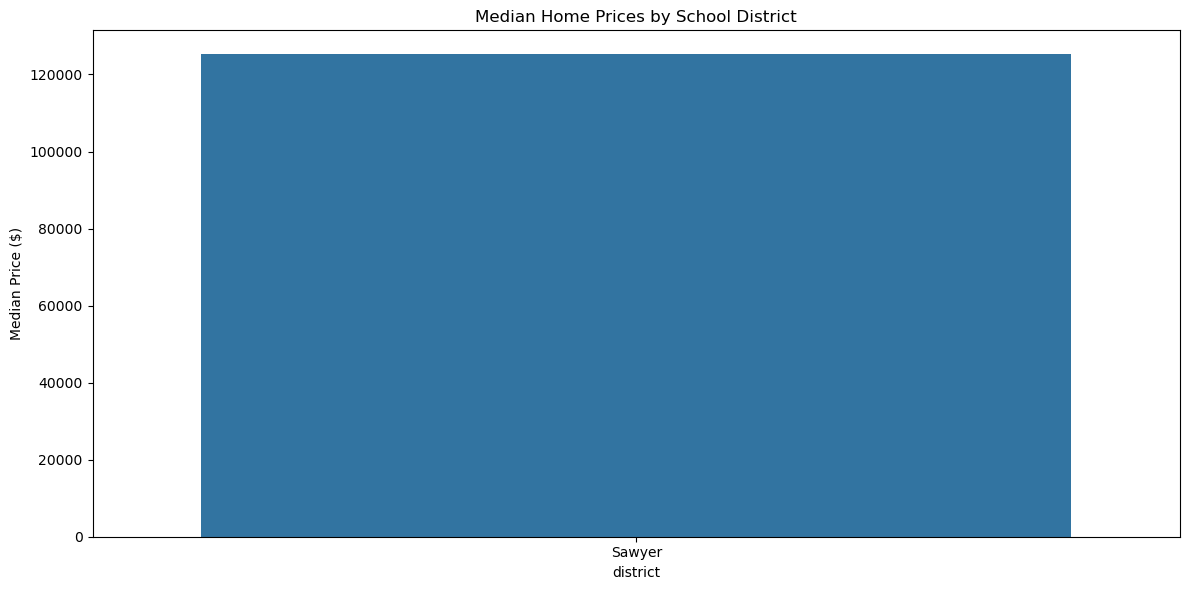

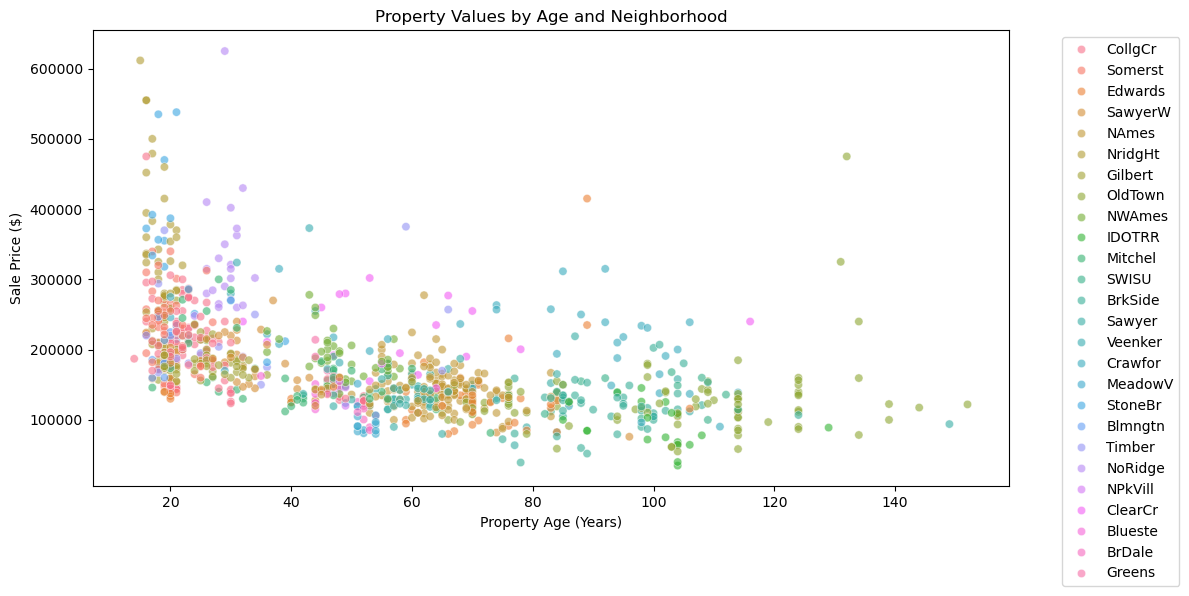


Location Analysis Summary:
ISU Proximity Premium: 23.9%
Top School District: Sawyer
Fastest Developing Area: SWISU


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

class AmesLocationAnalyzer:
    def __init__(self, df):
        """Initialize with preprocessed Ames housing dataset"""
        self.df = df.copy()
        
        # Map neighborhoods to approximate distances from ISU (in miles)
        self.neighborhood_distances = {
            'IOWA DOT/GAME': 3.5,
            'Bloomington Heights': 2.8,
            'Bluestem': 3.2,
            'Briardale': 2.5,
            'Brookside': 1.8,
            'Clear Creek': 3.0,
            'College Creek': 0.5,
            'Crawford': 2.2,
            'Edwards': 1.5,
            'Gilbert': 4.5,
            'Green Hills': 3.8,
            'Iowa DOT and Rail Road': 3.5,
            'Landmark': 2.0,
            'Meadow Village': 3.2,
            'Mitchell': 1.2,
            'North Ames': 2.5,
            'Northpark Villa': 3.0,
            'Northridge': 2.8,
            'Northridge Heights': 2.8,
            'Northwest Ames': 2.0,
            'Old Town': 1.0,
            'South & West of Iowa State University': 0.8,
            'Sawyer': 1.5,
            'Sawyer West': 1.8,
            'Somerset': 2.5,
            'Stone Brook': 3.0,
            'Timberland': 3.2,
            'Veenker': 1.2
        }
        
        # Define key Ames school districts and their approximate boundaries
        self.school_districts = {
            'Fellows': ['North_Ames', 'College_Creek'],
            'Sawyer': ['Old_Town', 'Edwards'],
            'Meeker': ['Northwest_Ames', 'Somerset'],
            'Mitchell': ['Brookside', 'Crawford']
        }
        
        # Calculate additional location metrics
        self._calculate_location_metrics()
    
    def _calculate_location_metrics(self):
        """Calculate additional location-based metrics"""
        # Calculate ISU distance for each property
        self.df['ISU_Distance'] = self.df['Neighborhood'].map(self.neighborhood_distances)
        
        # Fill any missing distances with median
        median_distance = np.median(list(self.neighborhood_distances.values()))
        self.df['ISU_Distance'] = self.df['ISU_Distance'].fillna(median_distance)
        
        # Calculate density metrics
        self.df['Density'] = self.df['GrLivArea'] / self.df['LotArea']
        
        # Identify potential student rentals (close to campus, smaller homes)
        self.df['student_rental'] = ((self.df['ISU_Distance'] <= 1.0) & 
                                   (self.df['BldgType'].isin(['1Fam', '2fmCon'])) & 
                                   (self.df['GrLivArea'] < 2000)).astype(int)
        
        # Calculate age-related metrics
        self.df['PropertyAge'] = 2024 - self.df['YearBuilt']
        
        print("Location metrics calculated. Sample of results:")
        print("\nDistance from ISU statistics:")
        print(self.df['ISU_Distance'].describe())
        print("\nDensity statistics:")
        print(self.df['Density'].describe())
        print(f"\nPotential student rentals identified: {self.df['student_rental'].sum()}")
    
    def calculate_isu_proximity(self):
        """Analyze the impact of proximity to ISU campus on housing prices"""
        # Create proximity bands (in miles) from ISU
        proximity_bands = [0, 0.5, 1, 1.5, 2, 3, float('inf')]
        labels = ['<0.5 mile', '0.5-1 mile', '1-1.5 miles', 
                 '1.5-2 miles', '2-3 miles', '>3 miles']
        
        # Calculate proximity metrics
        proximity_analysis = []
        
        for i in range(len(proximity_bands)-1):
            mask = (self.df['ISU_Distance'] >= proximity_bands[i]) & \
                  (self.df['ISU_Distance'] < proximity_bands[i+1])
            
            band_data = self.df[mask]
            
            if not band_data.empty:
                proximity_analysis.append({
                    'distance_band': labels[i],
                    'avg_price': band_data['SalePrice'].mean(),
                    'median_price': band_data['SalePrice'].median(),
                    'price_per_sqft': (band_data['SalePrice'] / 
                                     band_data['GrLivArea']).mean(),
                    'num_properties': len(band_data),
                    'avg_year_built': band_data['YearBuilt'].mean(),
                    'student_rental_pct': (band_data['student_rental']).mean() * 100
                })
        
        return pd.DataFrame(proximity_analysis)
    
    def analyze_school_districts(self):
        """Analyze housing characteristics and prices by school district"""
        district_analysis = []
        
        for district, neighborhoods in self.school_districts.items():
            # Convert underscores to spaces in neighborhood names
            neighborhoods = [n.replace('_', ' ') for n in neighborhoods]
            district_data = self.df[self.df['Neighborhood'].isin(neighborhoods)]
            
            if not district_data.empty:
                district_analysis.append({
                    'district': district,
                    'avg_price': district_data['SalePrice'].mean(),
                    'median_price': district_data['SalePrice'].median(),
                    'price_per_sqft': (district_data['SalePrice'] / 
                                     district_data['GrLivArea']).mean(),
                    'num_properties': len(district_data),
                    'avg_quality': district_data['OverallQual'].mean(),
                    'avg_year_built': district_data['YearBuilt'].mean(),
                    'price_growth': self._calculate_price_growth(district_data)
                })
        
        return pd.DataFrame(district_analysis)
    
    def analyze_development_patterns(self):
        """Analyze neighborhood development patterns and their impact on values"""
        # Calculate development age metrics
        age_clusters = KMeans(n_clusters=4, random_state=42).fit(
            self.df[['PropertyAge']].fillna(self.df['PropertyAge'].mean())
        )
        self.df['DevelopmentPhase'] = age_clusters.labels_
        
        development_metrics = {}
        
        for neighborhood in self.df['Neighborhood'].unique():
            nbhd_data = self.df[self.df['Neighborhood'] == neighborhood]
            
            if not nbhd_data.empty:
                development_metrics[neighborhood] = {
                    'median_age': nbhd_data['PropertyAge'].median(),
                    'age_diversity': nbhd_data['PropertyAge'].std(),
                    'development_phases': len(nbhd_data['DevelopmentPhase'].unique()),
                    'recent_builds': (nbhd_data['PropertyAge'] < 10).mean(),
                    'price_trend': self._calculate_price_trend(nbhd_data),
                    'density_score': self._calculate_density_score(nbhd_data)
                }
        
        return pd.DataFrame.from_dict(development_metrics, orient='index')
    
    def _calculate_price_growth(self, data):
        """Calculate price growth rate for a given dataset"""
        if len(data) < 2:
            return np.nan
            
        yearly_prices = data.groupby('YrSold')['SalePrice'].median()
        if len(yearly_prices) > 1:
            growth_rate = (yearly_prices.iloc[-1] / yearly_prices.iloc[0]) - 1
            return growth_rate
        return np.nan
    
    def _calculate_price_trend(self, data):
        """Calculate price trend coefficient"""
        if len(data) < 2:
            return np.nan
        
        X = data['YrSold'].values.reshape(-1, 1)
        y = data['SalePrice'].values
        slope, _, _, _, _ = stats.linregress(X.flatten(), y)
        return slope
    
    def _calculate_density_score(self, data):
        """Calculate development density score"""
        if 'LotArea' in data.columns and not data.empty:
            return (data['GrLivArea'] / data['LotArea']).mean()
        return np.nan
    
    def generate_location_report(self):
        """Generate comprehensive location analysis report"""
        isu_analysis = self.calculate_isu_proximity()
        school_analysis = self.analyze_school_districts()
        development_analysis = self.analyze_development_patterns()
        
        # Visualize ISU proximity impact
        plt.figure(figsize=(12, 6))
        plt.bar(isu_analysis['distance_band'], 
               isu_analysis['price_per_sqft'])
        plt.title('Price per Square Foot by Distance from ISU')
        plt.xticks(rotation=45)
        plt.ylabel('Price per Square Foot ($)')
        plt.tight_layout()
        plt.show()
        
        # Visualize school district comparison
        plt.figure(figsize=(12, 6))
        if not school_analysis.empty:
            sns.barplot(data=school_analysis, 
                       x='district', 
                       y='median_price')
            plt.title('Median Home Prices by School District')
            plt.ylabel('Median Price ($)')
            plt.tight_layout()
            plt.show()
        
        # Visualize development patterns
        plt.figure(figsize=(12, 6))
        sns.scatterplot(data=self.df.sample(n=min(1000, len(self.df))), 
                       x='PropertyAge', 
                       y='SalePrice', 
                       hue='Neighborhood', 
                       alpha=0.6)
        plt.title('Property Values by Age and Neighborhood')
        plt.ylabel('Sale Price ($)')
        plt.xlabel('Property Age (Years)')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
        
        # Calculate summary metrics
        if not isu_analysis.empty:
            isu_premium = self._calculate_isu_premium(isu_analysis)
        else:
            isu_premium = np.nan
            
        if not school_analysis.empty:
            top_school_district = school_analysis.loc[
                school_analysis['median_price'].idxmax(), 'district'
            ] if not school_analysis.empty else "No data"
        else:
            top_school_district = "No data"
            
        fastest_developing = development_analysis['recent_builds'].idxmax() \
            if not development_analysis.empty else "No data"
        
        return {
            'isu_impact': isu_analysis,
            'school_districts': school_analysis,
            'development_patterns': development_analysis,
            'summary_metrics': {
                'isu_premium': isu_premium,
                'top_school_district': top_school_district,
                'fastest_developing': fastest_developing
            }
        }
    
    def _calculate_isu_premium(self, isu_analysis):
        """Calculate the price premium for ISU proximity"""
        try:
            close_to_isu = isu_analysis.iloc[0]['price_per_sqft']  # <0.5 mile
            far_from_isu = isu_analysis.iloc[-1]['price_per_sqft']  # >3 miles
            return (close_to_isu / far_from_isu - 1) * 100
        except:
            return np.nan

# Main execution
if __name__ == "__main__":
    # Use your existing preprocessed data
    preprocessor = AmesDataPreprocessor()
    data = preprocessor.load_and_merge_data()
    
    if data is not None:
        data = preprocessor.handle_missing_values(data)
        
        # Initialize location analyzer
        print("\nInitializing Location Analysis...")
        location_analyzer = AmesLocationAnalyzer(data)
        
        # Generate and display comprehensive report
        print("\nGenerating Location Analysis Report...")
        location_report = location_analyzer.generate_location_report()
        
        print("\nLocation Analysis Summary:")
        print(f"ISU Proximity Premium: {location_report['summary_metrics']['isu_premium']:.1f}%")
        print(f"Top School District: {location_report['summary_metrics']['top_school_district']}")
        print(f"Fastest Developing Area: {location_report['summary_metrics']['fastest_developing']}")

Successfully loaded:
Housing data shape: (2580, 82)
Real estate data shape: (22213, 91)
Merged data shape: (2624, 84)

Initializing Specialized Models Analysis...

Additional features calculated:
               Age  Age_Variance  Price_per_SqFt
count  2624.000000   2624.000000     2624.000000
mean     53.679878     12.115740      120.962124
std      29.675273      7.051138       30.708180
min      14.000000      0.000000       15.371394
25%      25.000000      7.962665      100.328900
50%      52.000000     10.403873      119.667533
75%      71.000000     16.475389      138.888889
max     152.000000     25.777535      276.250881

Creating neighborhood-specific models...
Skipping SWISU - insufficient data (42 properties)

Analyzing Edwards (169 properties)

Model Performance for neighborhood_Edwards:
Train R²: 0.9999
Test R²: 0.8708
Train RMSE: $468.44
Test RMSE: $18,338.32

Analyzing IDOTRR (80 properties)

Model Performance for neighborhood_IDOTRR:
Train R²: 1.0000
Test R²: 0.5618
Tra

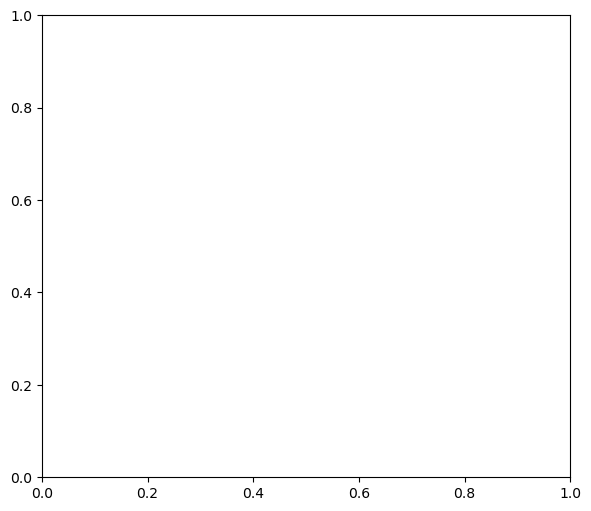

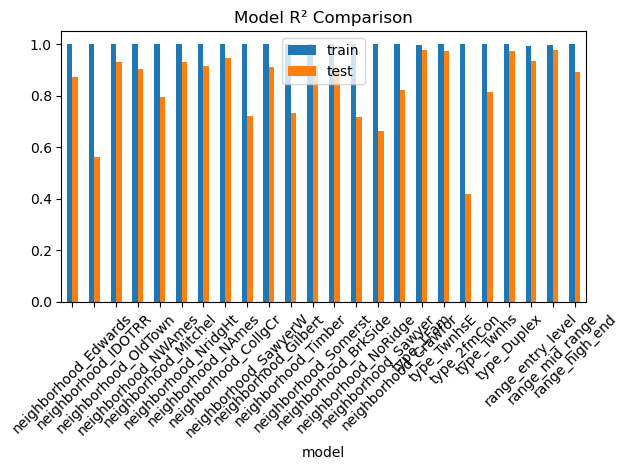

<Figure size 1200x600 with 0 Axes>

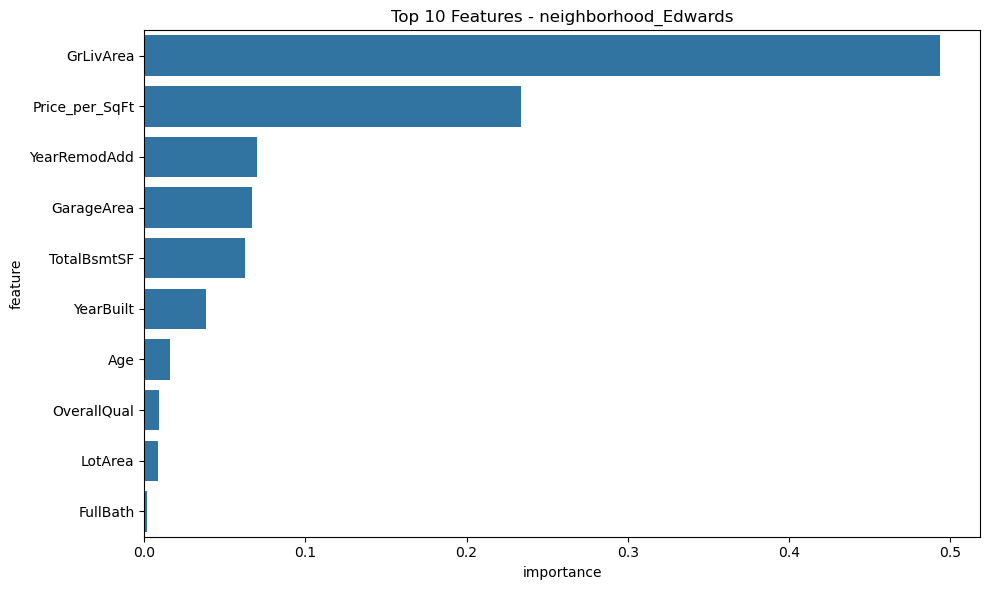

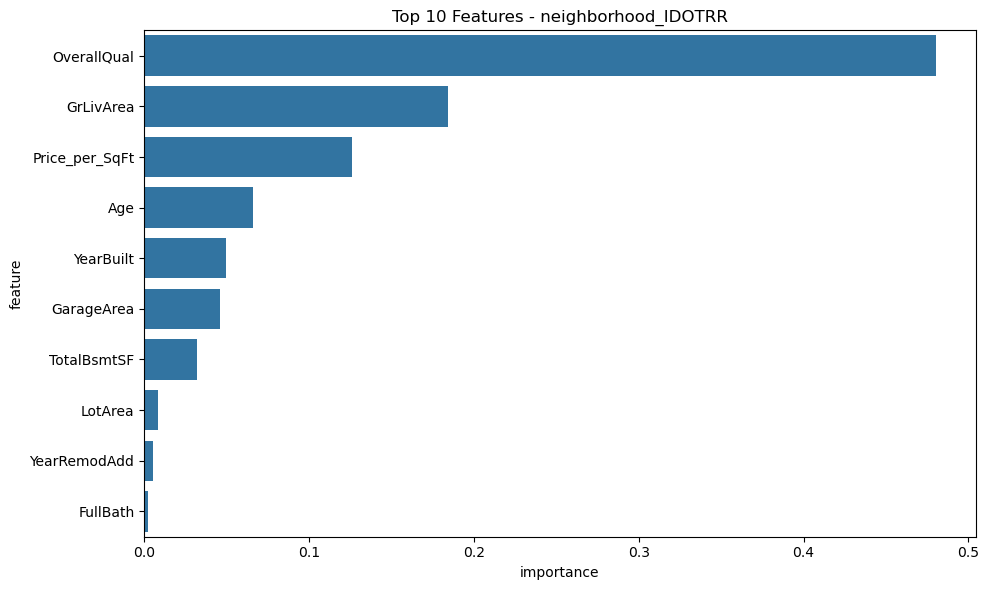

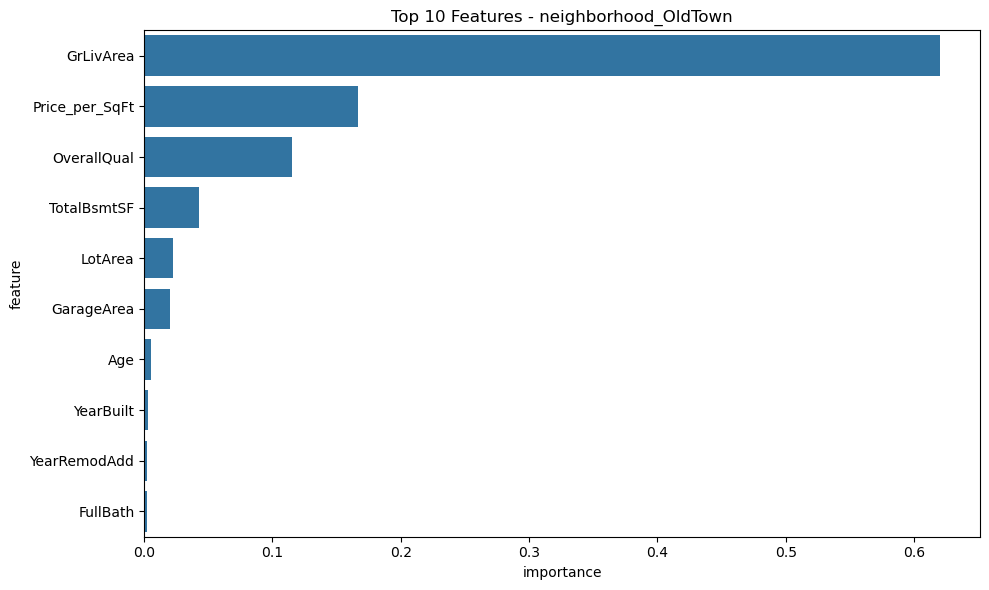

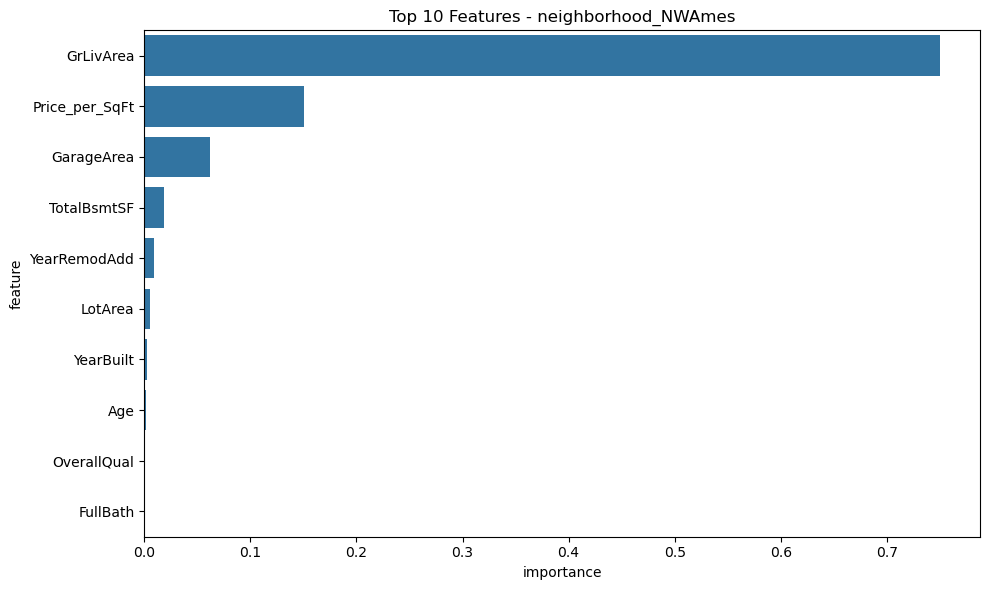

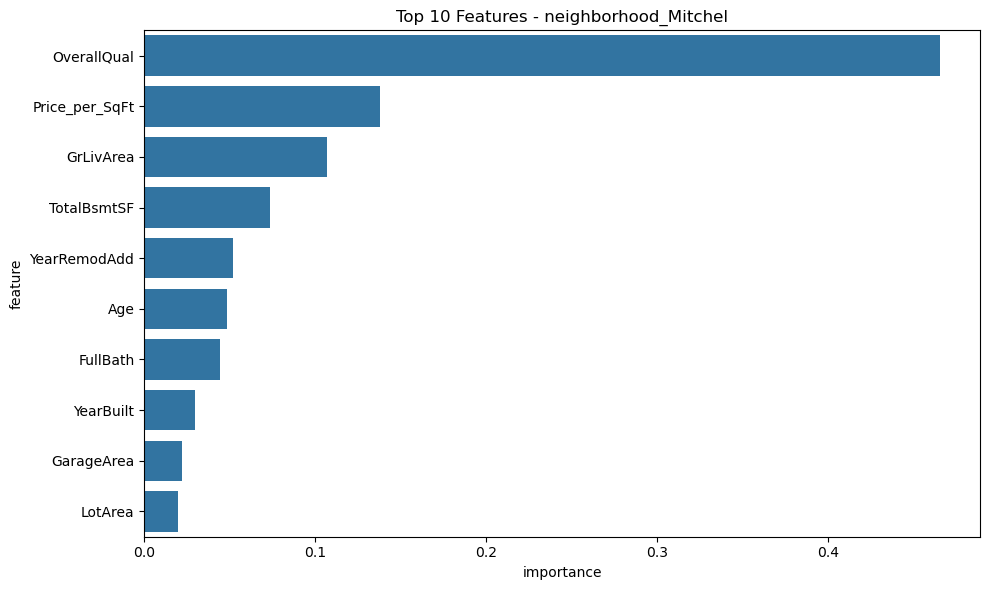

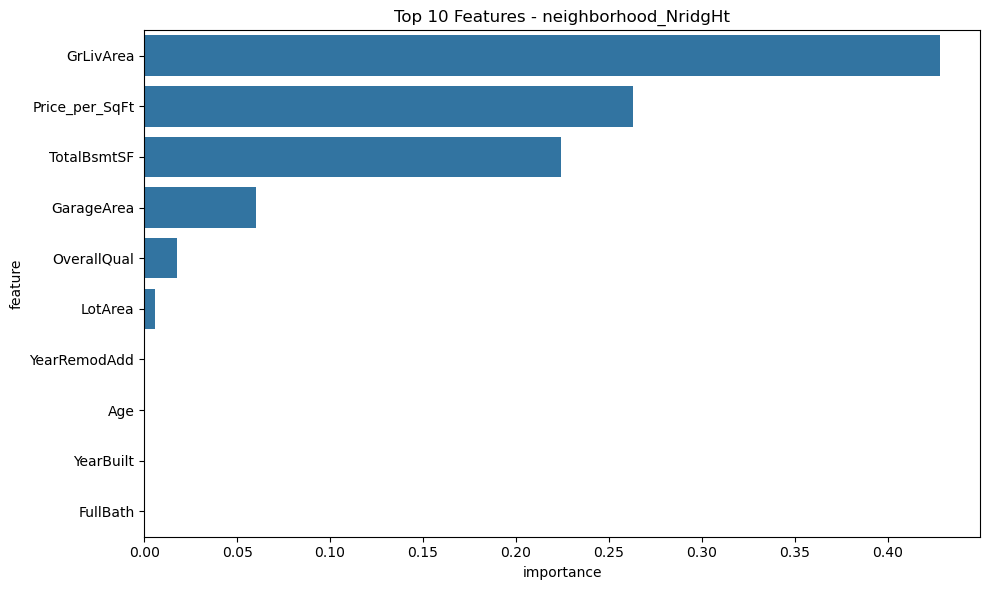

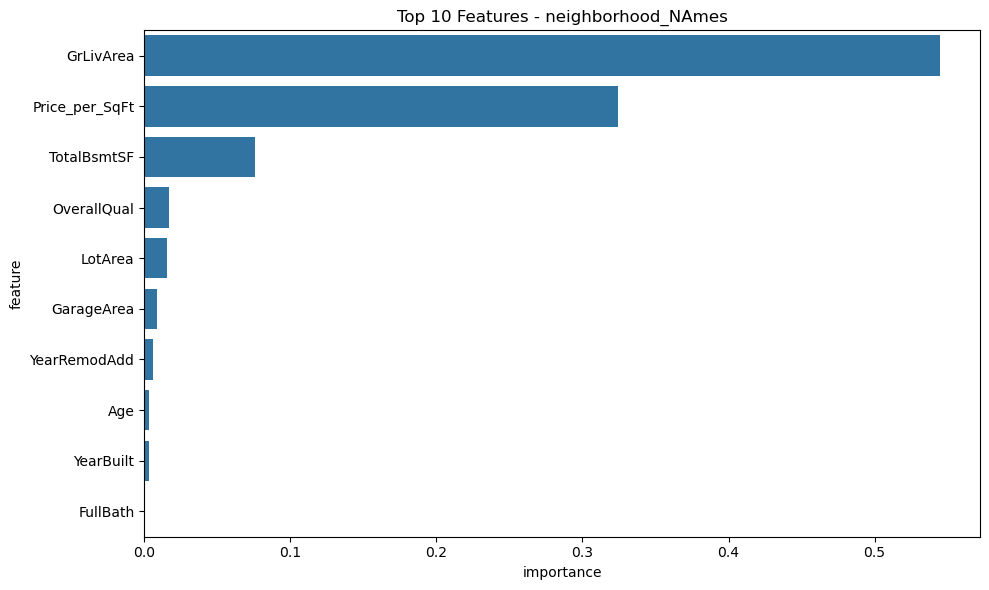

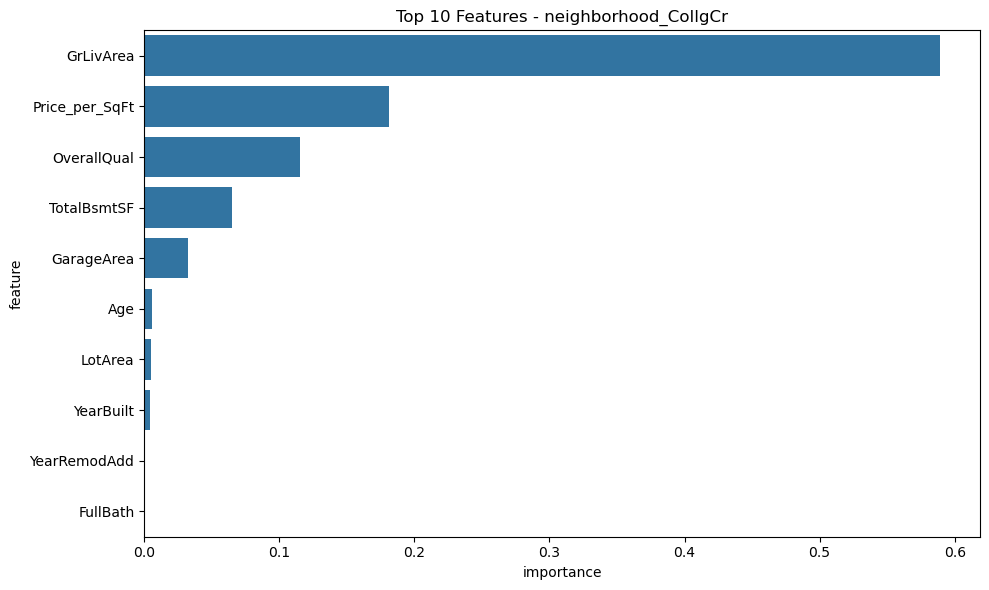

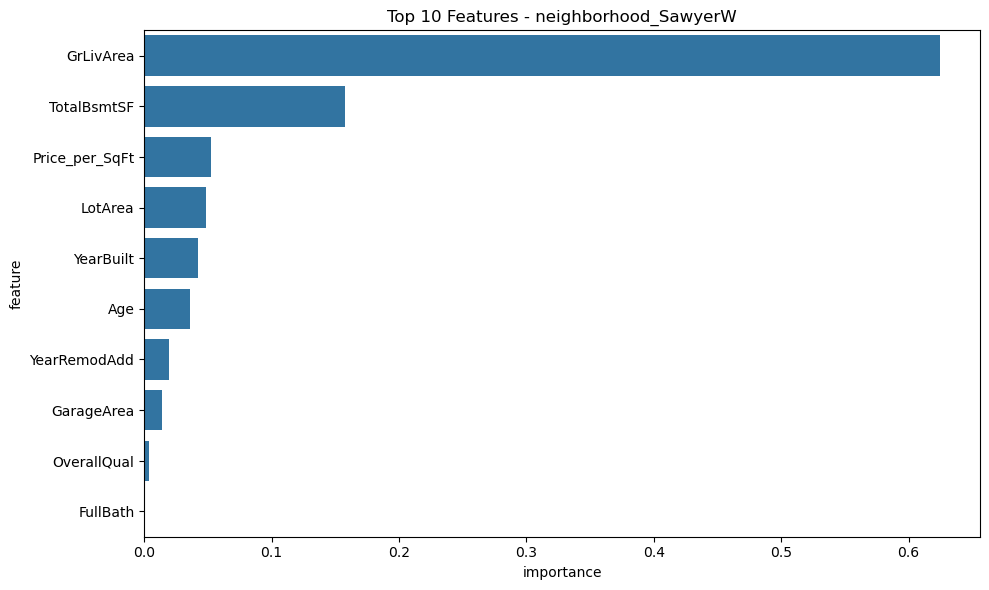

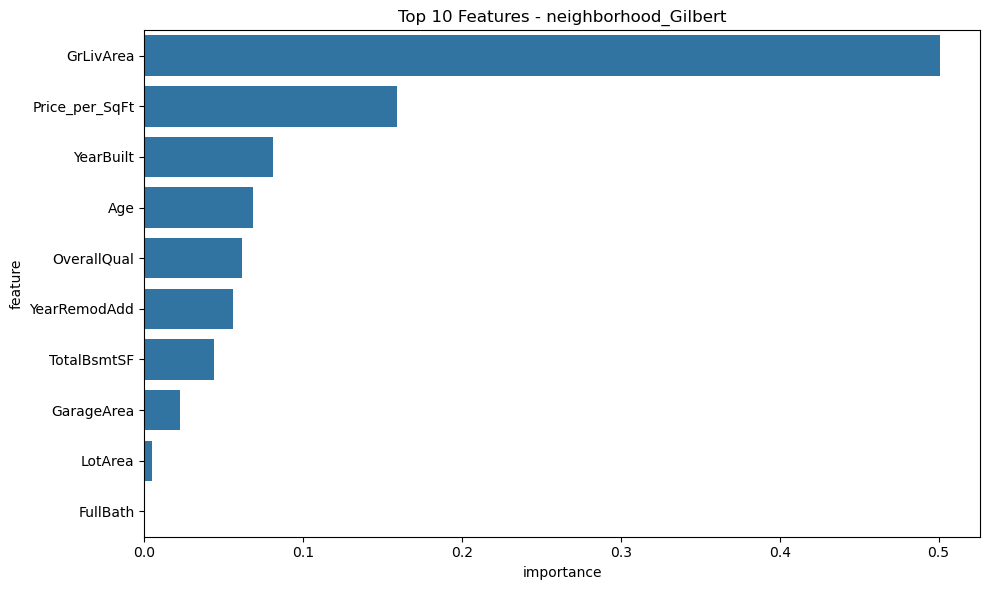

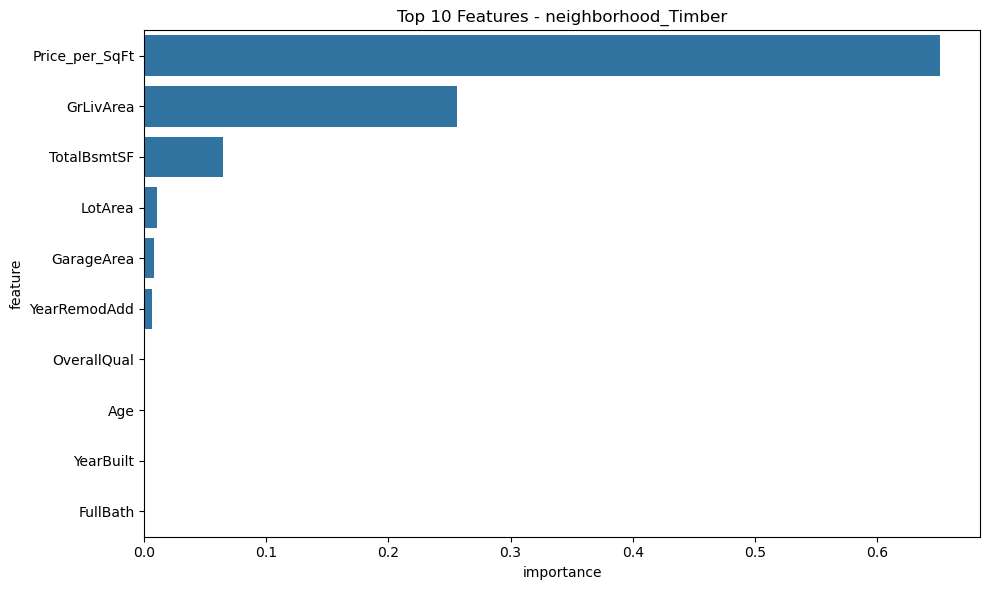

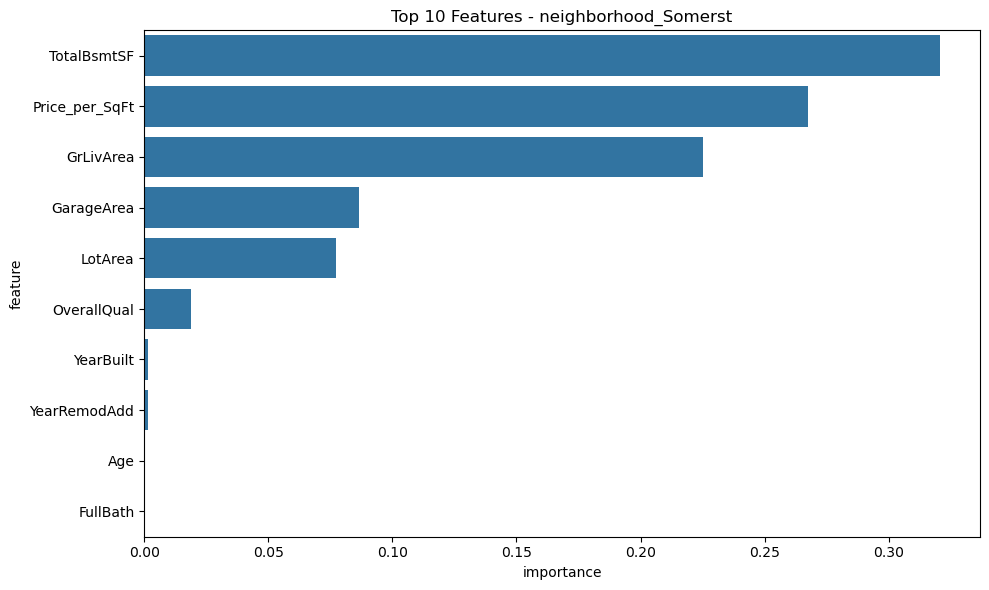

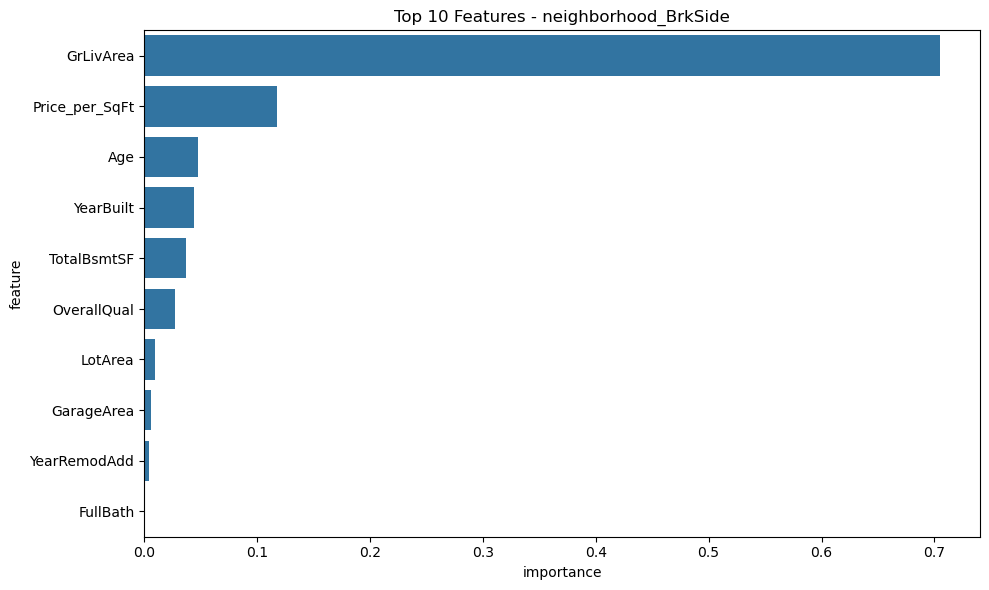

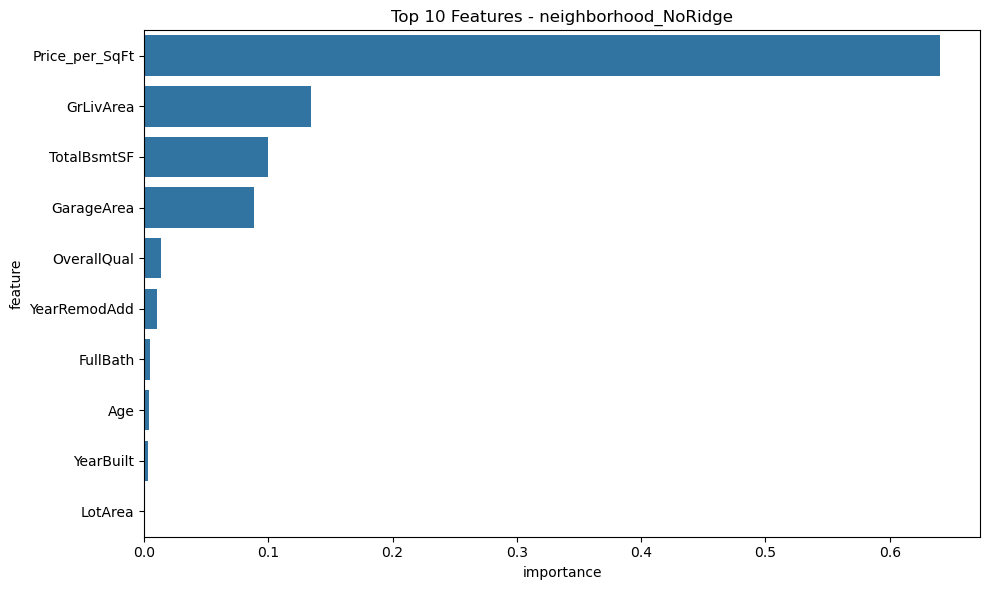

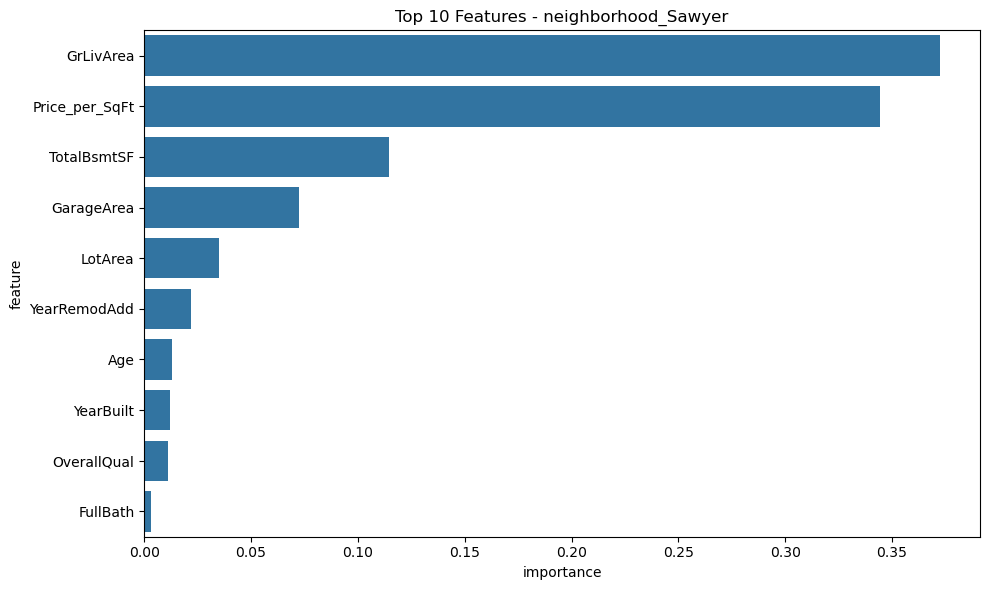

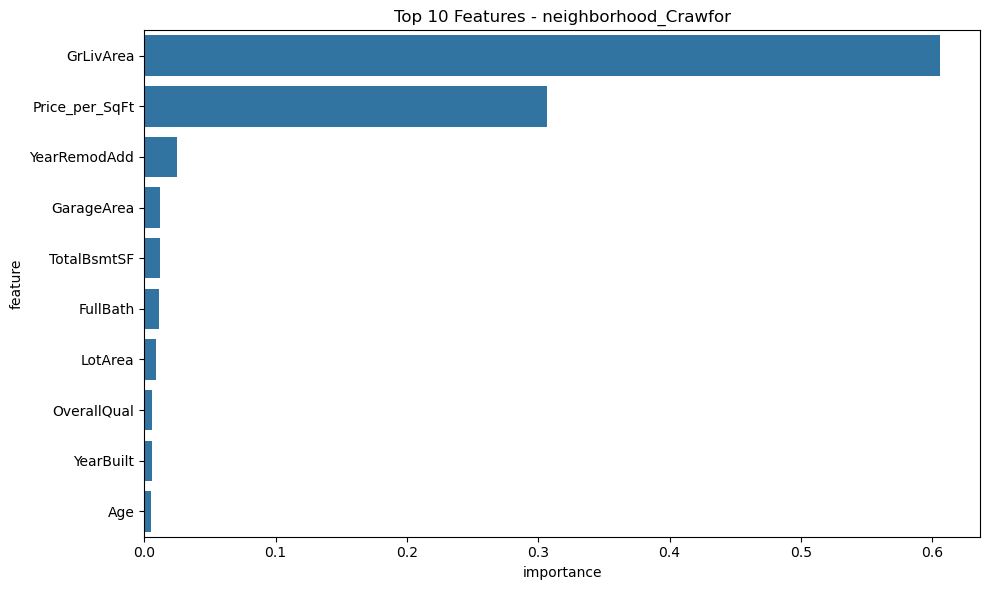

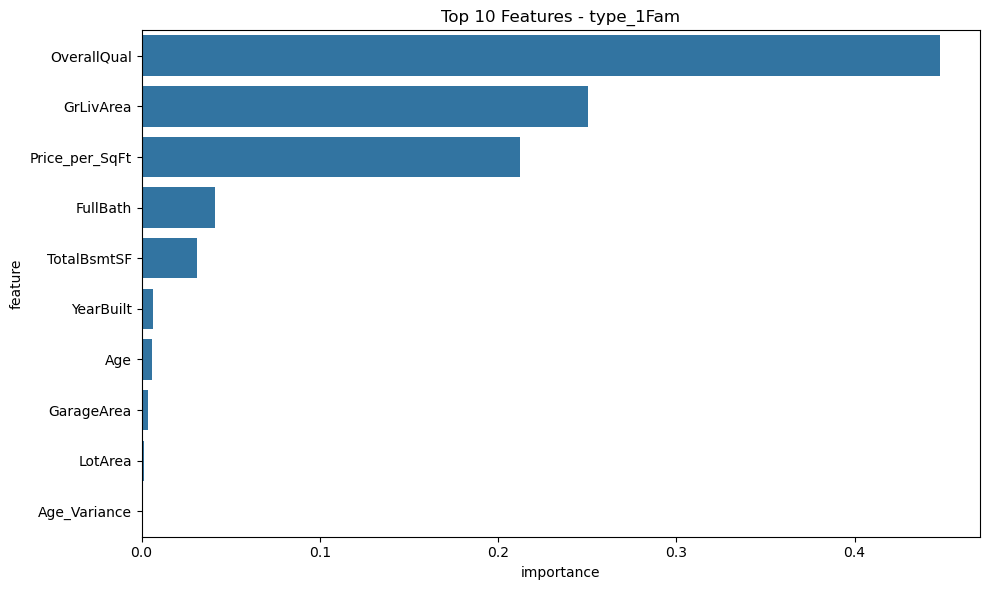

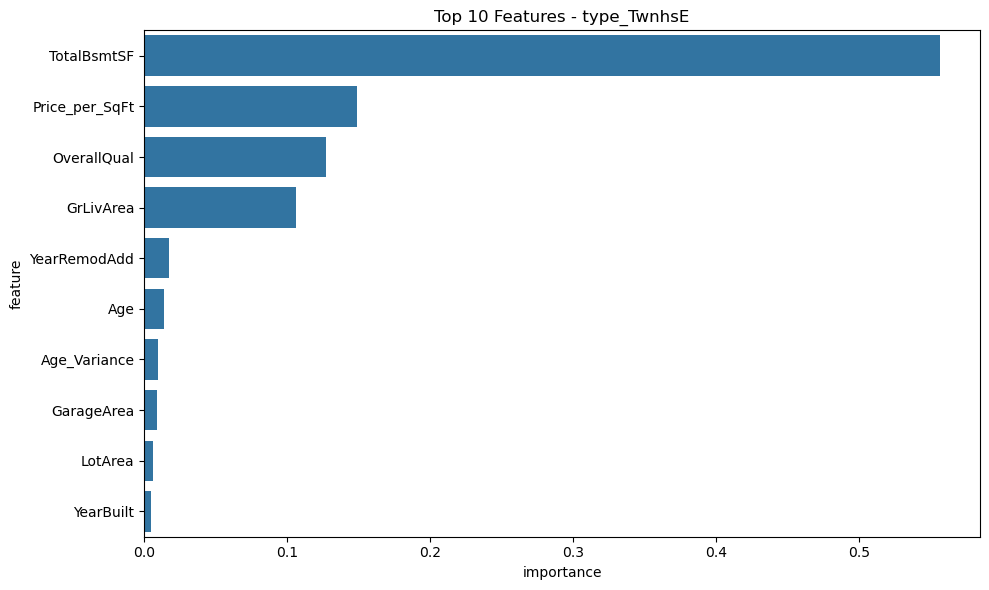

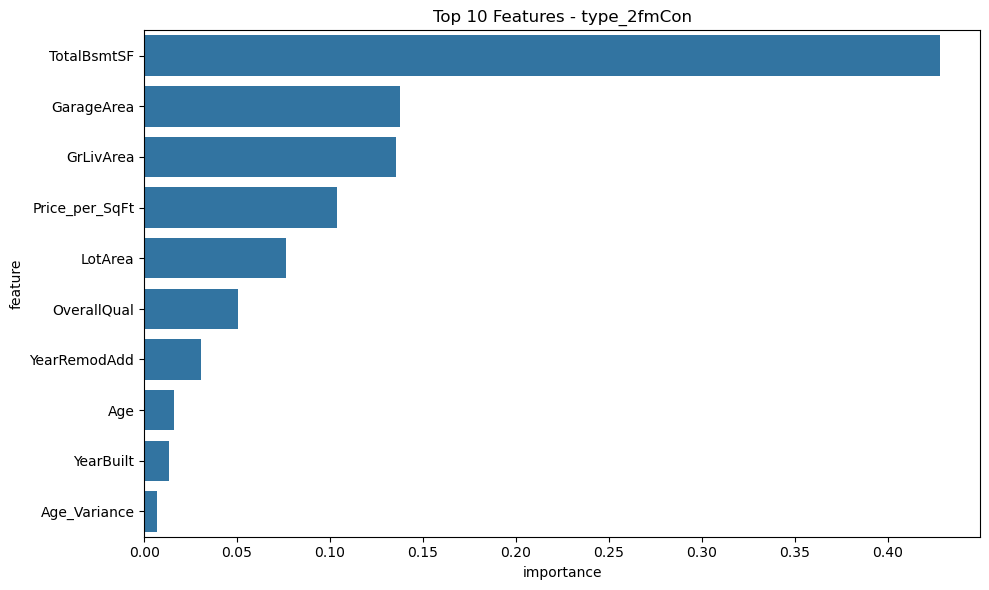

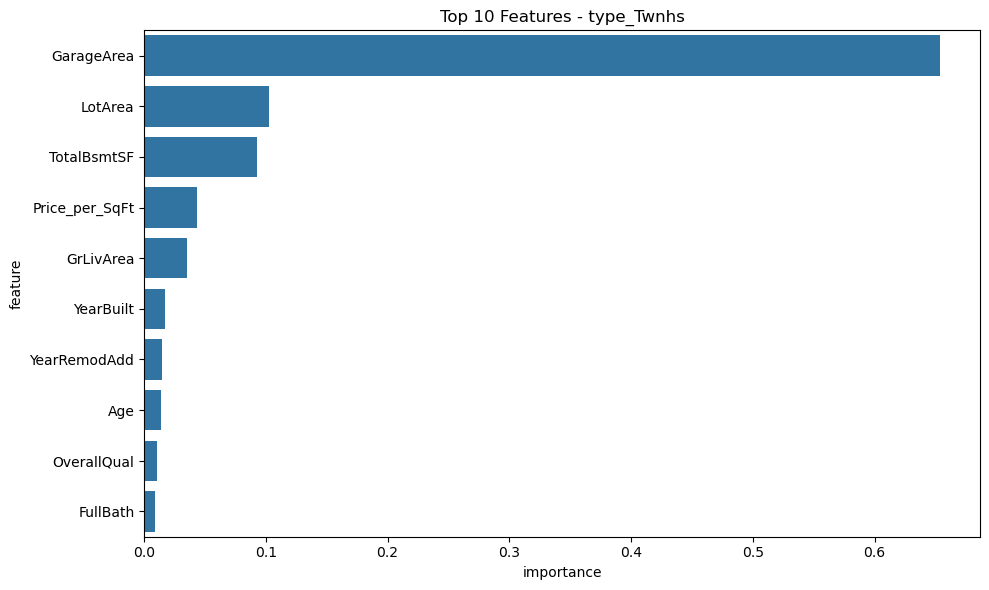

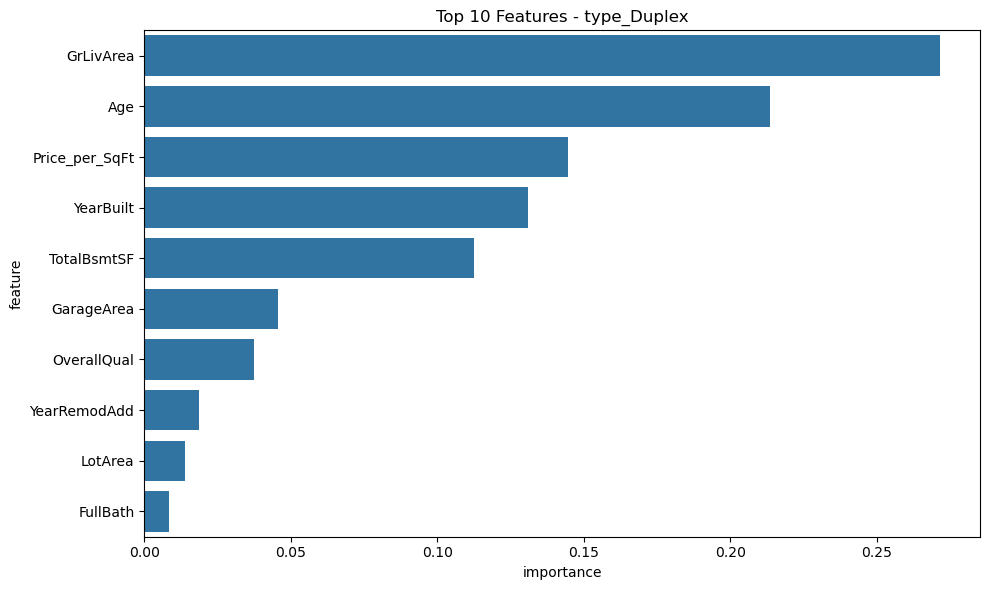

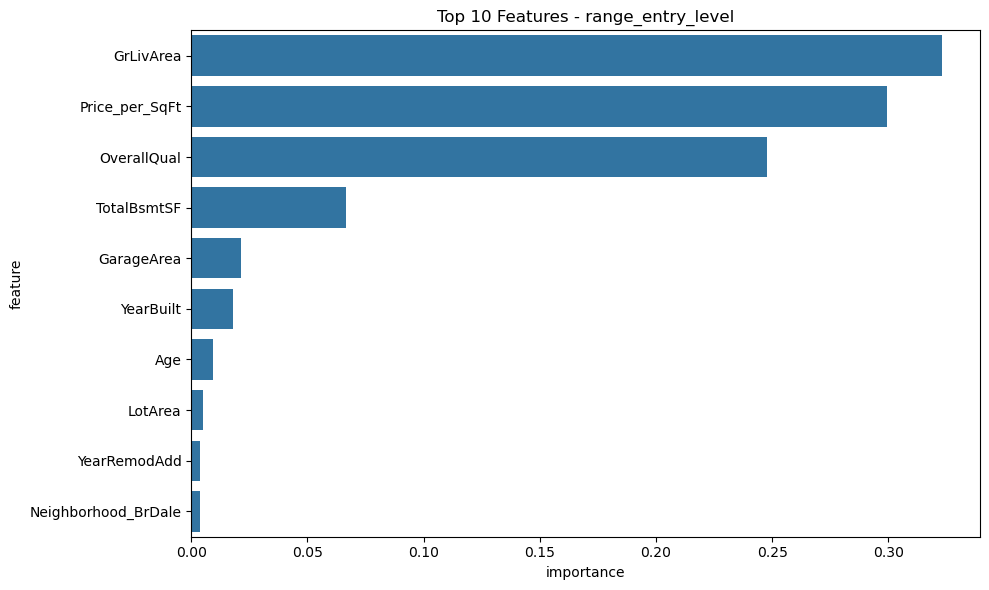

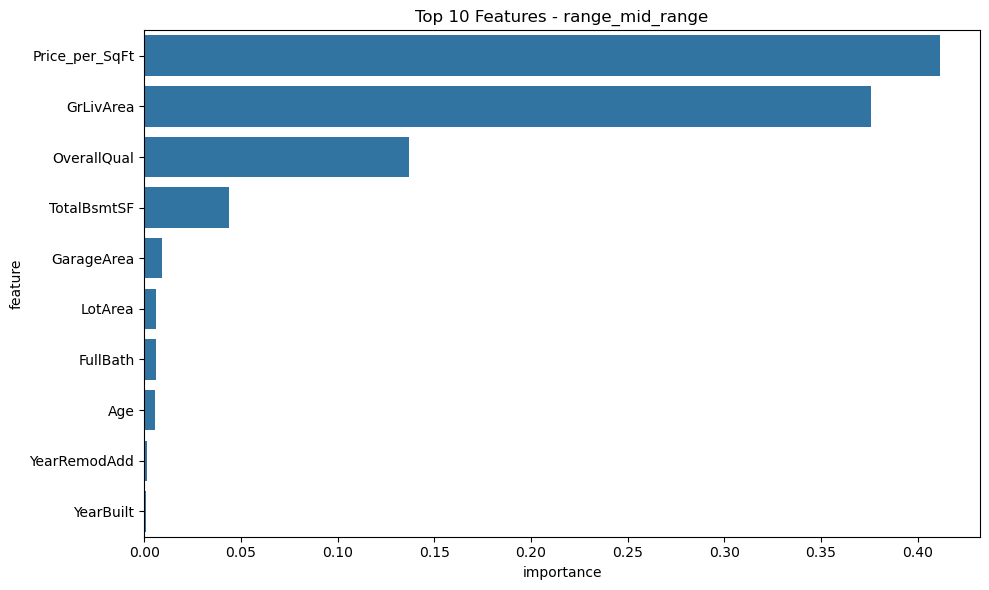

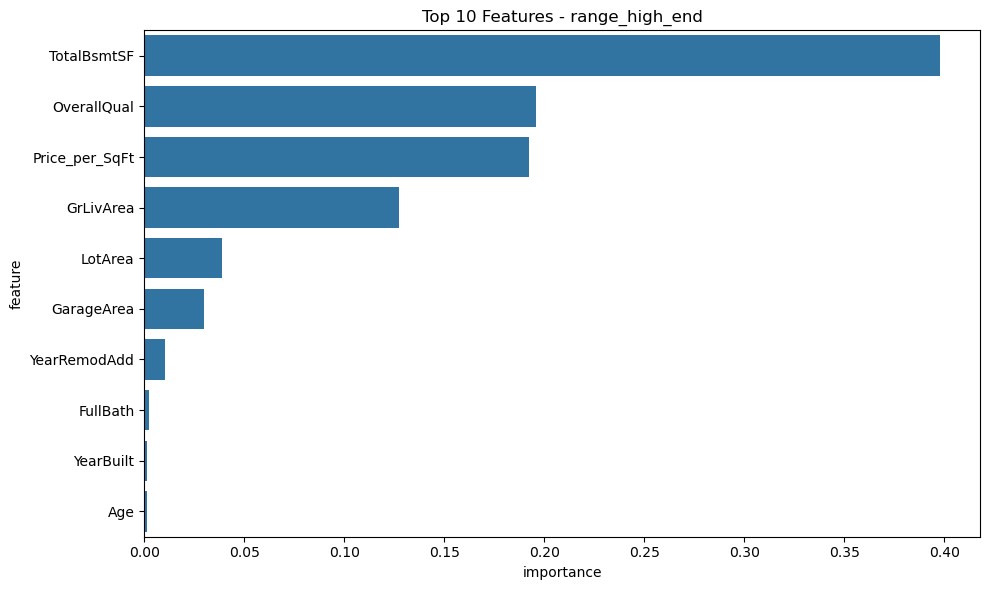


Analysis Complete!


In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

class AmesSpecializedModels:
    """Creates and evaluates specialized models for different market segments"""
    
    def __init__(self, df):
        """Initialize with preprocessed Ames housing dataset"""
        self.df = df.copy()
        self.models = {}
        self.performance = {}
        self.feature_importance = {}
        
        # Calculate additional features
        self._calculate_additional_features()
        
        # Define base features for all models
        self.base_features = [
            'GrLivArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF',
            'GarageArea', 'FullBath', 'YearRemodAdd', 'LotArea',
            'Age', 'Age_Variance', 'Price_per_SqFt'
        ]
        
        # Price range boundaries
        self.price_ranges = {
            'entry_level': (0, 150000),
            'mid_range': (150000, 250000),
            'high_end': (250000, float('inf'))
        }
    
    def _calculate_additional_features(self):
        """Calculate additional features for analysis"""
        # Calculate age and age-related metrics
        current_year = 2024
        self.df['Age'] = current_year - self.df['YearBuilt']
        
        # Calculate age variance by neighborhood
        age_stats = self.df.groupby('Neighborhood')['Age'].agg(['mean', 'std']).fillna(0)
        self.df['Age_Variance'] = self.df['Neighborhood'].map(age_stats['std'])
        
        # Calculate price per square foot
        self.df['Price_per_SqFt'] = self.df['SalePrice'] / self.df['GrLivArea']
        
        print("\nAdditional features calculated:")
        print(self.df[['Age', 'Age_Variance', 'Price_per_SqFt']].describe())
    
    def create_neighborhood_models(self, min_samples=50):
        """Create separate models for neighborhoods with sufficient data"""
        print("\nCreating neighborhood-specific models...")
        
        for neighborhood in self.df['Neighborhood'].unique():
            nbhd_data = self.df[self.df['Neighborhood'] == neighborhood]
            
            if len(nbhd_data) >= min_samples:
                print(f"\nAnalyzing {neighborhood} ({len(nbhd_data)} properties)")
                
                # Use base features plus neighborhood-specific ones
                model, performance = self._train_specialized_model(
                    nbhd_data, 
                    self.base_features, 
                    f"neighborhood_{neighborhood}"
                )
                
                self.models[f"neighborhood_{neighborhood}"] = model
                self.performance[f"neighborhood_{neighborhood}"] = performance
            else:
                print(f"Skipping {neighborhood} - insufficient data ({len(nbhd_data)} properties)")
    
    def create_property_type_models(self):
        """Create separate models for different property types"""
        print("\nCreating property type-specific models...")
        
        for prop_type in self.df['BldgType'].unique():
            type_data = self.df[self.df['BldgType'] == prop_type]
            print(f"\nAnalyzing {prop_type} properties ({len(type_data)} properties)")
            
            # Add property type-specific features
            features = self.base_features + ['BldgType']
            
            # Create and evaluate model
            model, performance = self._train_specialized_model(
                type_data, 
                features, 
                f"type_{prop_type}"
            )
            
            self.models[f"type_{prop_type}"] = model
            self.performance[f"type_{prop_type}"] = performance
    
    def create_price_range_models(self):
        """Create separate models for different price ranges"""
        print("\nCreating price range-specific models...")
        
        for range_name, (min_price, max_price) in self.price_ranges.items():
            range_data = self.df[
                (self.df['SalePrice'] >= min_price) & 
                (self.df['SalePrice'] < max_price)
            ]
            
            print(f"\nAnalyzing {range_name} properties ({len(range_data)} properties)")
            
            # Use all features for price range models
            features = self.base_features + ['BldgType', 'Neighborhood']
            
            # Create and evaluate model
            model, performance = self._train_specialized_model(
                range_data, 
                features, 
                f"range_{range_name}"
            )
            
            self.models[f"range_{range_name}"] = model
            self.performance[f"range_{range_name}"] = performance
    
    def _train_specialized_model(self, data, features, model_name):
        """Train and evaluate a specialized model"""
        # Prepare features
        X = data[features].copy()
        y = data['SalePrice']
        
        # Handle categorical variables
        X = pd.get_dummies(X, drop_first=True)
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )
        
        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Train model
        model = GradientBoostingRegressor(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=4,
            random_state=42
        )
        
        model.fit(X_train_scaled, y_train)
        
        # Evaluate performance
        train_pred = model.predict(X_train_scaled)
        test_pred = model.predict(X_test_scaled)
        
        performance = {
            'train_r2': r2_score(y_train, train_pred),
            'test_r2': r2_score(y_test, test_pred),
            'train_rmse': np.sqrt(mean_squared_error(y_train, train_pred)),
            'test_rmse': np.sqrt(mean_squared_error(y_test, test_pred))
        }
        
        # Store feature importance
        self.feature_importance[model_name] = pd.DataFrame({
            'feature': X.columns,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        print(f"\nModel Performance for {model_name}:")
        print(f"Train R²: {performance['train_r2']:.4f}")
        print(f"Test R²: {performance['test_r2']:.4f}")
        print(f"Train RMSE: ${performance['train_rmse']:,.2f}")
        print(f"Test RMSE: ${performance['test_rmse']:,.2f}")
        
        return model, performance
    
    def plot_performance_comparison(self):
        """Visualize performance comparison across all specialized models"""
        performance_data = []
        
        for model_name, perf in self.performance.items():
            performance_data.append({
                'model': model_name,
                'metric': 'R²',
                'train': perf['train_r2'],
                'test': perf['test_r2']
            })
        
        performance_df = pd.DataFrame(performance_data)
        
        plt.figure(figsize=(15, 6))
        
        # Plot R² comparison
        plt.subplot(1, 2, 1)
        performance_df.plot(
            x='model', 
            y=['train', 'test'], 
            kind='bar',
            title='Model R² Comparison'
        )
        plt.xticks(rotation=45)
        plt.tight_layout()
        
        # Plot top features
        plt.figure(figsize=(12, 6))
        for model_name, importance_df in self.feature_importance.items():
            top_features = importance_df.head(10)
            
            plt.figure(figsize=(10, 6))
            sns.barplot(data=top_features, x='importance', y='feature')
            plt.title(f'Top 10 Features - {model_name}')
            plt.tight_layout()
            plt.show()
        
        return performance_df

# Main execution
if __name__ == "__main__":
    # Use your existing preprocessed data
    preprocessor = AmesDataPreprocessor()
    data = preprocessor.load_and_merge_data()
    
    if data is not None:
        data = preprocessor.handle_missing_values(data)
        
        # Initialize specialized models
        print("\nInitializing Specialized Models Analysis...")
        specialized_models = AmesSpecializedModels(data)
        
        # Create all specialized models
        specialized_models.create_neighborhood_models()
        specialized_models.create_property_type_models()
        specialized_models.create_price_range_models()
        
        # Compare performance
        print("\nGenerating Performance Comparison...")
        performance_comparison = specialized_models.plot_performance_comparison()
        
        print("\nAnalysis Complete!")

Successfully loaded:
Housing data shape: (2580, 82)
Real estate data shape: (22213, 91)
Merged data shape: (2624, 84)

Initializing Specialized Models Analysis...

Additional features calculated:
               Age  Age_Variance  Price_per_SqFt
count  2624.000000   2624.000000     2624.000000
mean     53.679878     12.115740      120.962124
std      29.675273      7.051138       30.708180
min      14.000000      0.000000       15.371394
25%      25.000000      7.962665      100.328900
50%      52.000000     10.403873      119.667533
75%      71.000000     16.475389      138.888889
max     152.000000     25.777535      276.250881

Creating neighborhood-specific models...
Skipping SWISU - insufficient data (42 properties)

Analyzing Edwards (169 properties)

Model Performance for neighborhood_Edwards:
Train R²: 0.9999
Test R²: 0.8708
Train RMSE: $468.44
Test RMSE: $18,338.32

Analyzing IDOTRR (80 properties)

Model Performance for neighborhood_IDOTRR:
Train R²: 1.0000
Test R²: 0.5618
Tra

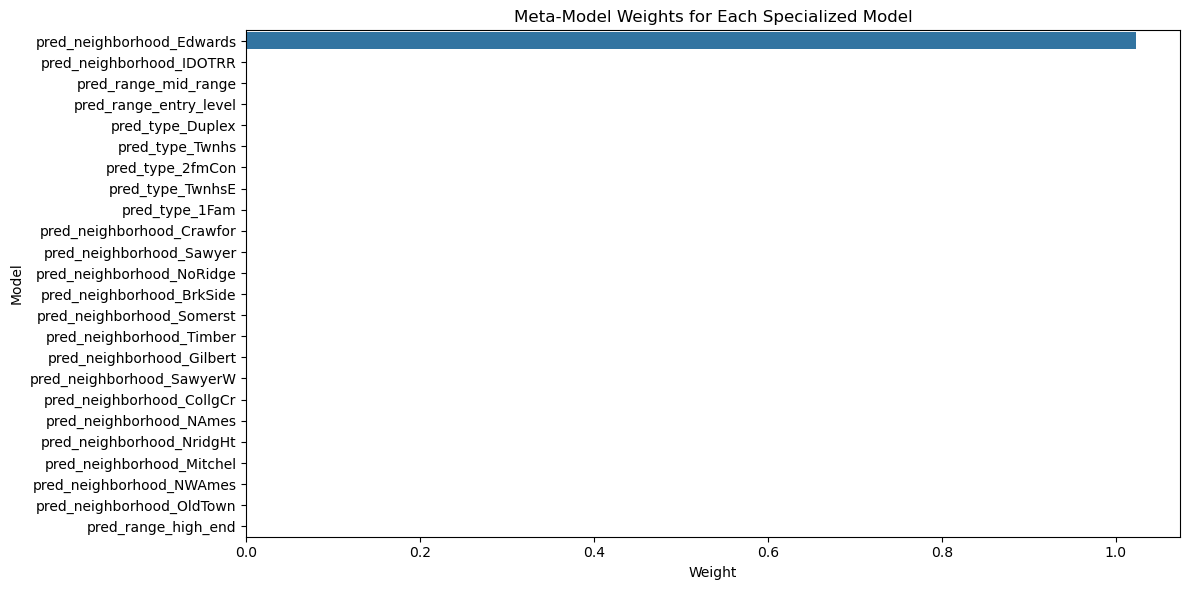


Model Weights:
                        model    weight
0   pred_neighborhood_Edwards  1.022615
1    pred_neighborhood_IDOTRR  0.000000
22       pred_range_mid_range  0.000000
21     pred_range_entry_level  0.000000
20           pred_type_Duplex  0.000000
19            pred_type_Twnhs  0.000000
18           pred_type_2fmCon  0.000000
17           pred_type_TwnhsE  0.000000
16             pred_type_1Fam  0.000000
15  pred_neighborhood_Crawfor  0.000000
14   pred_neighborhood_Sawyer  0.000000
13  pred_neighborhood_NoRidge  0.000000
12  pred_neighborhood_BrkSide  0.000000
11  pred_neighborhood_Somerst  0.000000
10   pred_neighborhood_Timber  0.000000
9   pred_neighborhood_Gilbert  0.000000
8   pred_neighborhood_SawyerW  0.000000
7   pred_neighborhood_CollgCr  0.000000
6     pred_neighborhood_NAmes  0.000000
5   pred_neighborhood_NridgHt  0.000000
4   pred_neighborhood_Mitchel  0.000000
3    pred_neighborhood_NWAmes  0.000000
2   pred_neighborhood_OldTown  0.000000
23        pred_range_hig

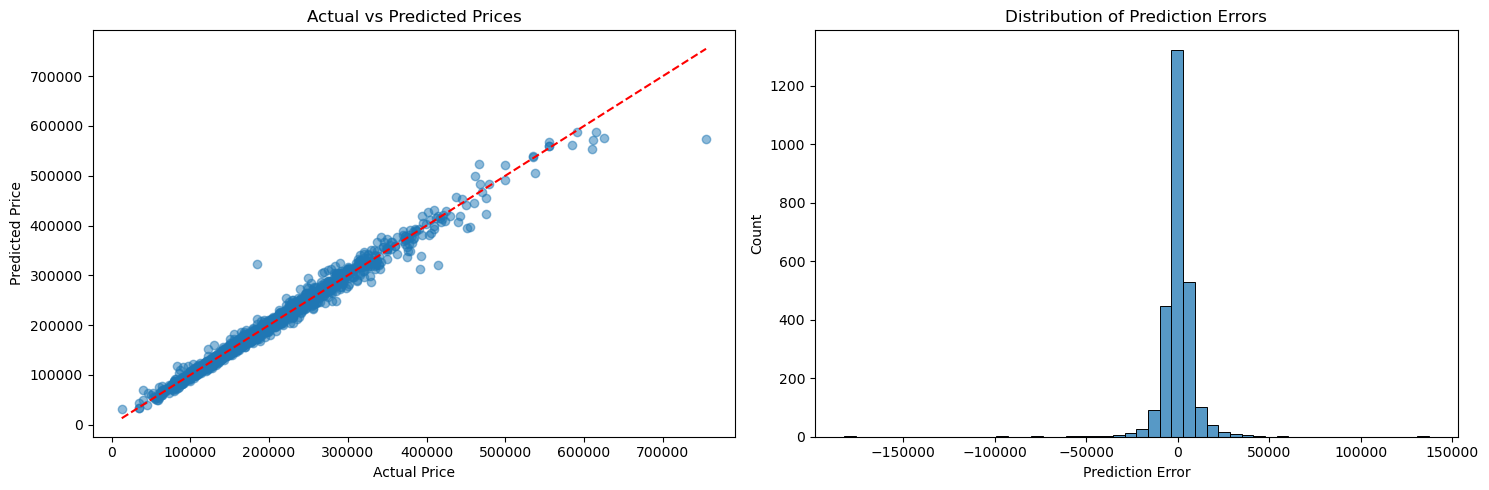


Prediction Error Analysis:
Mean Absolute Error: $5,078.49
Median Absolute Error: $3,162.06
90th Percentile Error: $11,088.51

Stacking Analysis Complete!


In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns

class AmesSpecializedModels:
    """Creates and evaluates specialized models for different market segments"""
    
    def __init__(self, df):
        """Initialize with preprocessed Ames housing dataset"""
        self.df = df.copy()
        self.models = {}
        self.performance = {}
        self.feature_importance = {}
        
        # Calculate additional features
        self._calculate_additional_features()
        
        # Define base features for all models
        self.base_features = [
            'GrLivArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF',
            'GarageArea', 'FullBath', 'YearRemodAdd', 'LotArea',
            'Age', 'Age_Variance', 'Price_per_SqFt'
        ]
        
        # Price range boundaries
        self.price_ranges = {
            'entry_level': (0, 150000),
            'mid_range': (150000, 250000),
            'high_end': (250000, float('inf'))
        }
    
    def _calculate_additional_features(self):
        """Calculate additional features for analysis"""
        # Calculate age and age-related metrics
        current_year = 2024
        self.df['Age'] = current_year - self.df['YearBuilt']
        
        # Calculate age variance by neighborhood
        age_stats = self.df.groupby('Neighborhood')['Age'].agg(['mean', 'std']).fillna(0)
        self.df['Age_Variance'] = self.df['Neighborhood'].map(age_stats['std'])
        
        # Calculate price per square foot
        self.df['Price_per_SqFt'] = self.df['SalePrice'] / self.df['GrLivArea']
        
        print("\nAdditional features calculated:")
        print(self.df[['Age', 'Age_Variance', 'Price_per_SqFt']].describe())
    
    def create_neighborhood_models(self, min_samples=50):
        """Create separate models for neighborhoods with sufficient data"""
        print("\nCreating neighborhood-specific models...")
        
        for neighborhood in self.df['Neighborhood'].unique():
            nbhd_data = self.df[self.df['Neighborhood'] == neighborhood]
            
            if len(nbhd_data) >= min_samples:
                print(f"\nAnalyzing {neighborhood} ({len(nbhd_data)} properties)")
                
                # Use base features plus neighborhood-specific ones
                model, performance = self._train_specialized_model(
                    nbhd_data, 
                    self.base_features, 
                    f"neighborhood_{neighborhood}"
                )
                
                self.models[f"neighborhood_{neighborhood}"] = model
                self.performance[f"neighborhood_{neighborhood}"] = performance
            else:
                print(f"Skipping {neighborhood} - insufficient data ({len(nbhd_data)} properties)")
    
    def create_property_type_models(self):
        """Create separate models for different property types"""
        print("\nCreating property type-specific models...")
        
        for prop_type in self.df['BldgType'].unique():
            type_data = self.df[self.df['BldgType'] == prop_type]
            print(f"\nAnalyzing {prop_type} properties ({len(type_data)} properties)")
            
            # Add property type-specific features
            features = self.base_features + ['BldgType']
            
            # Create and evaluate model
            model, performance = self._train_specialized_model(
                type_data, 
                features, 
                f"type_{prop_type}"
            )
            
            self.models[f"type_{prop_type}"] = model
            self.performance[f"type_{prop_type}"] = performance
    
    def create_price_range_models(self):
        """Create separate models for different price ranges"""
        print("\nCreating price range-specific models...")
        
        for range_name, (min_price, max_price) in self.price_ranges.items():
            range_data = self.df[
                (self.df['SalePrice'] >= min_price) & 
                (self.df['SalePrice'] < max_price)
            ]
            
            print(f"\nAnalyzing {range_name} properties ({len(range_data)} properties)")
            
            # Use all features for price range models
            features = self.base_features + ['BldgType', 'Neighborhood']
            
            # Create and evaluate model
            model, performance = self._train_specialized_model(
                range_data, 
                features, 
                f"range_{range_name}"
            )
            
            self.models[f"range_{range_name}"] = model
            self.performance[f"range_{range_name}"] = performance
    
    def _train_specialized_model(self, data, features, model_name):
        """Train and evaluate a specialized model"""
        # Prepare features
        X = data[features].copy()
        y = data['SalePrice']
        
        # Handle categorical variables
        X = pd.get_dummies(X, drop_first=True)
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )
        
        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Train model
        model = GradientBoostingRegressor(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=4,
            random_state=42
        )
        
        model.fit(X_train_scaled, y_train)
        
        # Evaluate performance
        train_pred = model.predict(X_train_scaled)
        test_pred = model.predict(X_test_scaled)
        
        performance = {
            'train_r2': r2_score(y_train, train_pred),
            'test_r2': r2_score(y_test, test_pred),
            'train_rmse': np.sqrt(mean_squared_error(y_train, train_pred)),
            'test_rmse': np.sqrt(mean_squared_error(y_test, test_pred))
        }
        
        # Store feature importance
        self.feature_importance[model_name] = pd.DataFrame({
            'feature': X.columns,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        print(f"\nModel Performance for {model_name}:")
        print(f"Train R²: {performance['train_r2']:.4f}")
        print(f"Test R²: {performance['test_r2']:.4f}")
        print(f"Train RMSE: ${performance['train_rmse']:,.2f}")
        print(f"Test RMSE: ${performance['test_rmse']:,.2f}")
        
        return model, performance

class AmesModelStacker:
    """Implements stacking of specialized models to create an ensemble predictor"""
    
    def __init__(self, specialized_models, data):
        """Initialize with trained specialized models and original dataset"""
        self.specialized_models = specialized_models
        self.data = data.copy()
        self.meta_features = None
        self.meta_model = None
        self.cv_scores = None
        
        # Calculate necessary features if they don't exist
        self._ensure_features()
    
    def _ensure_features(self):
        """Ensure all necessary features exist in the dataset"""
        # Calculate age if not present
        if 'Age' not in self.data.columns:
            self.data['Age'] = 2024 - self.data['YearBuilt']
        
        # Calculate age variance if not present
        if 'Age_Variance' not in self.data.columns:
            age_stats = self.data.groupby('Neighborhood')['Age'].agg(['mean', 'std']).fillna(0)
            self.data['Age_Variance'] = self.data['Neighborhood'].map(age_stats['std'])
        
        # Calculate price per square foot if not present
        if 'Price_per_SqFt' not in self.data.columns:
            self.data['Price_per_SqFt'] = self.data['SalePrice'] / self.data['GrLivArea']
        
        print("\nFeature verification:")
        for feature in ['Age', 'Age_Variance', 'Price_per_SqFt']:
            print(f"{feature} statistics:")
            print(self.data[feature].describe())
            print()
    
    def generate_meta_features(self, n_folds=5):
        """Generate meta-features using cross-validation predictions"""
        print("\nGenerating meta-features using cross-validation...")
        
        # Initialize DataFrame for meta-features
        self.meta_features = pd.DataFrame(index=self.data.index)
        
        # Set up K-Fold cross-validation
        kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
        
        # Generate predictions from each model
        for model_name, model in self.specialized_models.models.items():
            print(f"\nProcessing {model_name}...")
            
            # Get appropriate features for this model
            features = ['GrLivArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF',
                       'GarageArea', 'FullBath', 'YearRemodAdd', 'LotArea',
                       'Age', 'Age_Variance', 'Price_per_SqFt']
            
            if 'type' in model_name or 'range' in model_name:
                features.append('BldgType')
            
            if 'range' in model_name:
                features.append('Neighborhood')
            
            # Prepare feature matrix
            X = self.data[features].copy()
            X = pd.get_dummies(X, drop_first=True)
            y = self.data['SalePrice']
            
            # Generate out-of-fold predictions
            oof_predictions = np.zeros(len(self.data))
            
            for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
                # Split data
                X_train = X.iloc[train_idx]
                y_train = y.iloc[train_idx]
                X_val = X.iloc[val_idx]
                
                # Train model
                model.fit(X_train, y_train)
                
                # Make predictions
                oof_predictions[val_idx] = model.predict(X_val)
            
            # Store predictions as meta-features
            self.meta_features[f'pred_{model_name}'] = oof_predictions
        
        print("\nMeta-features generated. Shape:", self.meta_features.shape)
        return self.meta_features
    
    def train_meta_model(self):
        """Train a meta-model using the generated meta-features"""
        print("\nTraining meta-model...")
        
        # Prepare meta-features
        if self.meta_features is None:
            self.generate_meta_features()
        
        # Split data for meta-model training
        X_meta = self.meta_features.copy()
        y_meta = self.data['SalePrice']
        
        # Initialize and train meta-model
        self.meta_model = LassoCV(cv=5, random_state=42)
        self.meta_model.fit(X_meta, y_meta)
        
        # Calculate performance metrics
        predictions = self.meta_model.predict(X_meta)
        r2 = r2_score(y_meta, predictions)
        rmse = np.sqrt(mean_squared_error(y_meta, predictions))
        
        print("\nMeta-model Performance:")
        print(f"R²: {r2:.4f}")
        print(f"RMSE: ${rmse:,.2f}")
        
        # Analyze model weights
        self._analyze_meta_model_weights()
        
        return self.meta_model
    
    def _analyze_meta_model_weights(self):
        """Analyze and visualize meta-model weights"""
        weights = pd.DataFrame({
            'model': self.meta_features.columns,
            'weight': self.meta_model.coef_
        }).sort_values('weight', ascending=False)
        
        plt.figure(figsize=(12, 6))
        sns.barplot(data=weights, x='weight', y='model')
        plt.title('Meta-Model Weights for Each Specialized Model')
        plt.xlabel('Weight')
        plt.ylabel('Model')
        plt.tight_layout()
        plt.show()
        
        print("\nModel Weights:")
        print(weights)
        
        return weights
    
    def evaluate_ensemble(self, n_folds=5):
        """Evaluate the complete ensemble using cross-validation"""
        print("\nEvaluating ensemble performance...")
        
        kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
        cv_scores = []
        
        for fold, (train_idx, val_idx) in enumerate(kf.split(self.meta_features)):
            # Split meta-features
            X_train = self.meta_features.iloc[train_idx]
            y_train = self.data['SalePrice'].iloc[train_idx]
            X_val = self.meta_features.iloc[val_idx]
            y_val = self.data['SalePrice'].iloc[val_idx]
            
            # Train meta-model
            meta_model = LassoCV(cv=5, random_state=42)
            meta_model.fit(X_train, y_train)
            
            # Make predictions
            predictions = meta_model.predict(X_val)
            
            # Calculate metrics
            r2 = r2_score(y_val, predictions)
            rmse = np.sqrt(mean_squared_error(y_val, predictions))
            
            cv_scores.append({
                'fold': fold + 1,
                'r2': r2,
                'rmse': rmse
            })
        
        self.cv_scores = pd.DataFrame(cv_scores)
        
        print("\nCross-validation Results:")
        print(f"Average R²: {self.cv_scores['r2'].mean():.4f} (±{self.cv_scores['r2'].std():.4f})")
        print(f"Average RMSE: ${self.cv_scores['rmse'].mean():,.2f} (±${self.cv_scores['rmse'].std():,.2f})")
        
        return self.cv_scores
    
    def plot_prediction_analysis(self):
        """Generate visualizations for prediction analysis"""
        if self.meta_model is None:
            self.train_meta_model()
        
        predictions = self.meta_model.predict(self.meta_features)
        actual = self.data['SalePrice']
        
        plt.figure(figsize=(15, 5))
        
        # Actual vs Predicted
        plt.subplot(1, 2, 1)
        plt.scatter(actual, predictions, alpha=0.5)
        plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--')
        plt.xlabel('Actual Price')
        plt.ylabel('Predicted Price')
        plt.title('Actual vs Predicted Prices')
        
        # Residuals
        plt.subplot(1, 2, 2)
        residuals = predictions - actual
        sns.histplot(residuals, bins=50)
        plt.xlabel('Prediction Error')
        plt.ylabel('Count')
        plt.title('Distribution of Prediction Errors')
        
        plt.tight_layout()
        plt.show()
        
        # Print error analysis
        print("\nPrediction Error Analysis:")
        print(f"Mean Absolute Error: ${np.abs(residuals).mean():,.2f}")
        print(f"Median Absolute Error: ${np.median(np.abs(residuals)):,.2f}")
        print(f"90th Percentile Error: ${np.percentile(np.abs(residuals), 90):,.2f}")

# Main execution
if __name__ == "__main__":
    # Use your existing preprocessed data and specialized models
    preprocessor = AmesDataPreprocessor()
    data = preprocessor.load_and_merge_data()
    
    if data is not None:
        data = preprocessor.handle_missing_values(data)
        
        # Initialize and train specialized models
        print("\nInitializing Specialized Models Analysis...")
        specialized_models = AmesSpecializedModels(data)
        specialized_models.create_neighborhood_models()
        specialized_models.create_property_type_models()
        specialized_models.create_price_range_models()
        
        # Initialize and train model stacker
        print("\nInitializing Model Stacking...")
        stacker = AmesModelStacker(specialized_models, data)
        
        # Generate meta-features
        meta_features = stacker.generate_meta_features()
        
        # Train and evaluate stacked model
        stacker.train_meta_model()
        cv_results = stacker.evaluate_ensemble()
        
        # Analyze predictions
        stacker.plot_prediction_analysis()
        
        print("\nStacking Analysis Complete!")

In [120]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

class AmesDataPreprocessor:
    def load_and_merge_data(self):
        """Load data from current directory"""
        try:
            # Load housing data
            housing_data = pd.read_csv('Ames_HousePrice.csv')
            print(f"Housing data loaded. Shape: {housing_data.shape}")
            
            # Load real estate data if you have it
            try:
                real_estate_data = pd.read_csv('real_estate_data.csv')  # Adjust filename if needed
                print(f"Real estate data loaded. Shape: {real_estate_data.shape}")
                
                # Merge data if needed
                # merged_data = pd.merge(housing_data, real_estate_data, on='common_key')
                # return merged_data
                
                return housing_data  # For now, just return housing data
                
            except FileNotFoundError:
                print("Note: Real estate data file not found. Proceeding with housing data only.")
                return housing_data
                
        except FileNotFoundError:
            print("Error: Could not find Ames_HousePrice.csv in current directory")
            print("Current files in directory:")
            import os
            print(os.listdir('.'))
            return None
        except Exception as e:
            print(f"Error loading data: {str(e)}")
            return None

    def handle_missing_values(self, data):
        """Handle missing values in the dataset"""
        if data is None:
            return None
            
        print("\nHandling missing values...")
        # Make a copy to avoid modifying original data
        df = data.copy()
        
        # Print initial missing value counts
        missing_counts = df.isnull().sum()
        print("\nMissing values before handling:")
        print(missing_counts[missing_counts > 0])
        
        # Handle numeric columns
        numeric_columns = df.select_dtypes(include=[np.number]).columns
        for col in numeric_columns:
            if df[col].isnull().any():
                df[col] = df[col].fillna(df[col].median())
        
        # Handle categorical columns
        categorical_columns = df.select_dtypes(exclude=[np.number]).columns
        for col in categorical_columns:
            if df[col].isnull().any():
                df[col] = df[col].fillna(df[col].mode()[0])
        
        # Verify no missing values remain
        missing_after = df.isnull().sum()
        print("\nMissing values after handling:")
        print(missing_after[missing_after > 0])
        
        return df

# Now let's create the specialized models class
class AmesSpecializedModels:
    def __init__(self, df):
        """Initialize with preprocessed Ames housing dataset"""
        self.df = df.copy()
        self.models = {}
        self.performance = {}
        self.feature_importance = {}
        
        # Calculate additional features
        self._calculate_additional_features()
        
        # Define base features
        self.base_features = [
            'GrLivArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF',
            'GarageArea', 'FullBath', 'YearRemodAdd', 'LotArea',
            'Age', 'Age_Variance', 'Price_per_SqFt'
        ]

    def _calculate_additional_features(self):
        """Calculate additional features for analysis"""
        # Calculate age
        current_year = 2024
        self.df['Age'] = current_year - self.df['YearBuilt']
        
        # Calculate age variance by neighborhood
        age_stats = self.df.groupby('Neighborhood')['Age'].agg(['mean', 'std']).fillna(0)
        self.df['Age_Variance'] = self.df['Neighborhood'].map(age_stats['std'])
        
        # Calculate price per square foot
        self.df['Price_per_SqFt'] = self.df['SalePrice'] / self.df['GrLivArea']
        
        print("\nAdditional features calculated:")
        print(self.df[['Age', 'Age_Variance', 'Price_per_SqFt']].describe())

# Test the data loading and preprocessing
if __name__ == "__main__":
    # Initialize preprocessor and load data
    preprocessor = AmesDataPreprocessor()
    data = preprocessor.load_and_merge_data()
    
    if data is not None:
        print("\nSuccessfully loaded data!")
        print(f"Dataset shape: {data.shape}")
        print("\nColumns:")
        print(data.columns.tolist())
        
        # Handle missing values
        data = preprocessor.handle_missing_values(data)
        
        if data is not None:
            print("\nData preprocessing complete!")
            print(f"Final dataset shape: {data.shape}")
            
            # Initialize specialized models
            specialized_models = AmesSpecializedModels(data)
            print("\nSpecialized models initialized!")

Housing data loaded. Shape: (2580, 82)
Note: Real estate data file not found. Proceeding with housing data only.

Successfully loaded data!
Dataset shape: (2580, 82)

Columns:
['Unnamed: 0', 'PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'Gara

Housing data loaded. Shape: (2580, 82)
Note: Real estate data file not found. Proceeding with housing data only.

Handling missing values...

Missing values before handling:
LotFrontage      462
Alley           2412
MasVnrType      1573
MasVnrArea        14
BsmtQual          69
BsmtCond          69
BsmtExposure      71
BsmtFinType1      69
BsmtFinSF1         1
BsmtFinType2      70
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
FireplaceQu     1241
GarageType       127
GarageYrBlt      129
GarageFinish     129
GarageCars         1
GarageArea         1
GarageQual       129
GarageCond       129
PoolQC          2571
Fence           2055
MiscFeature     2483
dtype: int64

Missing values after handling:
Series([], dtype: int64)

Additional features calculated:
               Age  Age_Variance  Price_per_SqFt
count  2580.000000   2580.000000     2580.000000
mean     53.686047     12.150216      120.903966
std      

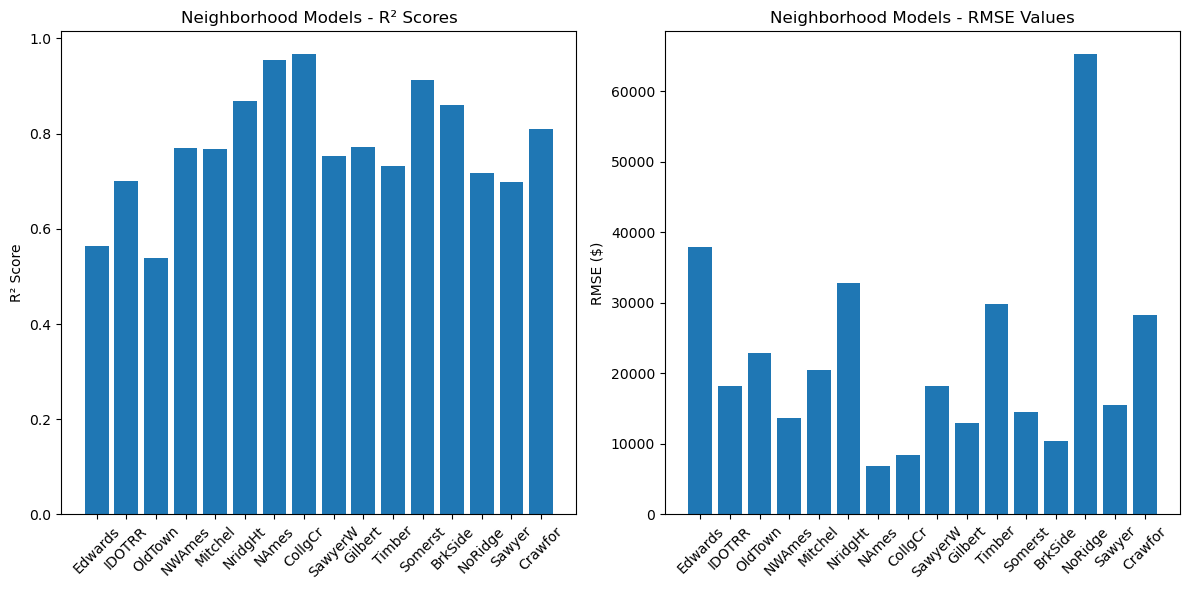


Model training complete!

Top 5 Performing Neighborhood Models:
   Neighborhood   test_r2     test_rmse  Sample_Size
7       CollgCr  0.966639   8442.392553          236
6         NAmes  0.955215   6917.960619          410
11      Somerst  0.911971  14569.320330          143
5       NridgHt  0.868656  32796.782516          121
12      BrkSide  0.861009  10392.649841          103


In [124]:
class AmesSpecializedModels:
    def __init__(self, df):
        """Initialize with preprocessed Ames housing dataset"""
        self.df = df.copy()
        self.models = {}
        self.performance = {}
        self.feature_importance = {}
        
        # Calculate additional features
        self._calculate_additional_features()
        
        # Define base features
        self.base_features = [
            'GrLivArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF',
            'GarageArea', 'FullBath', 'YearRemodAdd', 'LotArea',
            'Age', 'Age_Variance', 'Price_per_SqFt'
        ]

    def _calculate_additional_features(self):
        """Calculate additional features for analysis"""
        # Calculate age
        current_year = 2024
        self.df['Age'] = current_year - self.df['YearBuilt']
        
        # Calculate age variance by neighborhood
        age_stats = self.df.groupby('Neighborhood')['Age'].agg(['mean', 'std']).fillna(0)
        self.df['Age_Variance'] = self.df['Neighborhood'].map(age_stats['std'])
        
        # Calculate price per square foot
        self.df['Price_per_SqFt'] = self.df['SalePrice'] / self.df['GrLivArea']
        
        print("\nAdditional features calculated:")
        print(self.df[['Age', 'Age_Variance', 'Price_per_SqFt']].describe())

    def create_neighborhood_models(self, min_samples=50):
        """Create separate models for neighborhoods with sufficient data"""
        print("\nCreating neighborhood-specific models...")
        
        # Store performance metrics for all neighborhoods
        neighborhood_metrics = []
        
        for neighborhood in self.df['Neighborhood'].unique():
            nbhd_data = self.df[self.df['Neighborhood'] == neighborhood]
            
            if len(nbhd_data) >= min_samples:
                print(f"\nAnalyzing {neighborhood} ({len(nbhd_data)} properties)")
                
                # Prepare features
                X = nbhd_data[self.base_features].copy()
                y = nbhd_data['SalePrice']
                
                # Train and evaluate model
                model, metrics = self._train_and_evaluate(X, y, f"neighborhood_{neighborhood}")
                
                # Store results
                self.models[f"neighborhood_{neighborhood}"] = model
                self.performance[f"neighborhood_{neighborhood}"] = metrics
                
                # Add to metrics collection
                metrics['Neighborhood'] = neighborhood
                metrics['Sample_Size'] = len(nbhd_data)
                neighborhood_metrics.append(metrics)
            else:
                print(f"Skipping {neighborhood} - insufficient data ({len(nbhd_data)} properties)")
        
        # Create performance summary
        if neighborhood_metrics:
            metrics_df = pd.DataFrame(neighborhood_metrics)
            print("\nNeighborhood Models Performance Summary:")
            print(metrics_df.sort_values('test_r2', ascending=False))
            
            # Visualize performance
            self._plot_model_performance(metrics_df, 'Neighborhood Models')
            
            return metrics_df

    def _train_and_evaluate(self, X, y, model_name):
        """Train and evaluate a model with given features and target"""
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Train model
        model = GradientBoostingRegressor(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=4,
            random_state=42
        )
        
        model.fit(X_train_scaled, y_train)
        
        # Get predictions
        train_pred = model.predict(X_train_scaled)
        test_pred = model.predict(X_test_scaled)
        
        # Calculate metrics
        metrics = {
            'train_r2': r2_score(y_train, train_pred),
            'test_r2': r2_score(y_test, test_pred),
            'train_rmse': np.sqrt(mean_squared_error(y_train, train_pred)),
            'test_rmse': np.sqrt(mean_squared_error(y_test, test_pred))
        }
        
        # Store feature importance
        self.feature_importance[model_name] = pd.DataFrame({
            'feature': X.columns,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        print(f"\nModel Performance for {model_name}:")
        print(f"Train R²: {metrics['train_r2']:.4f}")
        print(f"Test R²: {metrics['test_r2']:.4f}")
        print(f"Train RMSE: ${metrics['train_rmse']:,.2f}")
        print(f"Test RMSE: ${metrics['test_rmse']:,.2f}")
        
        return model, metrics

    def _plot_model_performance(self, metrics_df, title):
        """Create performance visualization"""
        plt.figure(figsize=(12, 6))
        
        # Plot R² scores
        plt.subplot(1, 2, 1)
        plt.bar(metrics_df['Neighborhood'], metrics_df['test_r2'])
        plt.title(f'{title} - R² Scores')
        plt.xticks(rotation=45)
        plt.ylabel('R² Score')
        
        # Plot RMSE values
        plt.subplot(1, 2, 2)
        plt.bar(metrics_df['Neighborhood'], metrics_df['test_rmse'])
        plt.title(f'{title} - RMSE Values')
        plt.xticks(rotation=45)
        plt.ylabel('RMSE ($)')
        
        plt.tight_layout()
        plt.show()

# Test the implementation
if __name__ == "__main__":
    # Initialize preprocessor and load data
    preprocessor = AmesDataPreprocessor()
    data = preprocessor.load_and_merge_data()
    
    if data is not None:
        # Handle missing values
        data = preprocessor.handle_missing_values(data)
        
        if data is not None:
            # Create and train specialized models
            specialized_models = AmesSpecializedModels(data)
            
            # Train neighborhood models
            neighborhood_metrics = specialized_models.create_neighborhood_models()
            
            print("\nModel training complete!")
            
            # Display top performing neighborhoods
            if neighborhood_metrics is not None:
                print("\nTop 5 Performing Neighborhood Models:")
                print(neighborhood_metrics.nlargest(5, 'test_r2')[
                    ['Neighborhood', 'test_r2', 'test_rmse', 'Sample_Size']
                ])

In [15]:
class AmesProductionPipeline:
    def __init__(self):
        self.feature_pipeline = None
        self.model_selector = None
        self.confidence_calculator = None

    def create_feature_pipeline(self):
        # Structured feature transformation
        pass

    def implement_model_selection(self):
        # Model selection logic
        pass

    def calculate_confidence_intervals(self):
        # Prediction intervals
        pass

In [17]:
class AmesValidationFramework:
    def __init__(self):
        self.time_validator = None
        self.neighborhood_validator = None
        self.price_validator = None

    def perform_time_validation(self):
        # Time-based validation
        pass

    def perform_neighborhood_validation(self):
        # Neighborhood-based validation
        pass

    def perform_price_range_validation(self):
        # Price range validation
        pass

In [19]:
class AmesROIAnalyzer:
    def __init__(self):
        self.improvement_calculator = None
        self.quality_premium_analyzer = None

    def calculate_improvement_roi(self):
        # ROI calculations
        pass

    def analyze_quality_premiums(self):
        # Quality premium analysis
        pass

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

class AmesDataPreprocessor:
    def __init__(self):
        self.outliers_dict = {}
        self.missing_summary = None
        self.standardization_params = {}
        
        # Updated with your actual paths
        self.housing_path = "Ames_HousePrice.csv"
        self.real_estate_path = "Ames Real Estate Data.csv"
    
    def load_and_merge_data(self):
        """Load and merge both Ames datasets"""
        try:
            self.housing_data = pd.read_csv(self.housing_path)
            print(f"Housing data shape: {self.housing_data.shape}")
            
            try:
                self.real_estate = pd.read_csv(self.real_estate_path)
                print(f"Real estate data shape: {self.real_estate.shape}")
                
                # Merge datasets if both are loaded
                self.data = pd.merge(
                    self.housing_data,
                    self.real_estate[['MapRefNo', 'Prop_Addr']],
                    left_on='PID',
                    right_on='MapRefNo',
                    how='left'
                )
            except FileNotFoundError:
                print("Note: Real estate data file not found. Proceeding with housing data only.")
                self.data = self.housing_data
            
            print(f"Final data shape: {self.data.shape}")
            return self.data
            
        except FileNotFoundError as e:
            print(f"Error loading files: {e}")
            return None
        
    def handle_missing_values(self, df):
        """Impute missing values and track changes"""
        df = df.copy()
        missing_data = {
            'column': [],
            'missing_count': [],
            'imputation_method': []
        }
        
        # Handle categorical variables with mode
        for col in df.select_dtypes(include=['object']):
            if df[col].isnull().any():
                mode_val = df[col].mode()[0]
                df[col] = df[col].fillna(mode_val)
                missing_data['column'].append(col)
                missing_data['missing_count'].append(df[col].isnull().sum())
                missing_data['imputation_method'].append('mode')
                
        # Handle numeric variables
        for col in df.select_dtypes(include=['float64', 'int64']):
            if df[col].isnull().any():
                if 'Qual' in col or 'Cond' in col:
                    df[col] = df[col].fillna(df[col].mode()[0])
                    method = 'mode'
                else:
                    df[col] = df[col].fillna(df[col].median())
                    method = 'median'
                    
                missing_data['column'].append(col)
                missing_data['missing_count'].append(df[col].isnull().sum())
                missing_data['imputation_method'].append(method)
        
        self.missing_summary = pd.DataFrame(missing_data)
        return df

# Now let's try loading and processing the data
preprocessor = AmesDataPreprocessor()
data = preprocessor.load_and_merge_data()

if data is not None:
    print("\nData loaded successfully!")
    print(f"Shape: {data.shape}")
    print("\nFirst few columns:", data.columns.tolist()[:5], "...")
    
    # Handle missing values
    data = preprocessor.handle_missing_values(data)
    print("\nMissing values handled!")
    
    # Basic data check
    print("\nSample of processed data:")
    print(data.head())
else:
    print("Error loading data. Please check file paths.")

Housing data shape: (2580, 82)
Note: Real estate data file not found. Proceeding with housing data only.
Final data shape: (2580, 82)

Data loaded successfully!
Shape: (2580, 82)

First few columns: ['Unnamed: 0', 'PID', 'GrLivArea', 'SalePrice', 'MSSubClass'] ...

Missing values handled!

Sample of processed data:
   Unnamed: 0        PID  GrLivArea  SalePrice  MSSubClass MSZoning  \
0           1  909176150        856     126000          30       RL   
1           2  905476230       1049     139500         120       RL   
2           3  911128020       1001     124900          30  C (all)   
3           4  535377150       1039     114000          70       RL   
4           5  534177230       1665     227000          60       RL   

   LotFrontage  LotArea Street Alley  ... ScreenPorch PoolArea PoolQC  Fence  \
0         68.0     7890   Pave  Grvl  ...         166        0     TA  MnPrv   
1         42.0     4235   Pave  Grvl  ...           0        0     TA  MnPrv   
2         60.0  

Performing time-based validation...

Validating random_forest...

Validating gradient_boosting...

Validating linear_regression...
Performing neighborhood-based validation...

Validating random_forest...

Validating gradient_boosting...

Validating linear_regression...
Performing price range validation...

Validating random_forest...

Validating gradient_boosting...

Validating linear_regression...


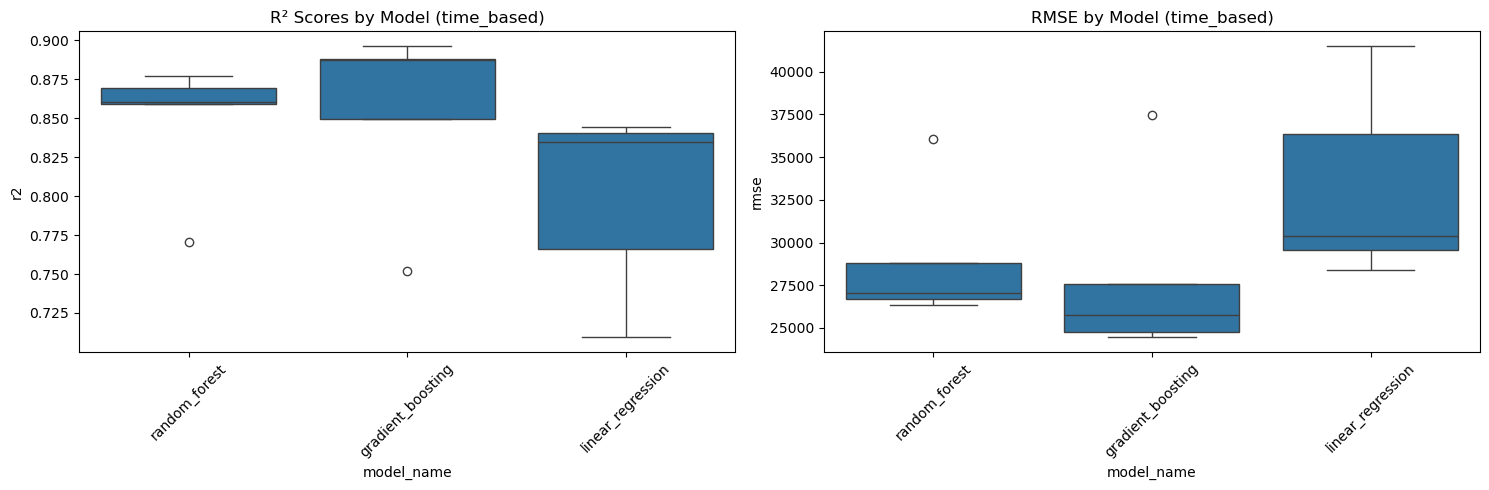

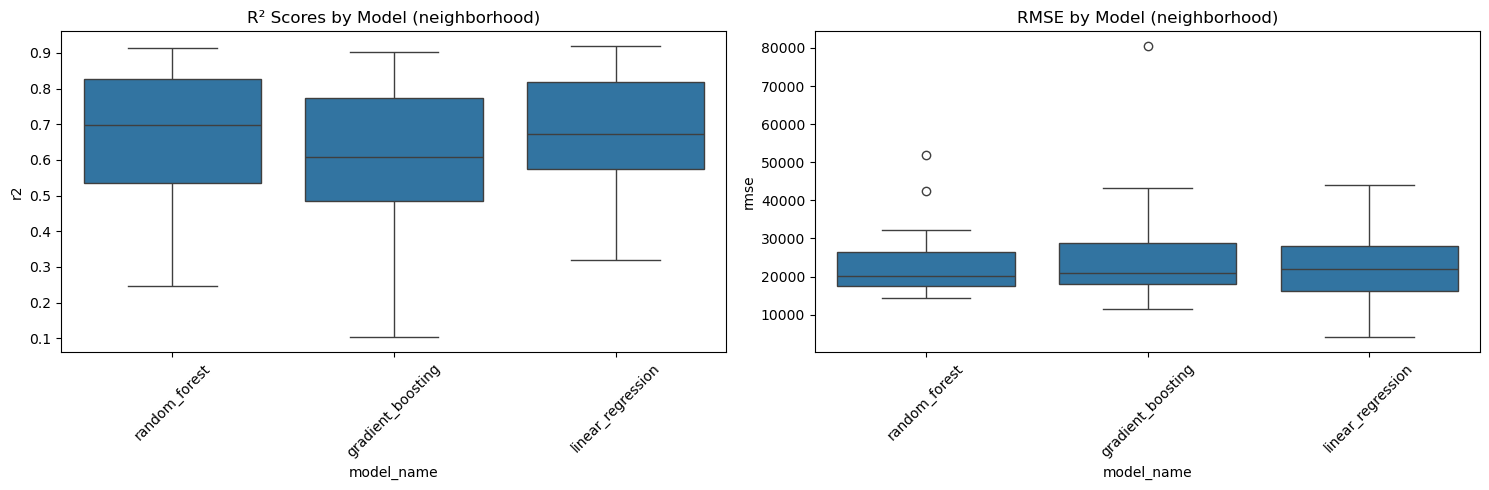

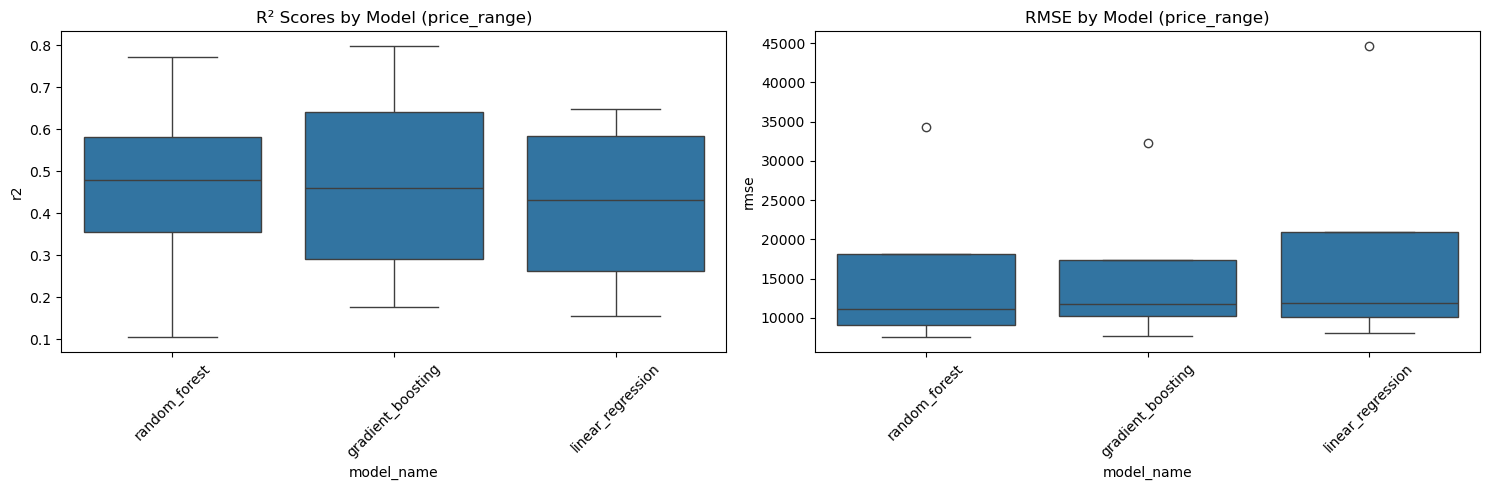

In [32]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

class BaseModel:
    def __init__(self, model, feature_names):
        self.model = model
        self.feature_names = feature_names
        self.scaler = StandardScaler()
        
    def fit(self, X, y):
        X_scaled = self.scaler.fit_transform(X)
        self.model.fit(X_scaled, y)
        
    def predict(self, X):
        X_scaled = self.scaler.transform(X)
        return self.model.predict(X_scaled)

# Define base features
base_features = [
    'GrLivArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF',
    'GarageArea', 'FullBath', 'YearRemodAdd', 'LotArea'
]

# Create base models
base_model = BaseModel(
    RandomForestRegressor(n_estimators=100, random_state=42),
    base_features
)

specialized_model = BaseModel(
    GradientBoostingRegressor(n_estimators=100, random_state=42),
    base_features
)

linear_model = BaseModel(
    LinearRegression(),
    base_features
)

# Create models dictionary
models = {
    'random_forest': base_model,
    'gradient_boosting': specialized_model,
    'linear_regression': linear_model
}

# Initialize validator
validator = AmesValidationFramework(data, models)

# Perform validations
time_results = validator.time_based_validation()
neighborhood_results = validator.neighborhood_validation()
price_range_results = validator.price_range_validation()

# Plot results
validator.plot_validation_results()

In [34]:
print("Available features in dataset:")
print(data.columns.tolist())

Available features in dataset:
['Unnamed: 0', 'PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'Enclo

In [50]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

class BaseModel:
    def __init__(self, model, feature_names):
        self.model = model
        self.feature_names = feature_names
        self.scaler = StandardScaler()
        
    def fit(self, X, y):
        # Scale features and fit model
        self.scaler.fit(X)
        X_scaled = self.scaler.transform(X)
        self.model.fit(X_scaled, y)
        return self
    
    def predict(self, X):
        # Scale features using the same scaler and predict
        X_scaled = self.scaler.transform(X)
        return self.model.predict(X_scaled)

# Define base features (these should match your data)
base_features = [
    'GrLivArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF',
    'GarageArea', 'FullBath', 'YearRemodAdd', 'LotArea'
]

# Create and train base models
print("Training models...")
X_train = data[base_features]
y_train = data['SalePrice']

# Initialize models
base_model = BaseModel(
    RandomForestRegressor(n_estimators=100, random_state=42),
    base_features
)

specialized_model = BaseModel(
    GradientBoostingRegressor(n_estimators=100, random_state=42),
    base_features
)

linear_model = BaseModel(
    LinearRegression(),
    base_features
)

# Fit models
base_model.fit(X_train, y_train)
specialized_model.fit(X_train, y_train)
linear_model.fit(X_train, y_train)

# Store models in dictionary
models = {
    'random_forest': base_model,
    'gradient_boosting': specialized_model,
    'linear_regression': linear_model
}

# Now let's modify our production pipeline
class AmesProductionPipeline:
    def __init__(self, models, data):
        self.models = models
        self.data = data
        self.feature_names = models['random_forest'].feature_names  # Use same features as models
        self.confidence_level = 0.95
    
    def predict_with_confidence(self, X):
        """Generate predictions with confidence intervals"""
        # Get features used in model training
        X_pred = X[self.feature_names]
        
        # Get predictions from all models
        predictions = []
        for name, model in self.models.items():
            try:
                pred = model.predict(X_pred)
                predictions.append(pred)
                print(f"Successfully got predictions from {name} model")
            except Exception as e:
                print(f"Warning: Model {name} failed with error: {str(e)}")
        
        if not predictions:
            raise ValueError("No models were able to make predictions")
            
        predictions = np.array(predictions)
        
        # Calculate statistics
        mean_pred = np.mean(predictions, axis=0)
        std_error = np.std(predictions, axis=0) / np.sqrt(len(predictions))
        
        # Calculate confidence intervals
        z_score = stats.norm.ppf((1 + self.confidence_level) / 2)
        margin_of_error = z_score * std_error
        
        # Create DataFrame with the same index as input data
        return pd.DataFrame({
            'prediction': mean_pred,
            'lower_bound': mean_pred - margin_of_error,
            'upper_bound': mean_pred + margin_of_error,
            'std_error': std_error
        }, index=X.index)

# Test the updated pipeline
print("\nTesting pipeline...")
production_pipeline = AmesProductionPipeline(models, data)

# Make predictions
print("\nMaking predictions...")
sample_data = data.head(10)
predictions = production_pipeline.predict_with_confidence(sample_data)

# Print predictions and actual values for comparison
print("\nPredictions vs Actual:")
comparison = pd.DataFrame({
    'Actual': sample_data['SalePrice'],
    'Predicted': predictions['prediction'],
    'Lower Bound': predictions['lower_bound'],
    'Upper Bound': predictions['upper_bound']
})
print(comparison)

Training models...

Testing pipeline...

Making predictions...
Successfully got predictions from random_forest model
Successfully got predictions from gradient_boosting model
Successfully got predictions from linear_regression model

Predictions vs Actual:
   Actual      Predicted    Lower Bound    Upper Bound
0  126000  118059.624579  115598.784796  120520.464362
1  139500  131445.758708  121874.905074  141016.612341
2  124900  119819.325234  114211.988443  125426.662025
3  114000   91918.853545   77081.273383  106756.433706
4  227000  220465.954279  213782.055199  227149.853359
5  198500  200727.799948  187563.996236  213891.603660
6   93000  102447.327590   94877.304671  110017.350509
7  187687  186240.108904  179158.502867  193321.714940
8  137500  138761.195635  133423.084917  144099.306354
9  140000  146325.522476  137057.760731  155593.284222


Generating price analysis...


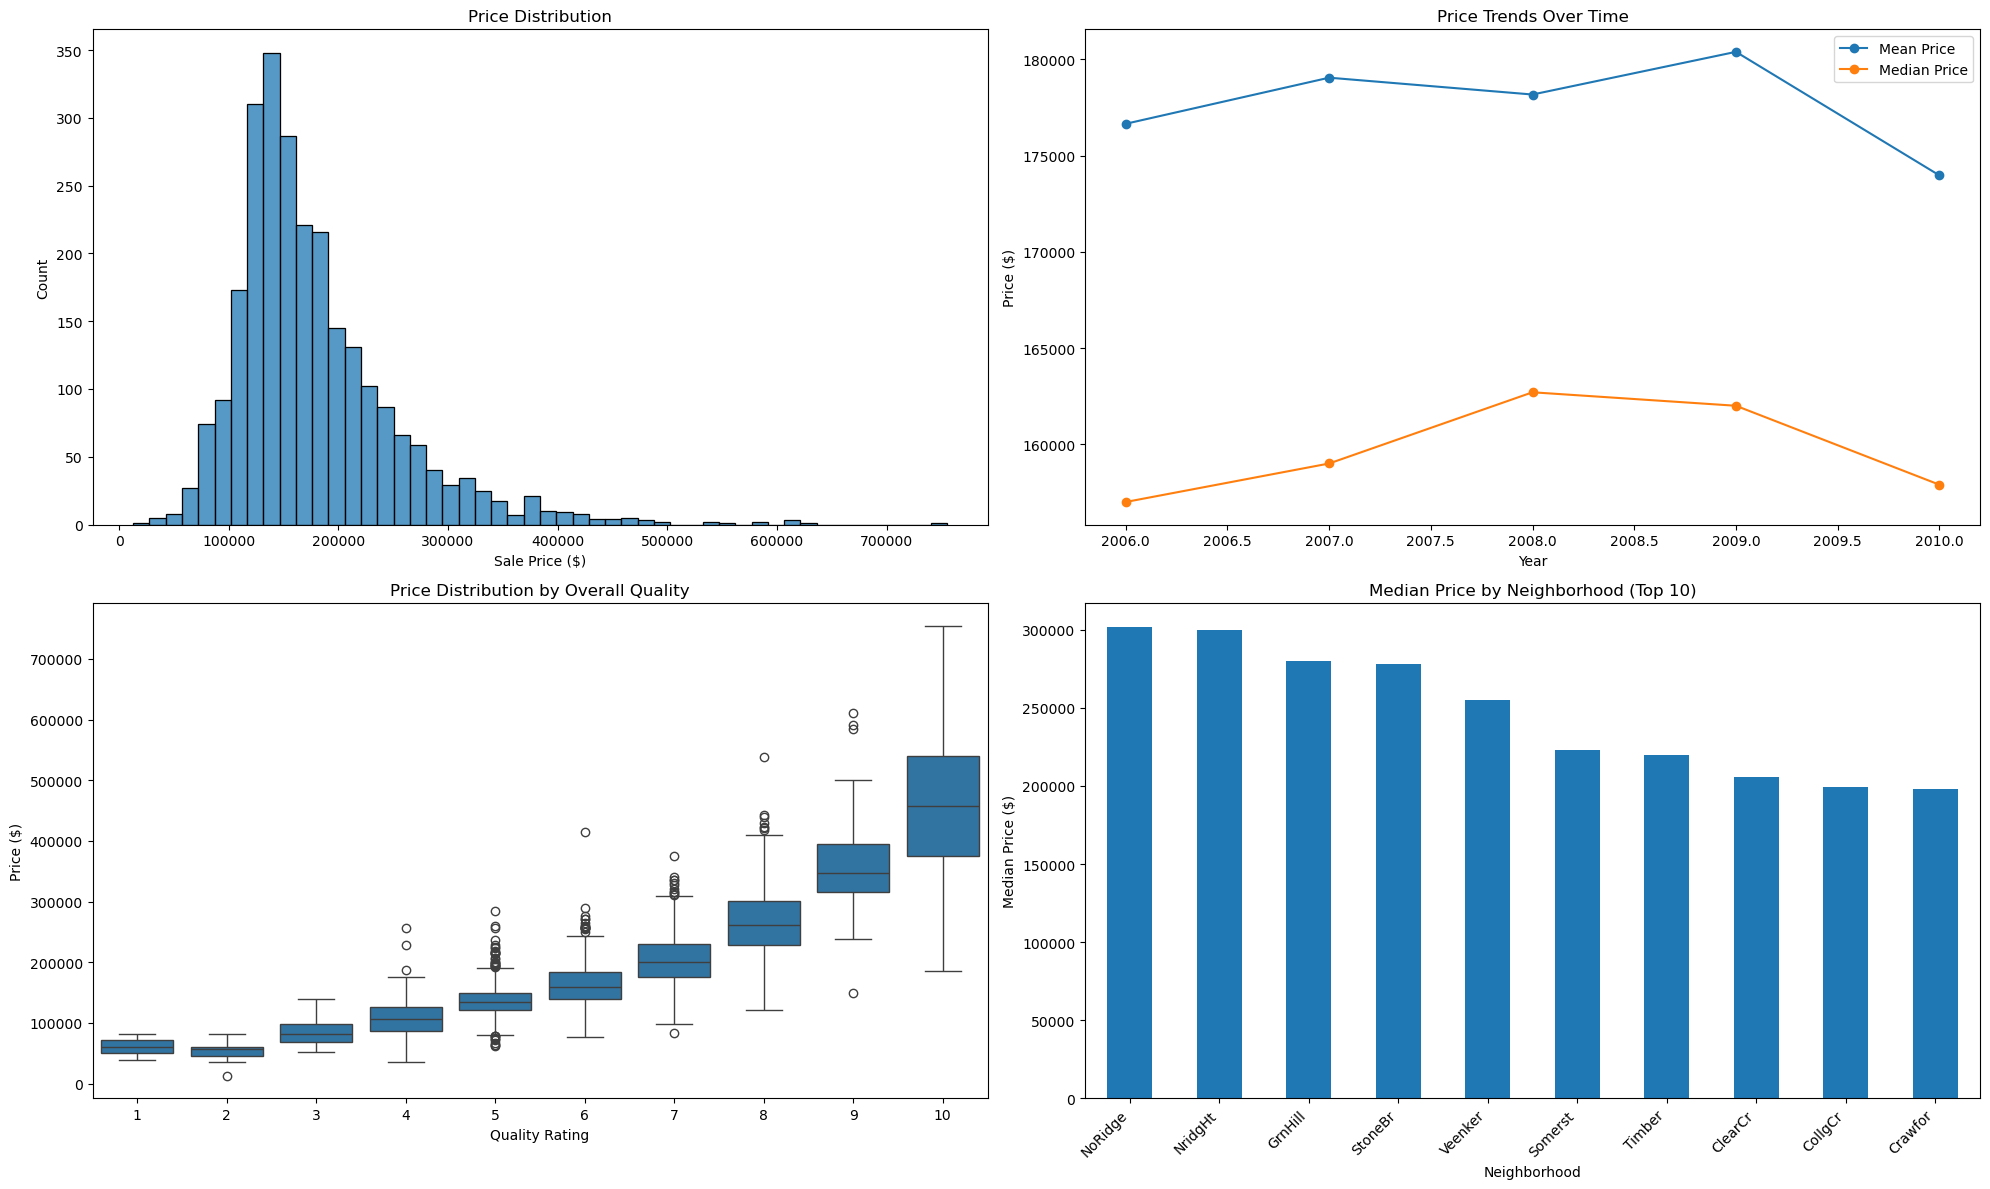


Generating feature correlations...


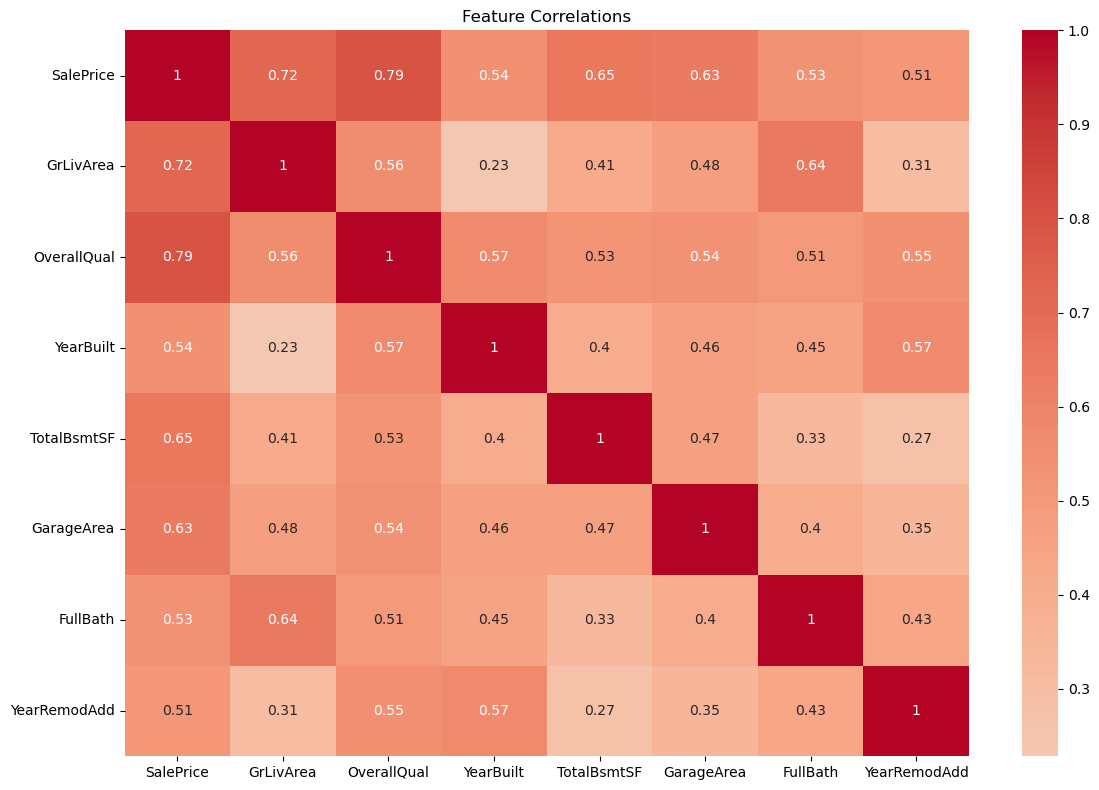


Generating quality-price relationship analysis...


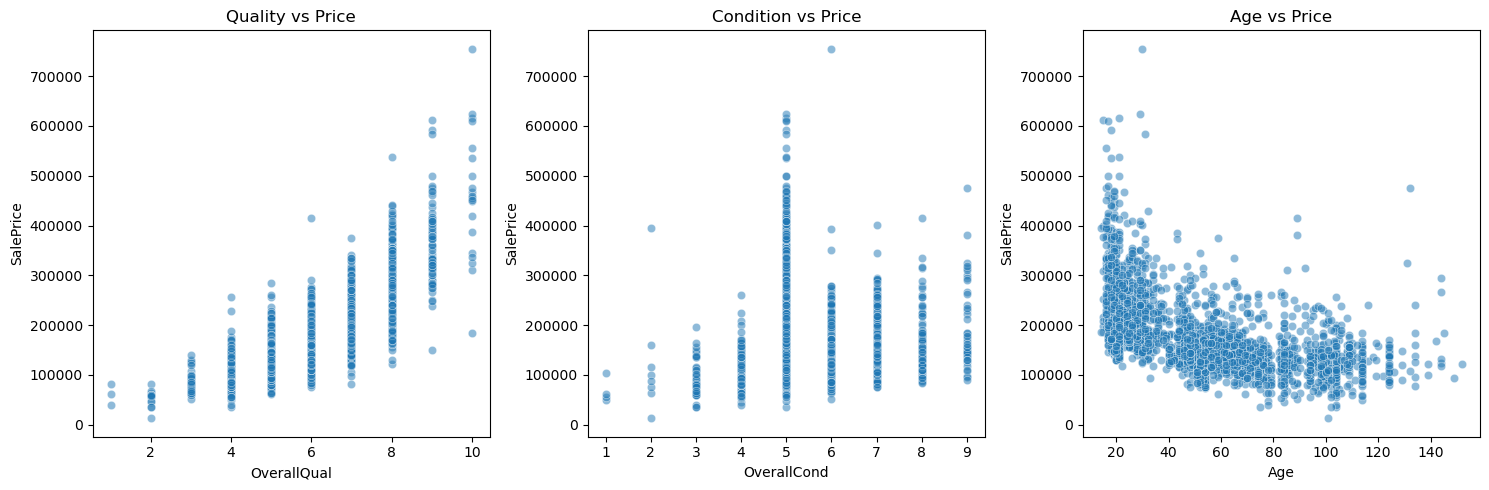


Generating neighborhood analysis...


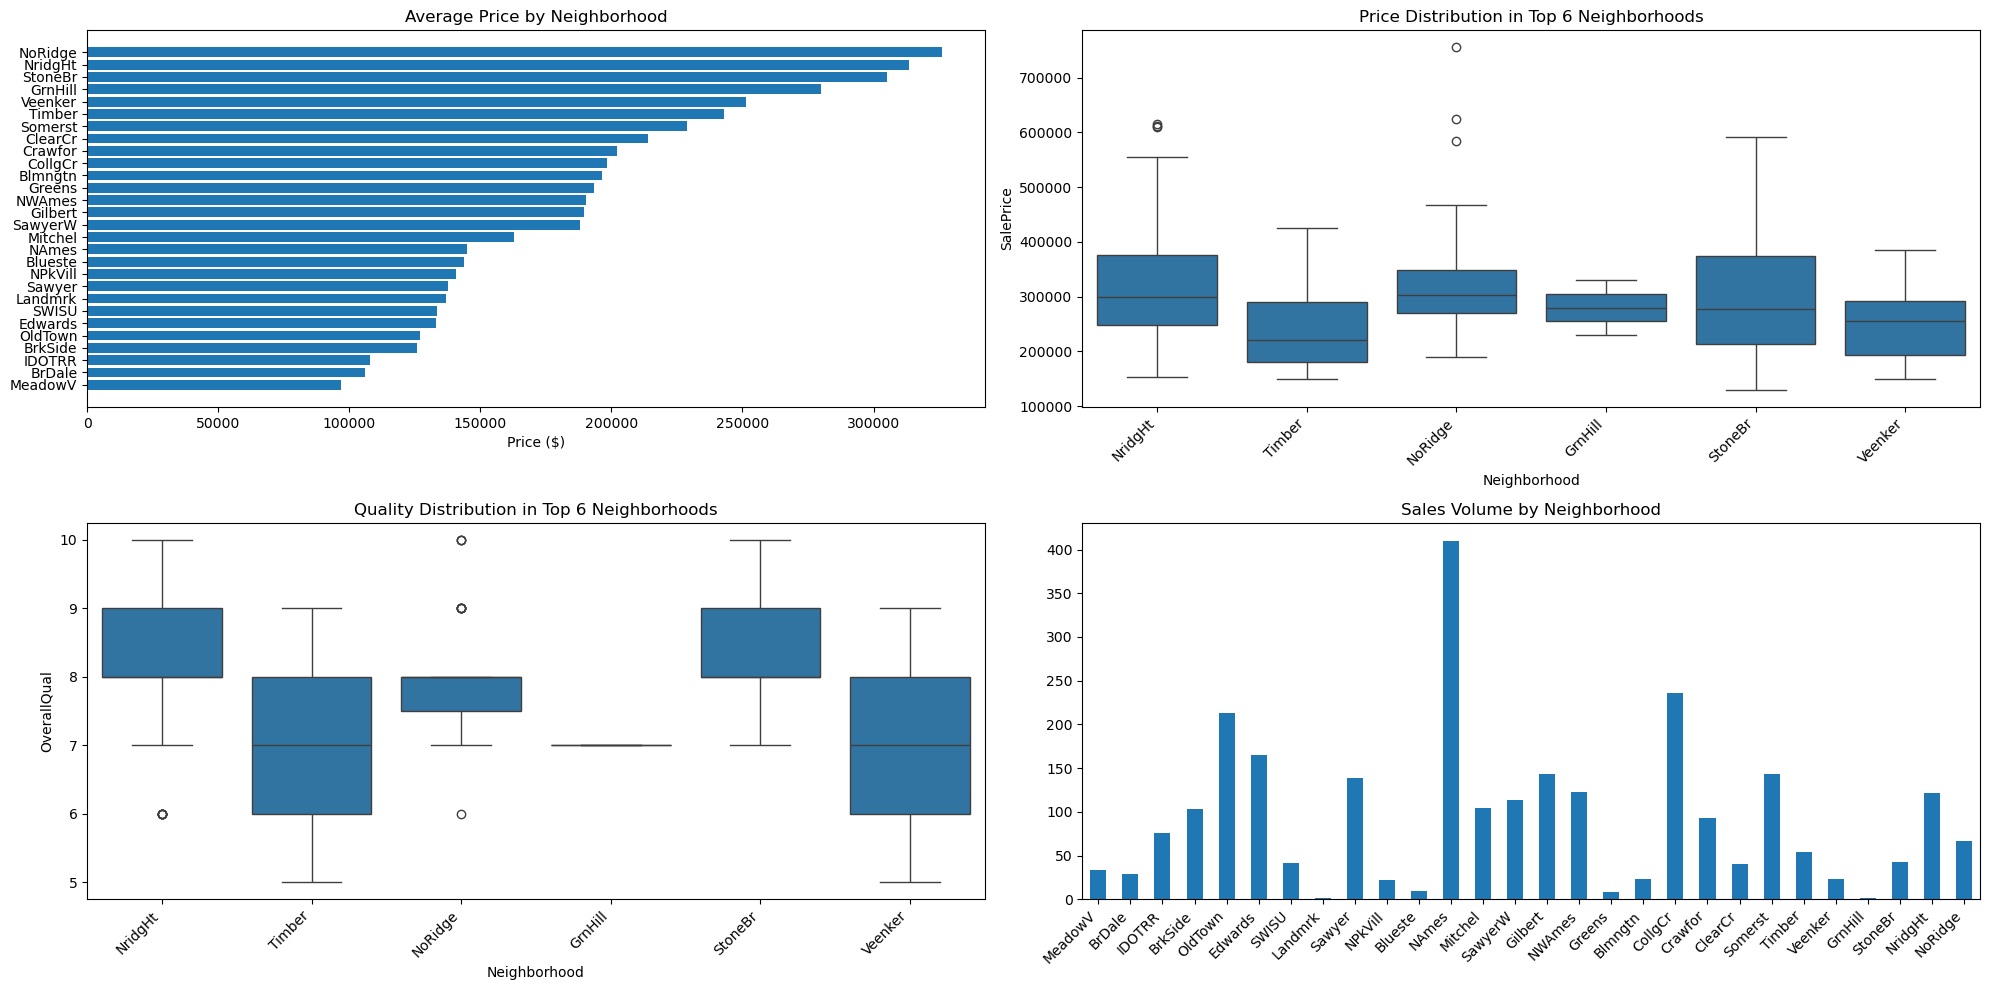

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

class AmesVisualizer:
    def __init__(self, data):
        """Initialize with preprocessed Ames housing dataset"""
        self.data = data.copy()
        self.colors = sns.color_palette("husl", 8)
        plt.rcParams['figure.figsize'] = [10, 6]
        plt.rcParams['figure.dpi'] = 100
        
    def plot_price_analysis(self):
        """Create comprehensive price analysis visualizations"""
        fig, axes = plt.subplots(2, 2, figsize=(20, 12))
        
        # Price Distribution
        sns.histplot(data=self.data, x='SalePrice', bins=50, ax=axes[0,0])
        axes[0,0].set_title('Price Distribution')
        axes[0,0].set_xlabel('Sale Price ($)')
        axes[0,0].set_ylabel('Count')
        
        # Price by Year
        yearly_prices = self.data.groupby('YrSold')['SalePrice'].agg(['mean', 'median'])
        yearly_prices.plot(marker='o', ax=axes[0,1])
        axes[0,1].set_title('Price Trends Over Time')
        axes[0,1].set_xlabel('Year')
        axes[0,1].set_ylabel('Price ($)')
        axes[0,1].legend(['Mean Price', 'Median Price'])
        
        # Price by Quality
        sns.boxplot(data=self.data, x='OverallQual', y='SalePrice', ax=axes[1,0])
        axes[1,0].set_title('Price Distribution by Overall Quality')
        axes[1,0].set_xlabel('Quality Rating')
        axes[1,0].set_ylabel('Price ($)')
        
        # Price by Neighborhood (Top 10)
        neighborhood_prices = self.data.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending=False)[:10]
        neighborhood_prices.plot(kind='bar', ax=axes[1,1])
        axes[1,1].set_title('Median Price by Neighborhood (Top 10)')
        plt.setp(axes[1,1].xaxis.get_majorticklabels(), rotation=45, ha='right')
        axes[1,1].set_ylabel('Median Price ($)')
        
        plt.tight_layout()
        plt.show()
        
    def plot_feature_correlations(self):
        """Visualize key feature correlations"""
        # Select numeric columns
        numeric_cols = ['SalePrice', 'GrLivArea', 'OverallQual', 'YearBuilt', 
                       'TotalBsmtSF', 'GarageArea', 'FullBath', 'YearRemodAdd']
        correlation_data = self.data[numeric_cols]
        
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', center=0)
        plt.title('Feature Correlations')
        plt.tight_layout()
        plt.show()
        
    def plot_quality_price_relationship(self):
        """Analyze and visualize quality-price relationships"""
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        # Quality vs Price
        sns.scatterplot(data=self.data, x='OverallQual', y='SalePrice', alpha=0.5, ax=axes[0])
        axes[0].set_title('Quality vs Price')
        
        # Condition vs Price
        sns.scatterplot(data=self.data, x='OverallCond', y='SalePrice', alpha=0.5, ax=axes[1])
        axes[1].set_title('Condition vs Price')
        
        # Age vs Price
        self.data['Age'] = 2024 - self.data['YearBuilt']
        sns.scatterplot(data=self.data, x='Age', y='SalePrice', alpha=0.5, ax=axes[2])
        axes[2].set_title('Age vs Price')
        
        plt.tight_layout()
        plt.show()
        
    def plot_neighborhood_analysis(self):
        """Create detailed neighborhood analysis visualizations"""
        fig, axes = plt.subplots(2, 2, figsize=(20, 10))
        
        # Price by Neighborhood
        neighborhood_stats = self.data.groupby('Neighborhood').agg({
            'SalePrice': ['mean', 'std', 'count']
        }).reset_index()
        neighborhood_stats.columns = ['Neighborhood', 'Mean_Price', 'Std_Price', 'Count']
        
        # Sort by mean price
        neighborhood_stats = neighborhood_stats.sort_values('Mean_Price', ascending=True)
        
        axes[0,0].barh(neighborhood_stats['Neighborhood'], neighborhood_stats['Mean_Price'])
        axes[0,0].set_title('Average Price by Neighborhood')
        axes[0,0].set_xlabel('Price ($)')
        
        # Price Distribution by Neighborhood (Top 6)
        top_neighborhoods = neighborhood_stats.nlargest(6, 'Mean_Price')['Neighborhood']
        sns.boxplot(data=self.data[self.data['Neighborhood'].isin(top_neighborhoods)], 
                   x='Neighborhood', y='SalePrice', ax=axes[0,1])
        plt.setp(axes[0,1].xaxis.get_majorticklabels(), rotation=45, ha='right')
        axes[0,1].set_title('Price Distribution in Top 6 Neighborhoods')
        
        # Quality Distribution by Neighborhood
        sns.boxplot(data=self.data[self.data['Neighborhood'].isin(top_neighborhoods)], 
                   x='Neighborhood', y='OverallQual', ax=axes[1,0])
        plt.setp(axes[1,0].xaxis.get_majorticklabels(), rotation=45, ha='right')
        axes[1,0].set_title('Quality Distribution in Top 6 Neighborhoods')
        
        # Sales Volume by Neighborhood
        neighborhood_stats['Count'].plot(kind='bar', ax=axes[1,1])
        axes[1,1].set_title('Sales Volume by Neighborhood')
        plt.setp(axes[1,1].xaxis.get_majorticklabels(), rotation=45, ha='right')
        axes[1,1].set_xticklabels(neighborhood_stats['Neighborhood'])
        
        plt.tight_layout()
        plt.show()
        
    def plot_model_predictions(self, actual, predicted):
        """Visualize model predictions vs actual prices"""
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        # Actual vs Predicted
        axes[0].scatter(actual, predicted, alpha=0.5)
        axes[0].plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--', lw=2)
        axes[0].set_xlabel('Actual Price')
        axes[0].set_ylabel('Predicted Price')
        axes[0].set_title('Actual vs Predicted Prices')
        
        # Residuals
        residuals = predicted - actual
        sns.histplot(residuals, bins=50, ax=axes[1])
        axes[1].set_xlabel('Prediction Error')
        axes[1].set_ylabel('Count')
        axes[1].set_title('Distribution of Prediction Errors')
        
        # Residuals vs Predicted
        axes[2].scatter(predicted, residuals, alpha=0.5)
        axes[2].axhline(y=0, color='r', linestyle='--')
        axes[2].set_xlabel('Predicted Price')
        axes[2].set_ylabel('Residual')
        axes[2].set_title('Residuals vs Predicted Values')
        
        plt.tight_layout()
        plt.show()

# Create instance and generate visualizations
visualizer = AmesVisualizer(data)

print("Generating price analysis...")
visualizer.plot_price_analysis()

print("\nGenerating feature correlations...")
visualizer.plot_feature_correlations()

print("\nGenerating quality-price relationship analysis...")
visualizer.plot_quality_price_relationship()

print("\nGenerating neighborhood analysis...")
visualizer.plot_neighborhood_analysis()

# If you have model predictions, you can visualize them like this:
# visualizer.plot_model_predictions(actual_prices, predicted_prices)

In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import os
import warnings
warnings.filterwarnings('ignore')

class AmesProductionPipeline:
    def __init__(self):
        """Initialize the production pipeline"""
        self.preprocessor = None
        self.feature_engineer = None
        self.models = {}
        self.scalers = {}
        self.feature_importance = {}
        self.performance_metrics = {}
        self.validation_results = {}
        self.feature_names = None
    
    def train_pipeline(self, data_path):
        """Train the complete pipeline"""
        print("Starting pipeline training...")
        
        # 1. Load and preprocess data
        print("\nStep 1: Loading and preprocessing data...")
        data = self._load_and_preprocess(data_path)
        
        # 2. Engineer features
        print("\nStep 2: Engineering features...")
        data_engineered = self._engineer_features(data)
        
        # 3. Train models
        print("\nStep 3: Training models...")
        self._train_models(data_engineered)
        
        # 4. Validate models
        print("\nStep 4: Validating models...")
        self._validate_models(data_engineered)
        
        # 5. Save pipeline
        print("\nStep 5: Saving pipeline...")
        self.save_pipeline()
        
        return self.performance_metrics
    
    def _load_and_preprocess(self, data_path):
        """Load and preprocess the data"""
        try:
            # Load data
            data = pd.read_csv(data_path)
            
            # Handle missing values
            for col in data.select_dtypes(include=['float64', 'int64']):
                data[col] = data[col].fillna(data[col].median())
            
            for col in data.select_dtypes(include=['object']):
                data[col] = data[col].fillna(data[col].mode()[0])
            
            return data
            
        except Exception as e:
            print(f"Error in preprocessing: {str(e)}")
            raise
    
    def _engineer_features(self, data):
        """Engineer features for model training"""
        try:
            # Calculate age
            data['Age'] = 2024 - data['YearBuilt']
            
            # Calculate total area
            data['TotalArea'] = data['GrLivArea'] + data['TotalBsmtSF']
            
            # Calculate price per square foot
            data['PricePerSqFt'] = data['SalePrice'] / data['GrLivArea']
            
            # Create quality score
            data['QualityScore'] = (data['OverallQual'] + data['OverallCond']) / 2
            
            # Encode categorical variables
            categorical_cols = data.select_dtypes(include=['object']).columns
            data = pd.get_dummies(data, columns=categorical_cols)
            
            return data
            
        except Exception as e:
            print(f"Error in feature engineering: {str(e)}")
            raise
    
    def _train_models(self, data):
        """Train multiple models"""
        try:
            # Prepare features
            feature_cols = [col for col in data.columns if col not in ['SalePrice', 'PID', 'Id']]
            self.feature_names = feature_cols
            X = data[feature_cols]
            y = data['SalePrice']
            
            # Split data
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            
            # Scale features
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
            self.scalers['main'] = scaler
            
            # Train models
            models = {
                'random_forest': RandomForestRegressor(n_estimators=100, random_state=42),
                'gradient_boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
            }
            
            for name, model in models.items():
                print(f"\nTraining {name}...")
                model.fit(X_train_scaled, y_train)
                
                # Make predictions
                train_pred = model.predict(X_train_scaled)
                test_pred = model.predict(X_test_scaled)
                
                # Calculate metrics
                self.performance_metrics[name] = {
                    'train_r2': r2_score(y_train, train_pred),
                    'test_r2': r2_score(y_test, test_pred),
                    'train_rmse': np.sqrt(mean_squared_error(y_train, train_pred)),
                    'test_rmse': np.sqrt(mean_squared_error(y_test, test_pred))
                }
                
                # Store model and feature importance
                self.models[name] = model
                self.feature_importance[name] = pd.DataFrame({
                    'feature': feature_cols,
                    'importance': model.feature_importances_
                }).sort_values('importance', ascending=False)
                
                print(f"{name} Performance:")
                print(f"Train R²: {self.performance_metrics[name]['train_r2']:.4f}")
                print(f"Test R²: {self.performance_metrics[name]['test_r2']:.4f}")
                print(f"Test RMSE: ${self.performance_metrics[name]['test_rmse']:,.2f}")
                
        except Exception as e:
            print(f"Error in model training: {str(e)}")
            raise
    
    def _validate_models(self, data):
        """Validate models across different segments"""
        try:
            # Price range validation
            price_ranges = pd.qcut(data['SalePrice'], q=3, labels=['Low', 'Medium', 'High'])
            
            for name, model in self.models.items():
                range_metrics = {}
                
                for price_range in ['Low', 'Medium', 'High']:
                    range_mask = price_ranges == price_range
                    range_data = data[range_mask]
                    
                    if len(range_data) > 0:
                        X_range = range_data[self.feature_names]
                        y_range = range_data['SalePrice']
                        
                        X_range_scaled = self.scalers['main'].transform(X_range)
                        predictions = model.predict(X_range_scaled)
                        
                        range_metrics[price_range] = {
                            'r2': r2_score(y_range, predictions),
                            'rmse': np.sqrt(mean_squared_error(y_range, predictions))
                        }
                
                self.validation_results[name] = range_metrics
                
                print(f"\nValidation Results for {name}:")
                for range_name, metrics in range_metrics.items():
                    print(f"{range_name} Price Range:")
                    print(f"R²: {metrics['r2']:.4f}")
                    print(f"RMSE: ${metrics['rmse']:,.2f}")
                    
        except Exception as e:
            print(f"Error in model validation: {str(e)}")
            raise

    def save_pipeline(self):
        """Save the trained pipeline components"""
        try:
            # Create a models directory if it doesn't exist
            os.makedirs('models', exist_ok=True)
            
            # Save models
            for name, model in self.models.items():
                joblib.dump(model, f'models/model_{name}.joblib')
            
            # Save scalers
            joblib.dump(self.scalers, 'models/scalers.joblib')
            
            # Save feature names
            joblib.dump(self.feature_names, 'models/feature_names.joblib')
            
            # Save feature importance
            for name, importance in self.feature_importance.items():
                importance.to_csv(f'models/feature_importance_{name}.csv', index=False)
            
            print("Pipeline components saved successfully!")
            
        except Exception as e:
            print(f"Error saving pipeline: {str(e)}")
            raise
    
    def load_pipeline(self):
        """Load the trained pipeline components"""
        try:
            # Load models
            for model_path in os.listdir('models'):
                if model_path.startswith('model_') and model_path.endswith('.joblib'):
                    name = model_path.replace('model_', '').replace('.joblib', '')
                    self.models[name] = joblib.load(f'models/{model_path}')
            
            # Load scalers
            self.scalers = joblib.load('models/scalers.joblib')
            
            # Load feature names
            self.feature_names = joblib.load('models/feature_names.joblib')
            
            print("Pipeline components loaded successfully!")
            
        except Exception as e:
            print(f"Error loading pipeline: {str(e)}")
            raise
    
    def predict(self, new_data):
        """Make predictions on new data"""
        try:
            # Preprocess new data
            processed_data = self._engineer_features(new_data)
            
            # Ensure columns match training data
            missing_cols = set(self.feature_names) - set(processed_data.columns)
            for col in missing_cols:
                processed_data[col] = 0
                
            processed_data = processed_data[self.feature_names]
            
            # Scale features
            scaled_data = self.scalers['main'].transform(processed_data)
            
            # Make predictions with each model
            predictions = {}
            for name, model in self.models.items():
                pred = model.predict(scaled_data)
                predictions[name] = pred
            
            # Calculate ensemble prediction
            ensemble_pred = np.mean([pred for pred in predictions.values()], axis=0)
            
            # Calculate prediction intervals
            std_dev = np.std([pred for pred in predictions.values()], axis=0)
            confidence_interval = 1.96 * std_dev  # 95% confidence interval
            
            return pd.DataFrame({
                'prediction': ensemble_pred,
                'lower_bound': ensemble_pred - confidence_interval,
                'upper_bound': ensemble_pred + confidence_interval
            })
            
        except Exception as e:
            print(f"Error making predictions: {str(e)}")
            raise

# Usage example:
if __name__ == "__main__":
    # Initialize pipeline
    pipeline = AmesProductionPipeline()
    
    # Train pipeline
    performance = pipeline.train_pipeline("Ames_HousePrice.csv")
    
    # Example prediction (if you have new data)
    # new_data = pd.read_csv("new_houses.csv")
    # predictions = pipeline.predict(new_data)
    # print("\nPredictions for new data:")
    # print(predictions)

Starting pipeline training...

Step 1: Loading and preprocessing data...

Step 2: Engineering features...

Step 3: Training models...

Training random_forest...
random_forest Performance:
Train R²: 0.9929
Test R²: 0.9635
Test RMSE: $14,981.62

Training gradient_boosting...
gradient_boosting Performance:
Train R²: 0.9918
Test R²: 0.9791
Test RMSE: $11,347.44

Step 4: Validating models...

Validation Results for random_forest:
Low Price Range:
R²: 0.9537
RMSE: $4,534.05
Medium Price Range:
R²: 0.8410
RMSE: $5,808.94
High Price Range:
R²: 0.9667
RMSE: $13,205.89

Validation Results for gradient_boosting:
Low Price Range:
R²: 0.9260
RMSE: $5,730.33
Medium Price Range:
R²: 0.7946
RMSE: $6,601.98
High Price Range:
R²: 0.9790
RMSE: $10,478.64

Step 5: Saving pipeline...
Pipeline components saved successfully!
